# In this notebook, I am going to perform EDA, Feature Engineering and Model Prediction for the Housing prices dataset

In [47]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [48]:
## Data analysis phase

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
from folium import  Marker
from folium.plugins import  MarkerCluster
import math


## Display all the columns of the dataframe
pd.set_option("display.max_columns", None)

In [49]:
path = "DATA/Scraped_Data.csv"


In [50]:
Main_dataset = pd.read_csv(path)

## print shape of dataset with rows and columns
print(Main_dataset.shape)

(27900, 91)


In [51]:
## print the top5 records
Main_dataset.head()

exactPrice  sqftPrice  securityDeposit           propertyType     postedOn  \
0      240000        171                9  Multistorey Apartment  Jun 20, '23   
1       12000         12            12000  Multistorey Apartment  Jun 19, '23   
2       17000          7                9      Residential House  Jun 21, '23   
3        5000          9                9      Residential House  Jun 23, '23   
4       12000          9            24000  Multistorey Apartment  Jun 24, '23   

   noOfLifts maintenanceChargesFrequency  maintenanceCharges  \
0        9.0                           9                   9   
1        1.0                     Monthly                1500   
2        9.0                           9                   9   
3        9.0                           9                   9   
4        1.0                     Monthly                 500   

                locality      furnishing  flrNum  firstMonthCharges facing  \
0                Danapur  Semi-Furnished       4                  9      9   
1                      9  Semi-Furnished       4              25500      9   
2  Phase 1 Ashiana Nagar  Semi-Furnished  Ground                  9      9   
3                Kumhrar       Furnished       9                  9      9   
4                Kumhrar     Unfurnished       1              36500   East   

   totalFlrNum   city carpetAreaUnit  carpetArea brokerage  bedrooms  \
0            6  Patna              9           9         9         3   
1            5  Patna          Sq-ft         900         9         2   
2            2  Patna          Sq-ft        1300         9         3   
3            3  Patna          Sq-ft         120         9         1   
4            5  Patna          Sq-ft        1200         9         2   

   bathrooms  balconies  Water_Storage  Waste_Disposal  Visitor_Parking  \
0          2          9              1               0                1   
1          2          2              9               9                9   
2          3          3              9               9                9   
3          1          9              9               9                9   
4          2          3              9               9                9   

   Vaastu_Compliant                                               URLs  \
0                 1  https://www.magicbricks.com/propertyDetails/3-...   
1                 9  https://www.magicbricks.com/propertyDetails/2-...   
2                 9  https://www.magicbricks.com/propertyDetails/3-...   
3                 9  https://www.magicbricks.com/propertyDetails/1-...   
4                 9  https://www.magicbricks.com/propertyDetails/2-...   

   Swimming_Pool  Skydeck  Service_Or_Goods_Lift  Security  \
0              1        0                      0         1   
1              9        9                      9         9   
2              9        9                      9         9   
3              9        9                      9         9   
4              9        9                      9         9   

   Retail_Boulevard___Retail_Shops__  Reserved_Parking  \
0                                  0                 1   
1                                  9                 9   
2                                  9                 9   
3                                  9                 9   
4                                  9                 9   

   Rentable_Community_Space RentOrSale  Recreational_Pool  \
0                         0       Rent                  0   
1                         9       Rent                  9   
2                         9       Rent                  9   
3                         9       Rent                  9   
4                         9       Rent                  9   

   Rain_Water_Harvesting  RO_Water_System  Private_Terrace_Or_Garden  \
0                      1                0                          0   
1                      9                9                          9   
2                      9    

# In this Notebook, I would have 3 sub-tasks
1. Spliting the Main_dataset into 2 datasets 1 containing null values in the target value("exactPrice"), and other no containing null values
   
2. Copy the Main_dataset and droping all the null values , and do extensive data exploration on them.
   
3. Feature engineering, Feature selection and model building to build the pridiction model. Test the model and apply to previously split data containing null "exactPrice"

# Initiation of Step 1

#### Here I am converting 9 to NaN values in the dataframe

In [52]:
Main_dataset = Main_dataset.replace(9,np.nan)

In [53]:
Main_dataset = Main_dataset.replace("9",np.nan)

In [54]:
Main_dataset.head()

exactPrice  sqftPrice  securityDeposit           propertyType     postedOn  \
0    240000.0      171.0              NaN  Multistorey Apartment  Jun 20, '23   
1     12000.0       12.0          12000.0  Multistorey Apartment  Jun 19, '23   
2     17000.0        7.0              NaN      Residential House  Jun 21, '23   
3      5000.0        NaN              NaN      Residential House  Jun 23, '23   
4     12000.0        NaN          24000.0  Multistorey Apartment  Jun 24, '23   

   noOfLifts maintenanceChargesFrequency  maintenanceCharges  \
0        NaN                         NaN                 NaN   
1        1.0                     Monthly              1500.0   
2        NaN                         NaN                 NaN   
3        NaN                         NaN                 NaN   
4        1.0                     Monthly               500.0   

                locality      furnishing  flrNum  firstMonthCharges facing  \
0                Danapur  Semi-Furnished       4                NaN    NaN   
1                    NaN  Semi-Furnished       4            25500.0    NaN   
2  Phase 1 Ashiana Nagar  Semi-Furnished  Ground                NaN    NaN   
3                Kumhrar       Furnished     NaN                NaN    NaN   
4                Kumhrar     Unfurnished       1            36500.0   East   

   totalFlrNum   city carpetAreaUnit  carpetArea brokerage  bedrooms  \
0          6.0  Patna            NaN         NaN       NaN       3.0   
1          5.0  Patna          Sq-ft       900.0       NaN       2.0   
2          2.0  Patna          Sq-ft      1300.0       NaN       3.0   
3          3.0  Patna          Sq-ft       120.0       NaN       1.0   
4          5.0  Patna          Sq-ft      1200.0       NaN       2.0   

   bathrooms  balconies  Water_Storage  Waste_Disposal  Visitor_Parking  \
0        2.0        NaN            1.0             0.0              1.0   
1        2.0        2.0            NaN             NaN              NaN   
2        3.0        3.0            NaN             NaN              NaN   
3        1.0        NaN            NaN             NaN              NaN   
4        2.0        3.0            NaN             NaN              NaN   

   Vaastu_Compliant                                               URLs  \
0               1.0  https://www.magicbricks.com/propertyDetails/3-...   
1               NaN  https://www.magicbricks.com/propertyDetails/2-...   
2               NaN  https://www.magicbricks.com/propertyDetails/3-...   
3               NaN  https://www.magicbricks.com/propertyDetails/1-...   
4               NaN  https://www.magicbricks.com/propertyDetails/2-...   

   Swimming_Pool  Skydeck  Service_Or_Goods_Lift  Security  \
0            1.0      0.0                    0.0       1.0   
1            NaN      NaN                    NaN       NaN   
2            NaN      NaN                    NaN       NaN   
3            NaN      NaN                    NaN       NaN   
4            NaN      NaN                    NaN       NaN   

   Retail_Boulevard___Retail_Shops__  Reserved_Parking  \
0                                0.0               1.0   
1                                NaN               NaN   
2                                NaN               NaN   
3                                NaN               NaN   
4                                NaN               NaN   

   Rentable_Community_Space RentOrSale  Recreational_Pool  \
0                       0.0       Rent                0.0   
1                       NaN       Rent                NaN   
2                       NaN       Rent                NaN   
3                       NaN       Rent                NaN   
4                       NaN       Rent                NaN   

   Rain_Water_Harvesting  RO_Water_System  Private_Terrace_Or_Garden  \
0                    1.0              0.0                        0.0   
1                    NaN              NaN                        NaN   
2                    NaN    

#### I have also scrapped the URLs incase anyone anyone want to make recommendation system which can redirect to actual housing post

In [55]:
Main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27900 entries, 0 to 27899
Data columns (total 91 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   exactPrice                            26694 non-null  float64
 1   sqftPrice                             24221 non-null  float64
 2   securityDeposit                       8448 non-null   float64
 3   propertyType                          27888 non-null  object 
 4   postedOn                              27887 non-null  object 
 5   noOfLifts                             4471 non-null   float64
 6   maintenanceChargesFrequency           6594 non-null   object 
 7   maintenanceCharges                    4514 non-null   float64
 8   locality                              25655 non-null  object 
 9   furnishing                            27221 non-null  object 
 10  flrNum                                21194 non-null  object 
 11  firstMonthCharg

In [56]:
Main_dataset["carpetAreaUnit"].value_counts()

carpetAreaUnit
Sq-ft     13399
Sq-yrd      981
Sq-m        634
Kanal        43
Marla        42
Biswa1        2
Rood          2
Biswa2        1
Acre          1
Name: count, dtype: int64

### Since the Carpet area is having non consistent unit, We are going to change the carpet area to Sq-ft


In [57]:
temp_dataset = Main_dataset
selected_rows = temp_dataset[temp_dataset['carpetAreaUnit'].isin(["Kanal"])]
print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Kanal"].head(5))

### MANIPULATING the values of carpetArea for the selected rows for Kanal

temp_dataset.loc[temp_dataset['carpetAreaUnit'].isin(["Kanal"]), 'carpetArea'] = selected_rows['carpetArea'] * 5445

print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Kanal"].head(5))

# -------------

selected_rows = temp_dataset[temp_dataset['carpetAreaUnit'].isin(["Sq-yrd"])]
print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Sq-yrd"].head(5))

### MANIPULATING the values of carpetArea for the selected rows for Sq-yrd 

temp_dataset.loc[temp_dataset['carpetAreaUnit'].isin(["Sq-yrd"]), 'carpetArea'] = selected_rows['carpetArea'] * 9

print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Sq-yrd"].head(5))

# ---------------

selected_rows = temp_dataset[temp_dataset['carpetAreaUnit'].isin(["Sq-m"])]
print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Sq-m"].head(5))

### MANIPULATING the values of carpetArea for the selected rows for Sq-m 

temp_dataset.loc[temp_dataset['carpetAreaUnit'].isin(["Sq-m"]), 'carpetArea'] = selected_rows['carpetArea'] * 10.7639

print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Sq-m"].head(5))

# ---------------

selected_rows = temp_dataset[temp_dataset['carpetAreaUnit'].isin(["Marla"])]
print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Marla"].head(5))

### MANIPULATING the values of carpetArea for the selected rows for Marla

temp_dataset.loc[temp_dataset['carpetAreaUnit'].isin(["Marla"]), 'carpetArea'] = selected_rows['carpetArea'] * 272.251

print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Marla"].head(5))

# ---------------

selected_rows = temp_dataset[temp_dataset['carpetAreaUnit'].isin(["Biswa1"])]
print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Biswa1"].head(5))

### MANIPULATING the values of carpetArea for the selected rows for Biswa1

temp_dataset.loc[temp_dataset['carpetAreaUnit'].isin(["Biswa1"]), 'carpetArea'] = selected_rows['carpetArea'] * 1350

print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Biswa1"].head(5))

# ---------------

selected_rows = temp_dataset[temp_dataset['carpetAreaUnit'].isin(["Rood"])]
print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Rood"].head(5))

### MANIPULATING the values of carpetArea for the selected rows for Rood

temp_dataset.loc[temp_dataset['carpetAreaUnit'].isin(["Rood"]), 'carpetArea'] = selected_rows['carpetArea'] * 272.25

print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Rood"].head(5))

# ---------------

selected_rows = temp_dataset[temp_dataset['carpetAreaUnit'].isin(["Biswa2"])]
print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Biswa2"].head(5))

### MANIPULATING the values of carpetArea for the selected rows for Biswa2

temp_dataset.loc[temp_dataset['carpetAreaUnit'].isin(["Biswa2"]), 'carpetArea'] = selected_rows['carpetArea'] * 1350

print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Biswa2"].head(5))

# ---------------

selected_rows = temp_dataset[temp_dataset['carpetAreaUnit'].isin(["Acre"])]
print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Acre"].head(5))

### MANIPULATING the values of carpetArea for the selected rows for Acre

temp_dataset.loc[temp_dataset['carpetAreaUnit'].isin(["Acre"]), 'carpetArea'] = selected_rows['carpetArea'] * 43560

print(temp_dataset["carpetArea"].loc[temp_dataset['carpetAreaUnit'] == "Acre"].head(5))




34     1.0
49     1.0
56     2.0
69     4.0
126    1.0
Name: carpetArea, dtype: float64
34      5445.0
49      5445.0
56     10890.0
69     21780.0
126     5445.0
Name: carpetArea, dtype: float64
65    140.0
73    170.0
75    138.0
76    120.0
77    128.0
Name: carpetArea, dtype: float64
65    1260.0
73    1530.0
75    1242.0
76    1080.0
77    1152.0
Name: carpetArea, dtype: float64
728      56.0
745     330.0
763      50.0
990     250.0
1171    330.0
Name: carpetArea, dtype: float64
728      602.7784
745     3552.0870
763      538.1950
990     2690.9750
1171    3552.0870
Name: carpetArea, dtype: float64
60     12.0
135     8.0
160    10.0
171    10.0
266    10.0
Name: carpetArea, dtype: float64
60     3267.012
135    2178.008
160    2722.510
171    2722.510
266    2722.510
Name: carpetArea, dtype: float64
369      5.0
25683    2.0
Name: carpetArea, dtype: float64
369      6750.0
25683    2700.0
Name: carpetArea, dtype: float64
9758     12.0
15306     1.0
Name: carpetArea, dtype: floa

In [58]:
Main_dataset.shape

(27900, 91)

#### Since Every carpet area is converted into sq-ft unit, we don't need "carpetAreaUnit" anymore so we are dropping it

In [59]:
Main_dataset = Main_dataset.drop(["carpetAreaUnit"],axis=1)

In [60]:
Main_dataset.shape

(27900, 90)

In [61]:
## Here we will check the percentage of nan values in the dataset

features_with_na=[features for features in Main_dataset.columns if Main_dataset[features].isnull().sum()>1]

for feature in features_with_na:
    
    print(feature, np.round((Main_dataset[feature].isnull().mean())*100, 4),  ' % missing values')


exactPrice 4.3226  % missing values
sqftPrice 13.1864  % missing values
securityDeposit 69.7204  % missing values
propertyType 0.043  % missing values
postedOn 0.0466  % missing values
noOfLifts 83.9749  % missing values
maintenanceChargesFrequency 76.3656  % missing values
maintenanceCharges 83.8208  % missing values
locality 8.0466  % missing values
furnishing 2.4337  % missing values
flrNum 24.0358  % missing values
firstMonthCharges 68.1935  % missing values
facing 52.448  % missing values
totalFlrNum 7.9964  % missing values
city 0.0466  % missing values
carpetArea 46.3333  % missing values
brokerage 79.2652  % missing values
bedrooms 2.1147  % missing values
bathrooms 2.6129  % missing values
balconies 38.8315  % missing values
Water_Storage 79.0681  % missing values
Waste_Disposal 79.0681  % missing values
Visitor_Parking 79.0681  % missing values
Vaastu_Compliant 79.0681  % missing values
URLs 0.1111  % missing values
Swimming_Pool 79.0681  % missing values
Skydeck 79.0681  % m

In [62]:
Main_dataset.columns

Index(['exactPrice', 'sqftPrice', 'securityDeposit', 'propertyType',
       'postedOn', 'noOfLifts', 'maintenanceChargesFrequency',
       'maintenanceCharges', 'locality', 'furnishing', 'flrNum',
       'firstMonthCharges', 'facing', 'totalFlrNum', 'city', 'carpetArea',
       'brokerage', 'bedrooms', 'bathrooms', 'balconies', 'Water_Storage',
       'Waste_Disposal', 'Visitor_Parking', 'Vaastu_Compliant', 'URLs',
       'Swimming_Pool', 'Skydeck', 'Service_Or_Goods_Lift', 'Security',
       'Retail_Boulevard___Retail_Shops__', 'Reserved_Parking',
       'Rentable_Community_Space', 'RentOrSale', 'Recreational_Pool',
       'Rain_Water_Harvesting', 'RO_Water_System', 'Private_Terrace_Or_Garden',
       'Private_Garden', 'Power_Back_Up', 'Piped_Gas', 'Park',
       'Outdoor_Tennis_Courts', 'Multipurpose_Hall', 'Multipurpose_Courts',
       'Mini_Cinema_Theatre', 'Meditation_Area', 'Maintenance_Staff', 'Long',
       'Lift', 'Library_And_Business_Centre', 'Library', 'Laundry_Service',
  

### Since "exactPrice" is the target column and it has very low null value percentage, I am spliting the Main_dataset into two datasets:
1. dataset : Containing Main_dataset where there are no Null values in "exactPrice" column
2. data_null : Containing Main_dataset where there are Null values in "exactPrice" column

In [63]:
Main_dataset["exactPrice"].isnull().sum()

1206

In [64]:
data_null = Main_dataset[Main_dataset["exactPrice"].isnull() == True]

In [65]:
data_null.shape

(1206, 90)

In [66]:
data_null.head()

exactPrice  sqftPrice  securityDeposit           propertyType  \
17         NaN        NaN              NaN                  Villa   
18         NaN        NaN              NaN      Residential House   
19         NaN        NaN              NaN  Multistorey Apartment   
20         NaN        NaN              NaN  Multistorey Apartment   
21         NaN        NaN              NaN      Residential House   

       postedOn  noOfLifts maintenanceChargesFrequency  maintenanceCharges  \
17  May 22, '23        NaN                         NaN                 NaN   
18  Jun 10, '23        NaN                         NaN                 NaN   
19  May 13, '23        NaN                         NaN                 NaN   
20  May 20, '23        NaN                         NaN                 NaN   
21  Jun 12, '23        NaN                         NaN                 NaN   

              locality      furnishing flrNum  firstMonthCharges facing  \
17                 NaN     Unfurnished    NaN                NaN    NaN   
18           Jaganpura             NaN    NaN                NaN    NaN   
19  Ashiana Digha Road  Semi-Furnished      6                NaN    NaN   
20           Gola Road             NaN    NaN                NaN    NaN   
21          Kankarbagh     Unfurnished    NaN                NaN    NaN   

    totalFlrNum   city  carpetArea brokerage  bedrooms  bathrooms  balconies  \
17          2.0  Patna      1000.0       NaN       2.0        1.0        NaN   
18          NaN  Patna         NaN       NaN       NaN        NaN        NaN   
19          6.0  Patna         NaN       NaN       3.0        2.0        NaN   
20          NaN  Patna         NaN       NaN       NaN        NaN        NaN   
21          3.0  Patna         NaN       NaN       1.0        1.0        NaN   

    Water_Storage  Waste_Disposal  Visitor_Parking  Vaastu_Compliant  \
17            NaN             NaN              NaN               NaN   
18            NaN             NaN              NaN               NaN   
19            NaN             NaN              NaN               NaN   
20            NaN             NaN              NaN               NaN   
21            NaN             NaN              NaN               NaN   

                                                 URLs  Swimming_Pool  Skydeck  \
17  https://www.magicbricks.com/propertyDetails/2-...            NaN      NaN   
18  https://www.magicbricks.com/propertyDetails/Re...            NaN      NaN   
19  https://www.magicbricks.com/propertyDetails/3-...            NaN      NaN   
20  https://www.magicbricks.com/propertyDetails/Mu...            NaN      NaN   
21  https://www.magicbricks.com/propertyDetails/1-...            NaN      NaN   

    Service_Or_Goods_Lift  Security  Retail_Boulevard___Retail_Shops__  \
17                    NaN       NaN                                NaN   
18                    NaN       NaN                                NaN   
19                    NaN       NaN                                NaN   
20                    NaN       NaN                                NaN   
21                    NaN       NaN                                NaN   

    Reserved_Parking  Rentable_Community_Space RentOrSale  Recreational_Pool  \
17               NaN                       NaN       Rent                NaN   
18               NaN                       NaN       Rent                NaN   
19               NaN                       NaN       Rent                NaN   
20               NaN                       NaN       Rent                NaN   
21               NaN                       NaN       Rent                NaN   

    Rain_Water_Harvesting  RO_Water_System  Private_Terrace_Or_Garden  \
17                    NaN              NaN                        NaN   
18                    NaN              NaN                        NaN   
19                    NaN              NaN                        NaN   
20                    NaN              NaN        

In [67]:
dataset = Main_dataset.dropna(subset = ["exactPrice"])

In [68]:
dataset.head()

exactPrice  sqftPrice  securityDeposit           propertyType     postedOn  \
0    240000.0      171.0              NaN  Multistorey Apartment  Jun 20, '23   
1     12000.0       12.0          12000.0  Multistorey Apartment  Jun 19, '23   
2     17000.0        7.0              NaN      Residential House  Jun 21, '23   
3      5000.0        NaN              NaN      Residential House  Jun 23, '23   
4     12000.0        NaN          24000.0  Multistorey Apartment  Jun 24, '23   

   noOfLifts maintenanceChargesFrequency  maintenanceCharges  \
0        NaN                         NaN                 NaN   
1        1.0                     Monthly              1500.0   
2        NaN                         NaN                 NaN   
3        NaN                         NaN                 NaN   
4        1.0                     Monthly               500.0   

                locality      furnishing  flrNum  firstMonthCharges facing  \
0                Danapur  Semi-Furnished       4                NaN    NaN   
1                    NaN  Semi-Furnished       4            25500.0    NaN   
2  Phase 1 Ashiana Nagar  Semi-Furnished  Ground                NaN    NaN   
3                Kumhrar       Furnished     NaN                NaN    NaN   
4                Kumhrar     Unfurnished       1            36500.0   East   

   totalFlrNum   city  carpetArea brokerage  bedrooms  bathrooms  balconies  \
0          6.0  Patna         NaN       NaN       3.0        2.0        NaN   
1          5.0  Patna       900.0       NaN       2.0        2.0        2.0   
2          2.0  Patna      1300.0       NaN       3.0        3.0        3.0   
3          3.0  Patna       120.0       NaN       1.0        1.0        NaN   
4          5.0  Patna      1200.0       NaN       2.0        2.0        3.0   

   Water_Storage  Waste_Disposal  Visitor_Parking  Vaastu_Compliant  \
0            1.0             0.0              1.0               1.0   
1            NaN             NaN              NaN               NaN   
2            NaN             NaN              NaN               NaN   
3            NaN             NaN              NaN               NaN   
4            NaN             NaN              NaN               NaN   

                                                URLs  Swimming_Pool  Skydeck  \
0  https://www.magicbricks.com/propertyDetails/3-...            1.0      0.0   
1  https://www.magicbricks.com/propertyDetails/2-...            NaN      NaN   
2  https://www.magicbricks.com/propertyDetails/3-...            NaN      NaN   
3  https://www.magicbricks.com/propertyDetails/1-...            NaN      NaN   
4  https://www.magicbricks.com/propertyDetails/2-...            NaN      NaN   

   Service_Or_Goods_Lift  Security  Retail_Boulevard___Retail_Shops__  \
0                    0.0       1.0                                0.0   
1                    NaN       NaN                                NaN   
2                    NaN       NaN                                NaN   
3                    NaN       NaN                                NaN   
4                    NaN       NaN                                NaN   

   Reserved_Parking  Rentable_Community_Space RentOrSale  Recreational_Pool  \
0               1.0                       0.0       Rent                0.0   
1               NaN                       NaN       Rent                NaN   
2               NaN                       NaN       Rent                NaN   
3               NaN                       NaN       Rent                NaN   
4               NaN                       NaN       Rent                NaN   

   Rain_Water_Harvesting  RO_Water_System  Private_Terrace_Or_Garden  \
0                    1.0              0.0                        0.0   
1                    NaN              NaN                        NaN   
2                    NaN              NaN                        NaN   
3                    NaN              NaN                        NaN   
4    

In [69]:
# Removing "exactPrice" for features_with_na list
features_with_na.remove("exactPrice")

# Initiation of Step 2

## In Data Analysis We will Analyze To Find out the below stuff

1. Missing Values

2. All The Numerical Variables

3. Distribution of the Numerical Variables

4. Outliers

5. Categorical Variables

6. Cardinality of Categorical Variables

7. Mapping data as per their Longitude and Latitude

### 1. Missing Values

In [70]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in features_with_na:
    
    print(feature, np.round((dataset[feature].isnull().mean())*100, 4),  ' % missing values\n')


sqftPrice 9.5302  % missing values

securityDeposit 68.3524  % missing values

noOfLifts 83.2584  % missing values

maintenanceChargesFrequency 75.3166  % missing values

maintenanceCharges 83.0898  % missing values

locality 8.1367  % missing values

furnishing 1.2512  % missing values

flrNum 20.8848  % missing values

firstMonthCharges 66.7566  % missing values

facing 50.3484  % missing values

totalFlrNum 4.1994  % missing values

carpetArea 44.6767  % missing values

brokerage 78.3285  % missing values

bedrooms 1.3449  % missing values

bathrooms 1.4423  % missing values

balconies 36.319  % missing values

Water_Storage 78.2161  % missing values

Waste_Disposal 78.2161  % missing values

Visitor_Parking 78.2161  % missing values

Vaastu_Compliant 78.2161  % missing values

URLs 0.0075  % missing values

Swimming_Pool 78.2161  % missing values

Skydeck 78.2161  % missing values

Service_Or_Goods_Lift 78.2161  % missing values

Security 78.2161  % missing values

Retail_Boulevard

#### Here we can clrealy see the that most of the data is null in amenity featues , more than 78% , maintenanceCharges 83% and noOfLifts 81.5 %

##### We are droping all the null values to see the effect of the features on exact price

In [71]:
dataset

exactPrice  sqftPrice  securityDeposit           propertyType  \
0        240000.0      171.0              NaN  Multistorey Apartment   
1         12000.0       12.0          12000.0  Multistorey Apartment   
2         17000.0        7.0              NaN      Residential House   
3          5000.0        NaN              NaN      Residential House   
4         12000.0        NaN          24000.0  Multistorey Apartment   
...           ...        ...              ...                    ...   
27895  20227500.0     7500.0              NaN  Multistorey Apartment   
27896   6933500.0     4900.0              NaN  Multistorey Apartment   
27897   9000000.0     8182.0              NaN                  Villa   
27898   7645000.0     5500.0              NaN  Multistorey Apartment   
27899  11525400.0     5700.0              NaN  Multistorey Apartment   

          postedOn  noOfLifts maintenanceChargesFrequency  maintenanceCharges  \
0      Jun 20, '23        NaN                         NaN                 NaN   
1      Jun 19, '23        1.0                     Monthly              1500.0   
2      Jun 21, '23        NaN                         NaN                 NaN   
3      Jun 23, '23        NaN                         NaN                 NaN   
4      Jun 24, '23        1.0                     Monthly               500.0   
...            ...        ...                         ...                 ...   
27895  Jul 01, '23        2.0                     Monthly                 NaN   
27896  Jun 30, '23        NaN                         NaN                 NaN   
27897  Jul 02, '23        NaN                         NaN                 NaN   
27898  Jul 01, '23        NaN                         NaN                 NaN   
27899  Jun 30, '23        2.0                     Monthly                 NaN   

                         locality      furnishing  flrNum  firstMonthCharges  \
0                         Danapur  Semi-Furnished       4                NaN   
1                             NaN  Semi-Furnished       4            25500.0   
2           Phase 1 Ashiana Nagar  Semi-Furnished  Ground                NaN   
3                         Kumhrar       Furnished     NaN                NaN   
4                         Kumhrar     Unfurnished       1            36500.0   
...                           ...             ...     ...                ...   
27895                   Dalanwala  Semi-Furnished       1                NaN   
27896                  Canal Road  Semi-Furnished       5                NaN   
27897                  Aman Vihar     Unfurnished     NaN                NaN   
27898          Sahastradhara Road     Unfurnished       4                NaN   
27899  General Mahadev Singh Road  Semi-Furnished       4                NaN   

             facing  totalFlrNum      city  carpetArea     brokerage  \
0               NaN          6.0     Patna         NaN           NaN   
1               NaN          5.0     Patna       900.0           NaN   
2               NaN          2.0     Patna      1300.0           NaN   
3               NaN          3.0     Patna       120.0           NaN   
4              East          5.0     Patna      1200.0           NaN   
...             ...          ...       ...         ...           ...   
27895  North - East          NaN  Dehradun      1850.0            1%   
27896          East          6.0  Dehradun      1415.0           NaN   
27897           NaN          2.0  Dehradun       990.0            2%   
27898         North          8.0  Dehradun         NaN           NaN   
27899  North - East          7.0  Dehradun         NaN  No Brokerage   

       bedrooms  bathrooms  balconies  Water_Storage  Waste_Disposal  \
0           3.0        2.0        NaN            1.0             0.0   
1           2.0        2.0        2.0            NaN             NaN   
2           3.0        3.0        3.0            NaN             NaN   
3           1.0        1.0        NaN            NaN   

In [72]:
dataset_dropped_na = dataset.dropna().copy()

In [73]:
dataset_dropped_na

exactPrice  sqftPrice  securityDeposit           propertyType  \
90        24000.0       18.0          38000.0  Multistorey Apartment   
177       13000.0       13.0          13000.0  Multistorey Apartment   
183       19000.0       14.0          38000.0  Multistorey Apartment   
190       32000.0       19.0          64000.0  Multistorey Apartment   
192       13500.0       11.0          13500.0  Multistorey Apartment   
...           ...        ...              ...                    ...   
19898    100000.0       42.0         300000.0  Multistorey Apartment   
19909     37000.0       22.0         111000.0  Multistorey Apartment   
19918     35000.0       30.0         105000.0  Multistorey Apartment   
19934     30000.0       19.0          60000.0  Multistorey Apartment   
19966     28000.0       16.0          28000.0  Multistorey Apartment   

          postedOn  noOfLifts maintenanceChargesFrequency  maintenanceCharges  \
90     May 20, '23        1.0                     Monthly              1000.0   
177    May 20, '23        1.0                     Monthly              1000.0   
183    May 20, '23        1.0                     Monthly              1000.0   
190    May 20, '23        1.0                     Monthly              1000.0   
192    May 21, '23        1.0                     Monthly              1000.0   
...            ...        ...                         ...                 ...   
19898  Jul 02, '23        3.0                     Monthly              7000.0   
19909  Jul 01, '23        2.0                     Monthly              4200.0   
19918  Jul 01, '23        2.0        Per sq. Unit Monthly                 3.0   
19934  Jul 02, '23        2.0                     Monthly              2000.0   
19966  Jun 29, '23        1.0                     Monthly              5000.0   

                     locality      furnishing flrNum  firstMonthCharges  \
90                Gandhinagar       Furnished      5            87000.0   
177                  Sargasan     Unfurnished      1            40000.0   
183               Gandhinagar       Furnished      2            77000.0   
190               Gandhinagar       Furnished      2           129000.0   
192                  Sargasan     Unfurnished      5            41500.0   
...                       ...             ...    ...                ...   
19898  Prince Anwar Shah Road       Furnished     34           507000.0   
19909                New Town       Furnished      4           189200.0   
19918           Action Area 2     Unfurnished     10           175003.0   
19934        Sector 19 Dwarka  Semi-Furnished      1           122000.0   
19966             Rajpur Road  Semi-Furnished      2            75000.0   

             facing  totalFlrNum         city  carpetArea brokerage  bedrooms  \
90     North - East          5.0  Gandhinagar       918.0   30 days       2.0   
177    North - East          5.0  Gandhinagar       621.0   30 days       2.0   
183    North - East          5.0  Gandhinagar       945.0   30 days       2.0   
190    North - East          5.0  Gandhinagar      1062.0   30 days       3.0   
192    North - East          5.0  Gandhinagar       900.0   30 days       2.0   
...             ...          ...          ...         ...       ...       ...   
19898   South -West         35.0      Kolkata      1800.0   30 days       3.0   
19909  North - East         17.0      Kolkata      1187.0   30 days       3.0   
19918  North - East         18.0      Kolkata       778.0   30 days       3.0   
19934  North - East         10.0    New-Delhi      1450.0   30 days       3.0   
19966         South          7.0     Dehradun      1300.0   15 days       3.0   

       bathrooms  balconies  Water_Storage  Waste_Disposal  Visitor_Parking  \
90           2.0        1.0            0.0             0.0              0.0   
177          2.0        1.0            1.0             1.0              1.0   
183          2.0        1.0            1.0             1.0

#### A huge chunk of the data set is removed because of dropping null values, Lets explore this dataset 1st

### 2. All The Numerical Variables


In [74]:
# list of numerical variables
numerical_features = [feature for feature in dataset_dropped_na.columns if dataset_dropped_na[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset_dropped_na[numerical_features].head()

Number of numerical variables:  79


exactPrice  sqftPrice  securityDeposit  noOfLifts  maintenanceCharges  \
90      24000.0       18.0          38000.0        1.0              1000.0   
177     13000.0       13.0          13000.0        1.0              1000.0   
183     19000.0       14.0          38000.0        1.0              1000.0   
190     32000.0       19.0          64000.0        1.0              1000.0   
192     13500.0       11.0          13500.0        1.0              1000.0   

     firstMonthCharges  totalFlrNum  carpetArea  bedrooms  bathrooms  \
90             87000.0          5.0       918.0       2.0        2.0   
177            40000.0          5.0       621.0       2.0        2.0   
183            77000.0          5.0       945.0       2.0        2.0   
190           129000.0          5.0      1062.0       3.0        3.0   
192            41500.0          5.0       900.0       2.0        2.0   

     balconies  Water_Storage  Waste_Disposal  Visitor_Parking  \
90         1.0            0.0             0.0              0.0   
177        1.0            1.0             1.0              1.0   
183        1.0            1.0             1.0              1.0   
190        2.0            0.0             0.0              0.0   
192        1.0            0.0             0.0              0.0   

     Vaastu_Compliant  Swimming_Pool  Skydeck  Service_Or_Goods_Lift  \
90                0.0            1.0      0.0                    0.0   
177               0.0            1.0      0.0                    0.0   
183               0.0            0.0      0.0                    0.0   
190               0.0            1.0      0.0                    0.0   
192               0.0            0.0      0.0                    0.0   

     Security  Retail_Boulevard___Retail_Shops__  Reserved_Parking  \
90        1.0                                0.0               0.0   
177       1.0                                0.0               1.0   
183       1.0                                1.0               1.0   
190       1.0                                0.0               0.0   
192       0.0                                0.0               0.0   

     Rentable_Community_Space  Recreational_Pool  Rain_Water_Harvesting  \
90                        0.0                0.0                    0.0   
177                       0.0                0.0                    0.0   
183                       1.0                0.0                    1.0   
190                       0.0                0.0                    0.0   
192                       0.0                0.0                    0.0   

     RO_Water_System  Private_Terrace_Or_Garden  Private_Garden  \
90               0.0                        1.0             0.0   
177              0.0                        0.0             0.0   
183              0.0                        0.0             0.0   
190              0.0                        1.0             0.0   
192              0.0                        0.0             0.0   

     Power_Back_Up  Piped_Gas  Park  Outdoor_Tennis_Courts  Multipurpose_Hall  \
90             1.0        0.0   1.0                    0.0                0.0   
177            0.0        0.0   1.0                    0.0                0.0   
183            1.0        0.0   1.0                    0.0                0.0   
190            1.0        0.0   1.0                    0.0                0.0   
192            0.0        0.0   1.0                    0.0                0.0   

     Multipurpose_Courts  Mini_Cinema_Theatre  Meditation_Area  \
90                   0.0                  0.0              0.0   
177                  0.0                  0.0              0.0   
183                  1.0                  0.0              1.0   
190                  0.0                  0.0              0.0   
192                  0.0                  0.0              0.0   

     Maintenance_Staff       Long  Lift  Library_And_Business_Centre  Library  \
90                 0.0  72.608122

In [75]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset_dropped_na[feature].unique())<25 and feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 70


In [76]:
#  We are left with only houses for rent after dropping the null values
#  It proves that only 326 out of 279000 properties have the information about all the features. i.e. 0.11% ,very rare

dataset_dropped_na["RentOrSale"].value_counts()

RentOrSale
Rent    342
Name: count, dtype: int64

In [77]:
dataset_dropped_na[discrete_feature].head()


noOfLifts  bedrooms  bathrooms  balconies  Water_Storage  Waste_Disposal  \
90         1.0       2.0        2.0        1.0            0.0             0.0   
177        1.0       2.0        2.0        1.0            1.0             1.0   
183        1.0       2.0        2.0        1.0            1.0             1.0   
190        1.0       3.0        3.0        2.0            0.0             0.0   
192        1.0       2.0        2.0        1.0            0.0             0.0   

     Visitor_Parking  Vaastu_Compliant  Swimming_Pool  Skydeck  \
90               0.0               0.0            1.0      0.0   
177              1.0               0.0            1.0      0.0   
183              1.0               0.0            0.0      0.0   
190              0.0               0.0            1.0      0.0   
192              0.0               0.0            0.0      0.0   

     Service_Or_Goods_Lift  Security  Retail_Boulevard___Retail_Shops__  \
90                     0.0       1.0                                0.0   
177                    0.0       1.0                                0.0   
183                    0.0       1.0                                1.0   
190                    0.0       1.0                                0.0   
192                    0.0       0.0                                0.0   

     Reserved_Parking  Rentable_Community_Space  Recreational_Pool  \
90                0.0                       0.0                0.0   
177               1.0                       0.0                0.0   
183               1.0                       1.0                0.0   
190               0.0                       0.0                0.0   
192               0.0                       0.0                0.0   

     Rain_Water_Harvesting  RO_Water_System  Private_Terrace_Or_Garden  \
90                     0.0              0.0                        1.0   
177                    0.0              0.0                        0.0   
183                    1.0              0.0                        0.0   
190                    0.0              0.0                        1.0   
192                    0.0              0.0                        0.0   

     Private_Garden  Power_Back_Up  Piped_Gas  Park  Outdoor_Tennis_Courts  \
90              0.0            1.0        0.0   1.0                    0.0   
177             0.0            0.0        0.0   1.0                    0.0   
183             0.0            1.0        0.0   1.0                    0.0   
190             0.0            1.0        0.0   1.0                    0.0   
192             0.0            0.0        0.0   1.0                    0.0   

     Multipurpose_Hall  Multipurpose_Courts  Mini_Cinema_Theatre  \
90                 0.0                  0.0                  0.0   
177                0.0                  0.0                  0.0   
183                0.0                  1.0                  0.0   
190                0.0                  0.0                  0.0   
192                0.0                  0.0                  0.0   

     Meditation_Area  Maintenance_Staff  Lift  Library_And_Business_Centre  \
90               0.0                0.0   1.0                          1.0   
177              0.0                1.0   0.0                          0.0   
183              1.0                1.0   1.0                          1.0   
190              0.0                0.0   1.0                          1.0   
192              0.0                0.0   1.0                          0.0   

     Library  Laundry_Service  Kids_Play_Pool_With_Water_Slides  \
90       0.0              0.0                               0.0   
177      0.0              0.0                               0.0   
183      0.0              1.0                               0.0   
190      0.0              0.0                               0.0   
192      0.0              0.0                               0.0   

     Kids_Play_Area  Kids_Club  Jogging_and_Strolling_

### 3. Distribution of the Numerical Variables

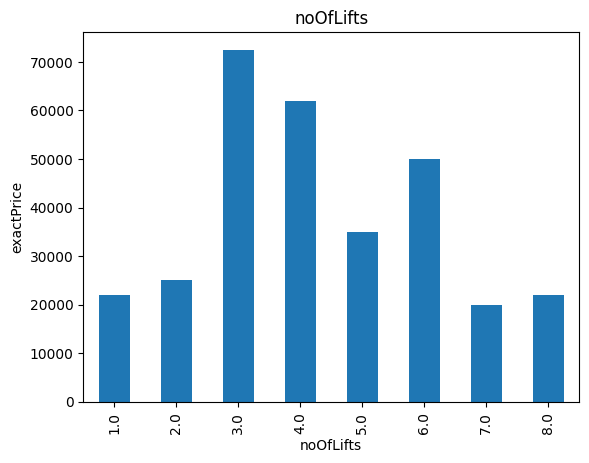

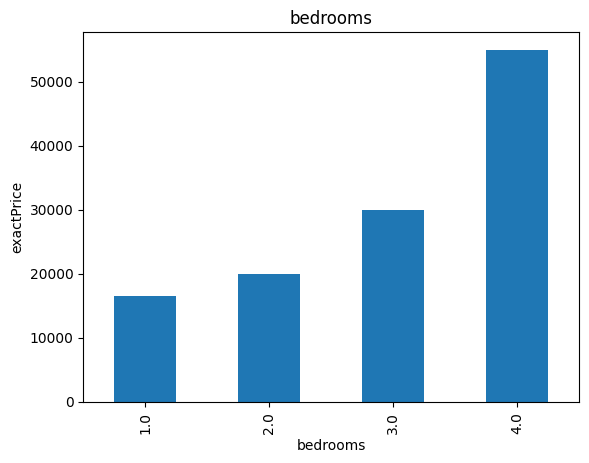

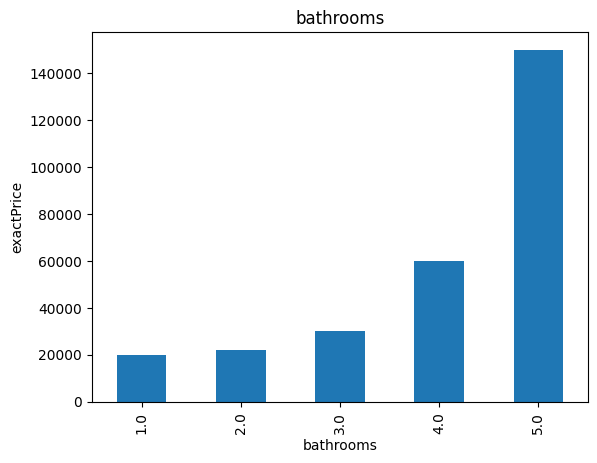

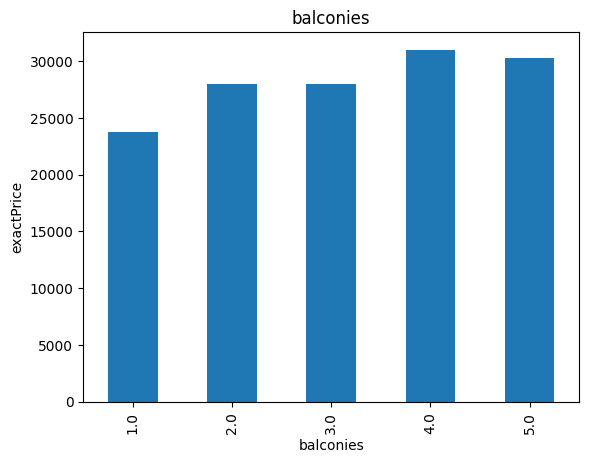

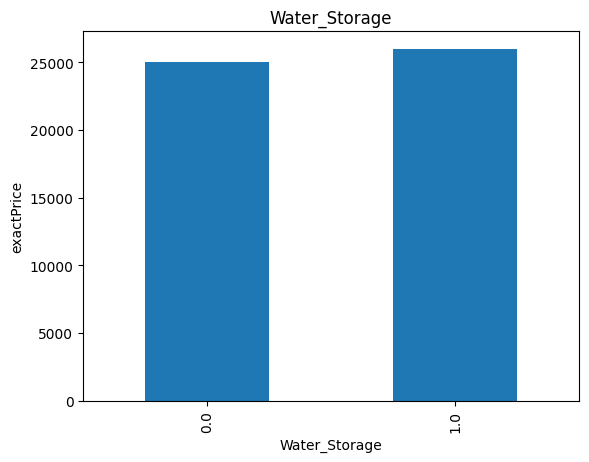

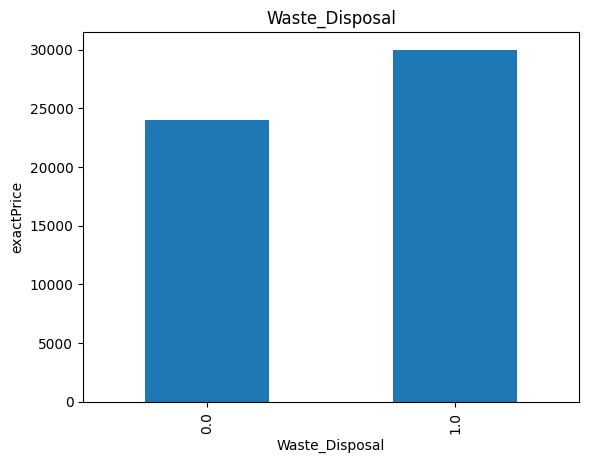

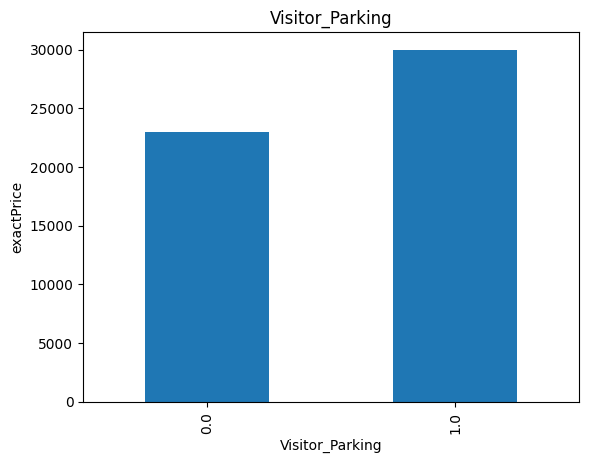

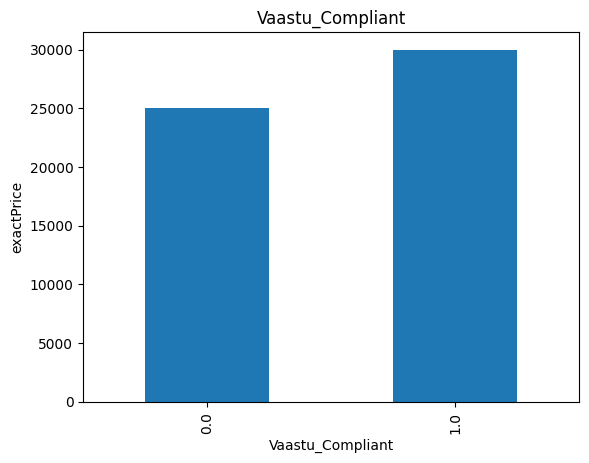

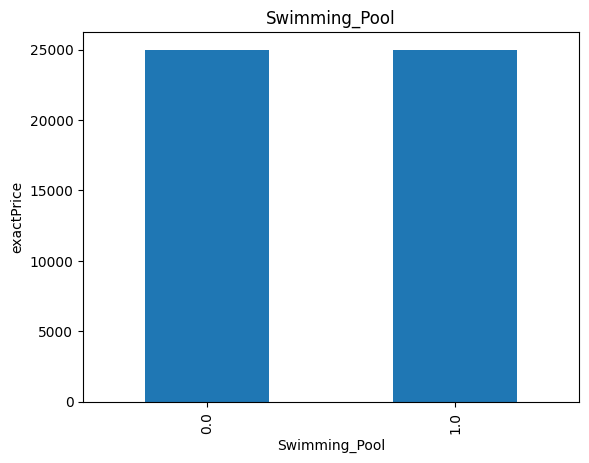

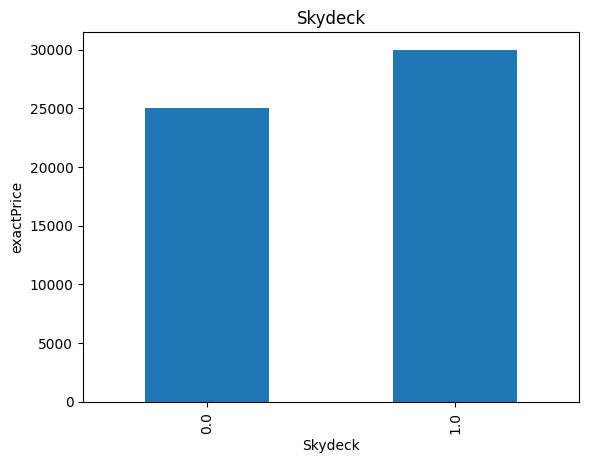

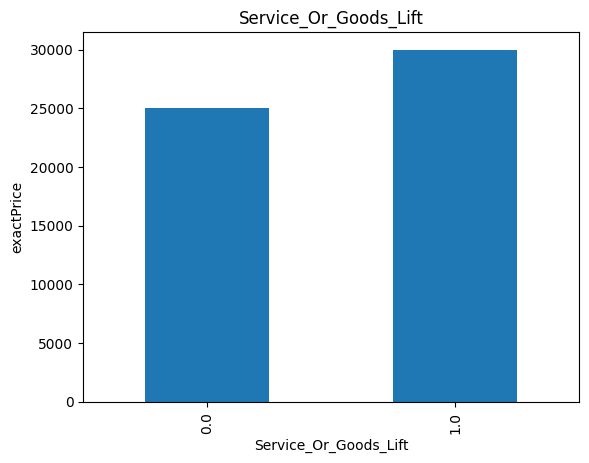

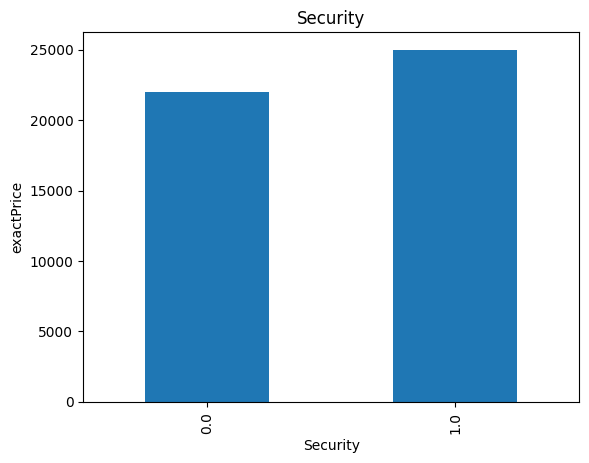

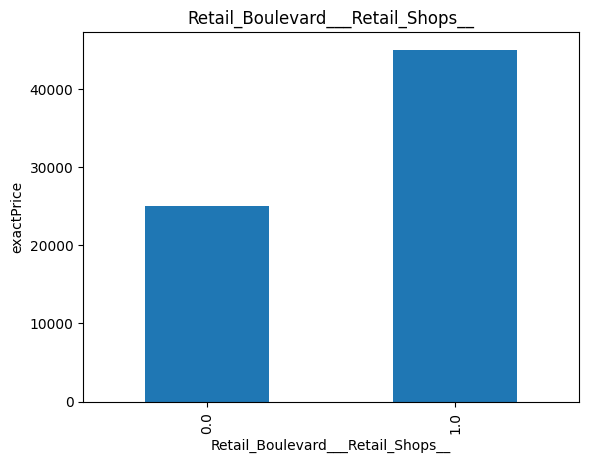

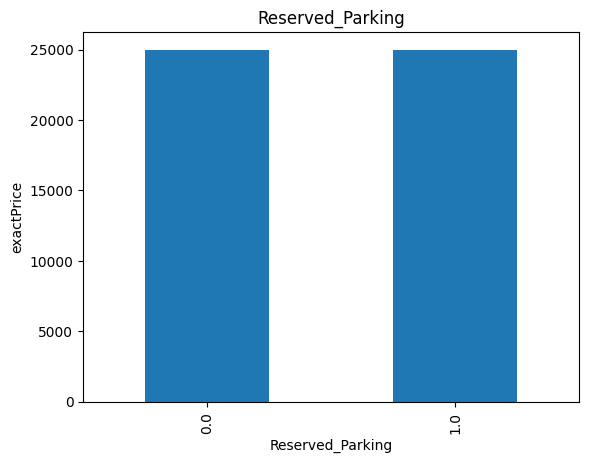

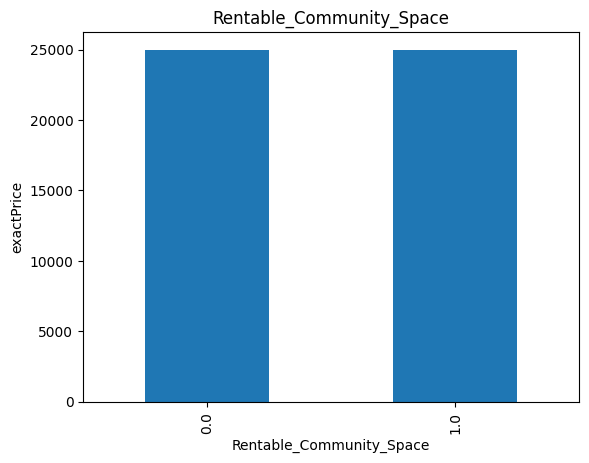

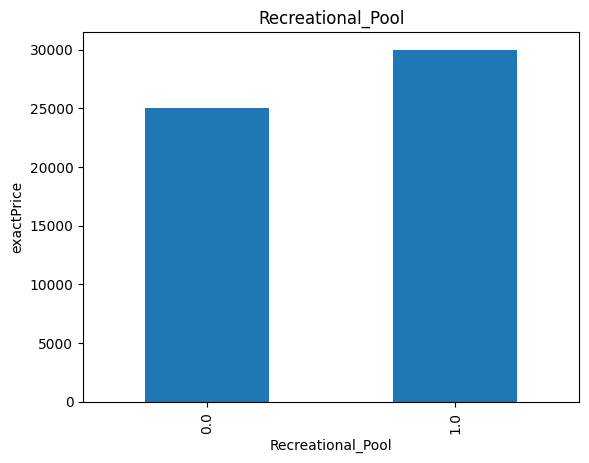

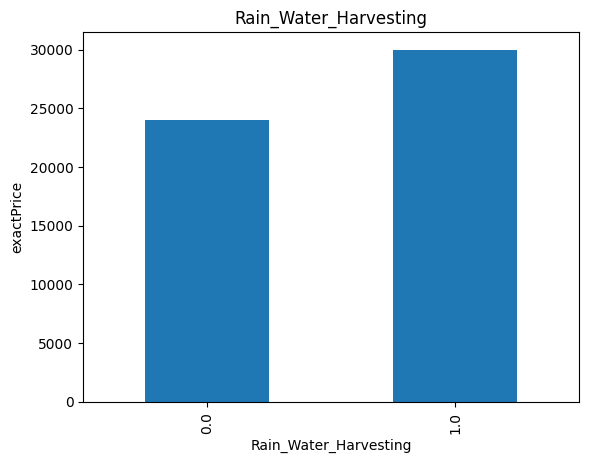

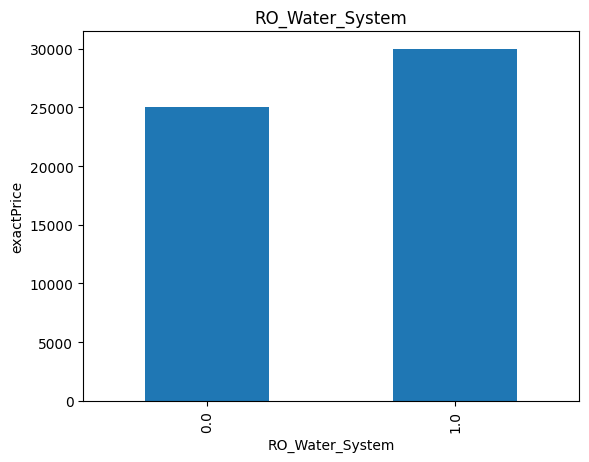

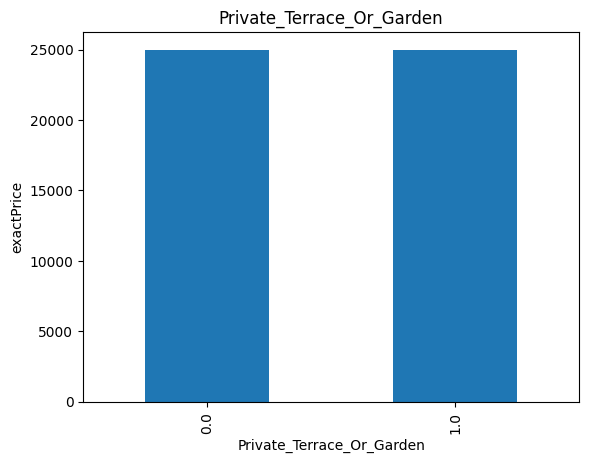

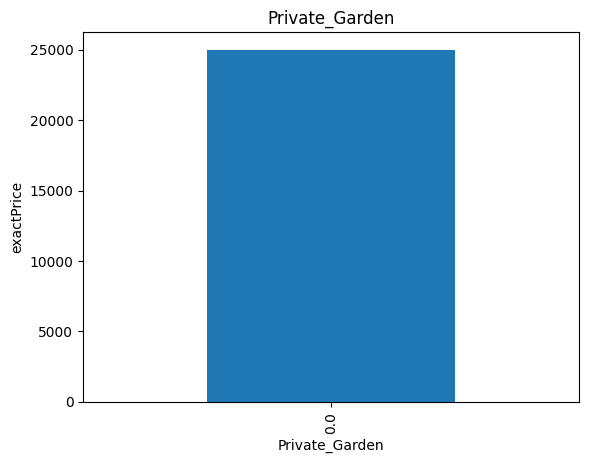

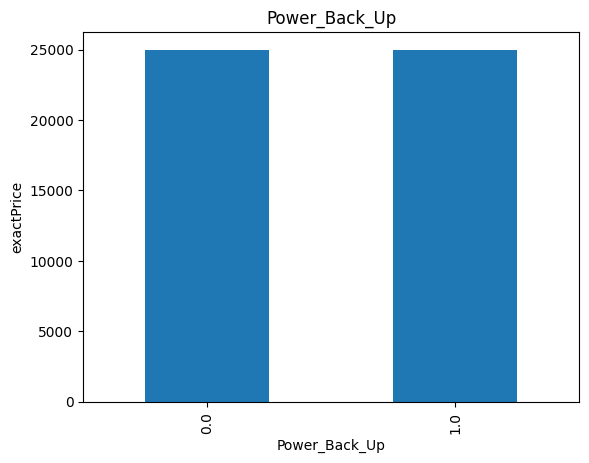

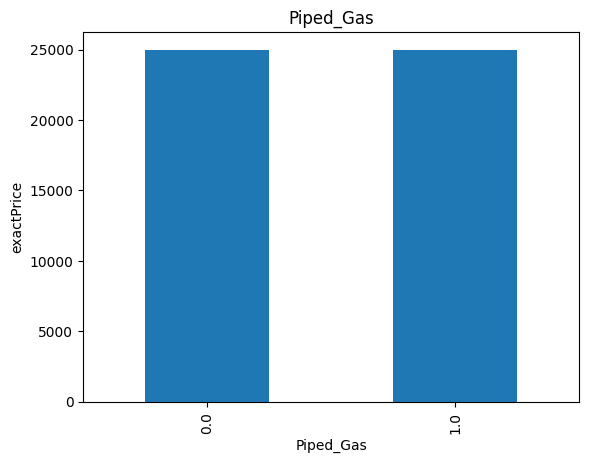

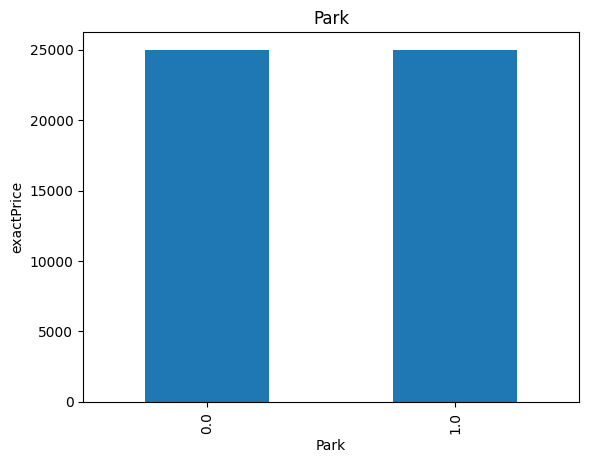

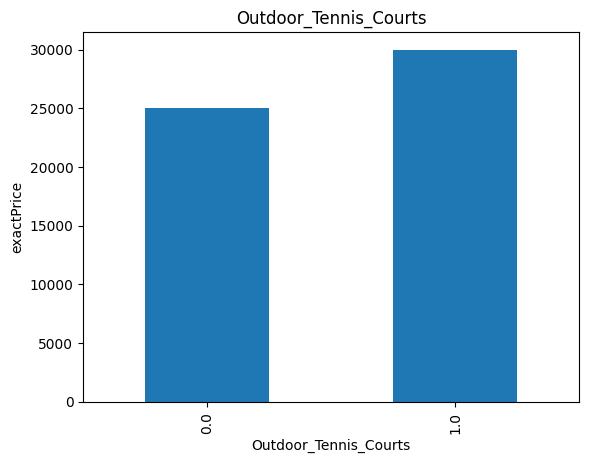

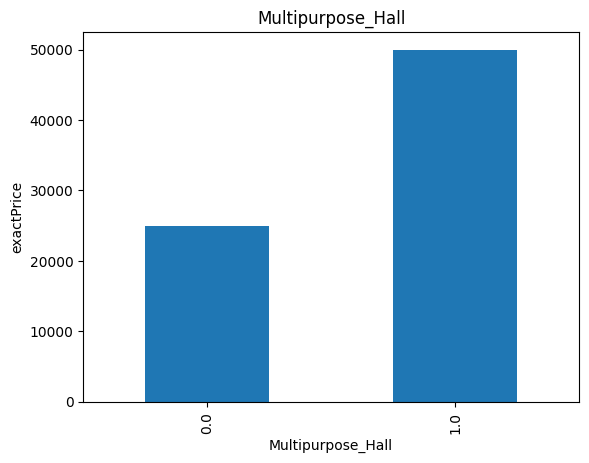

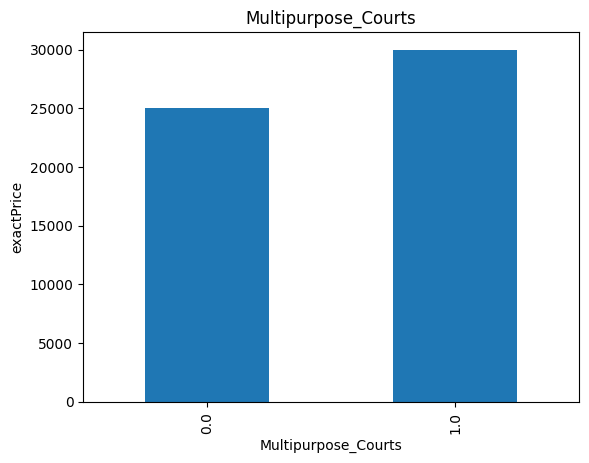

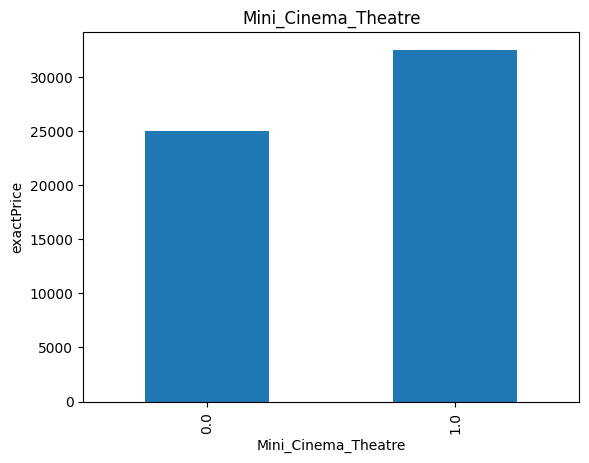

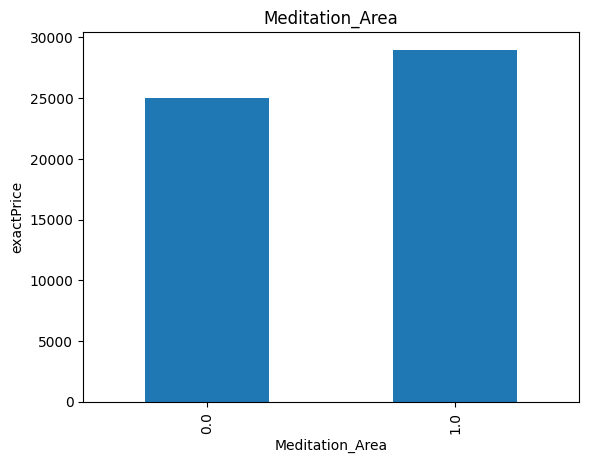

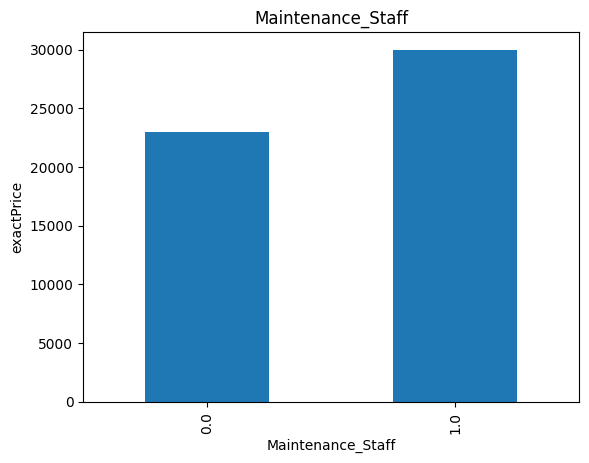

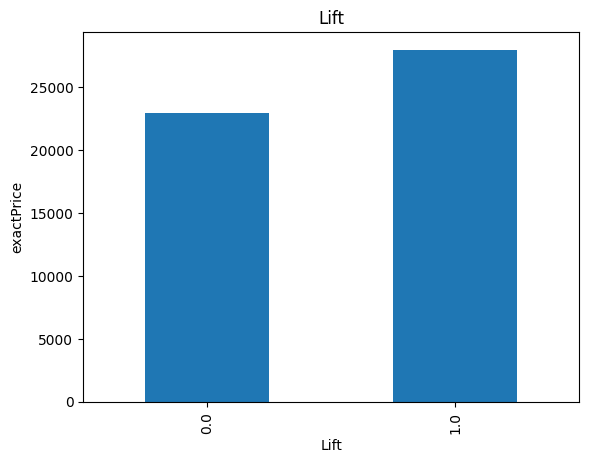

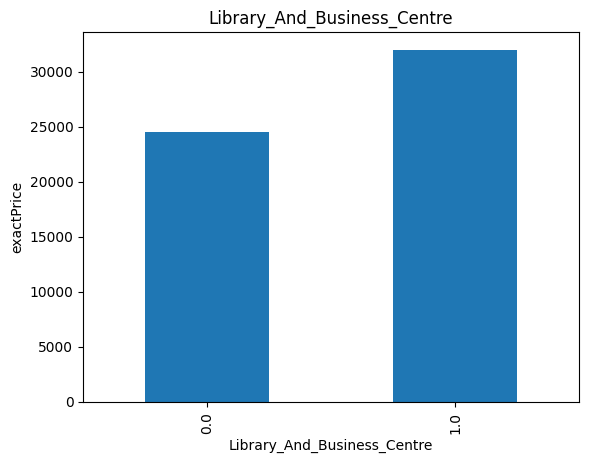

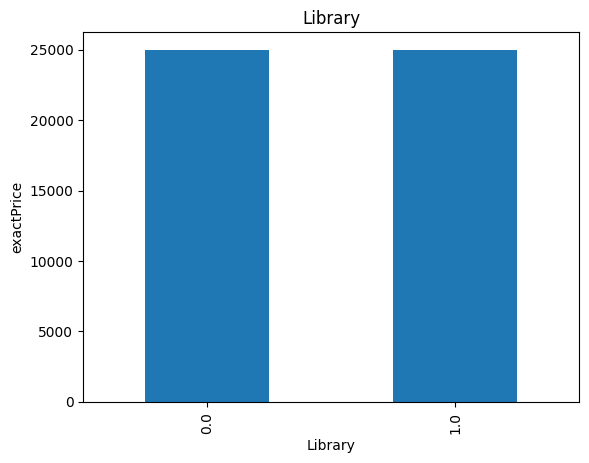

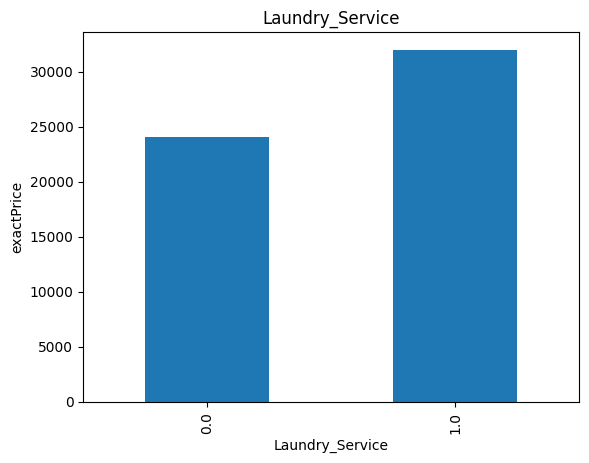

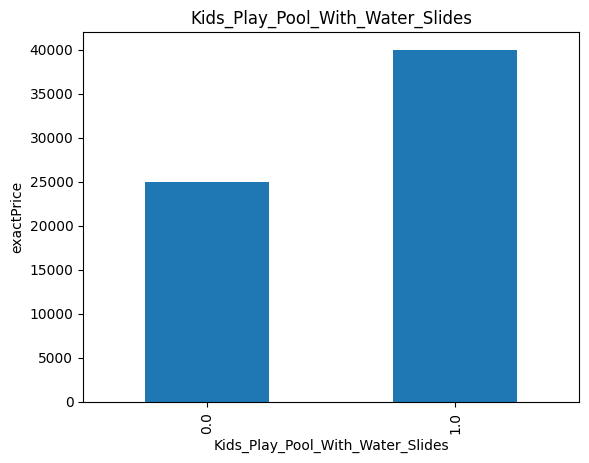

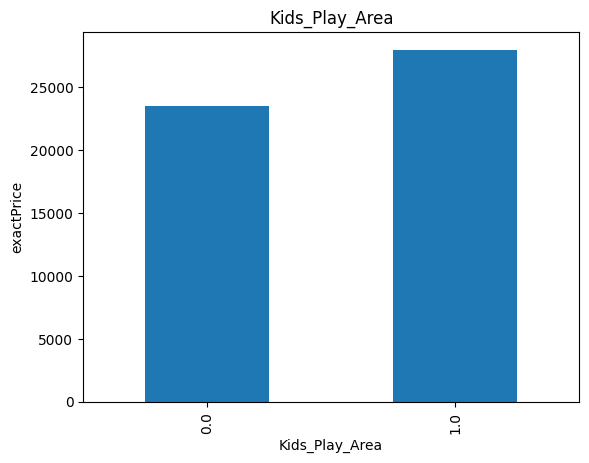

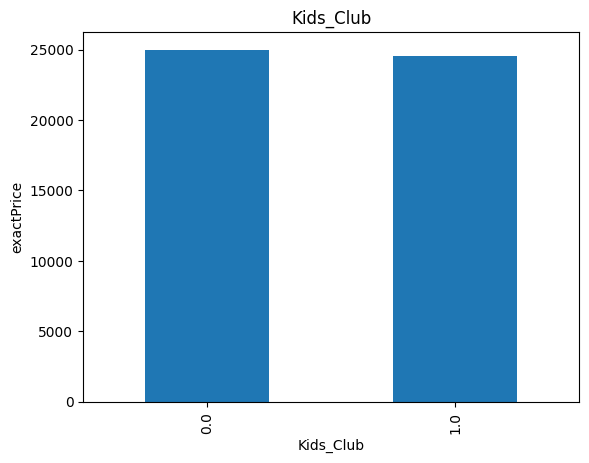

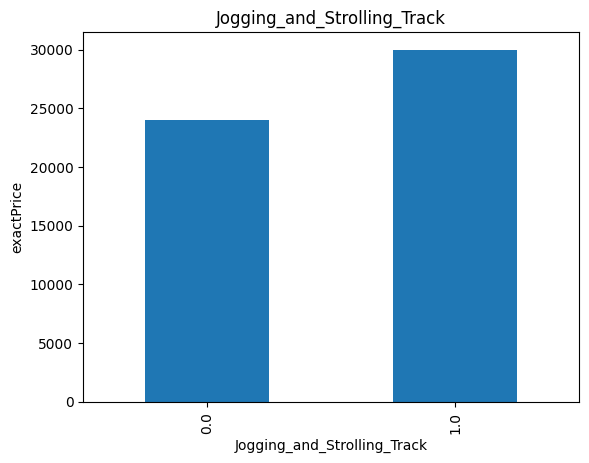

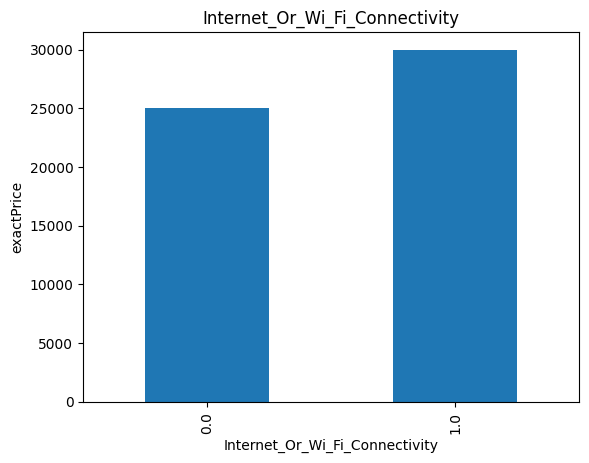

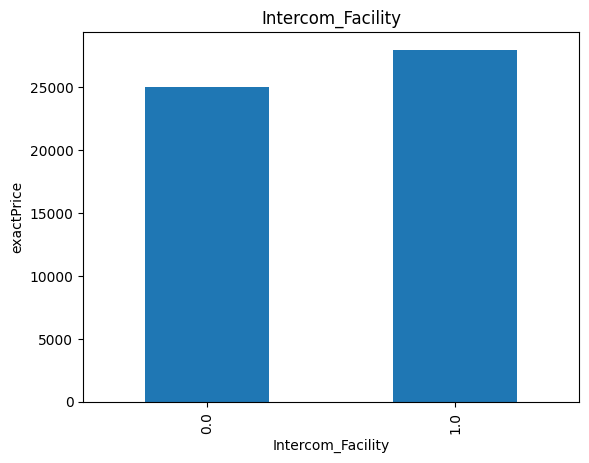

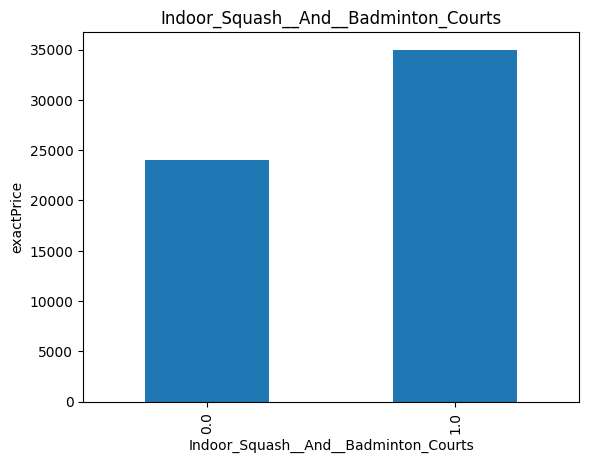

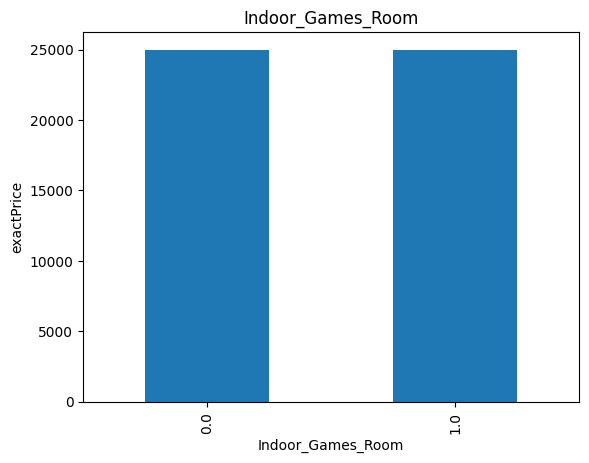

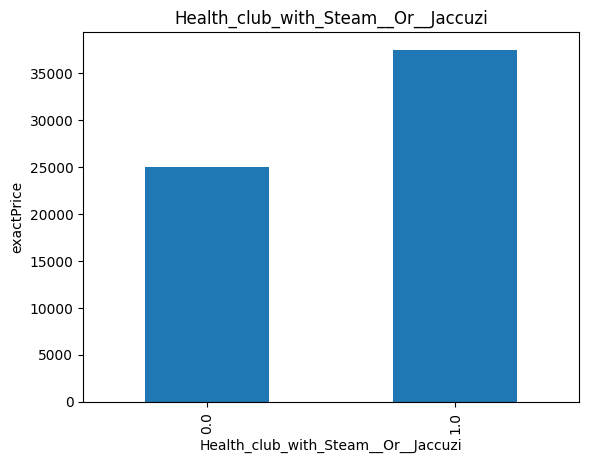

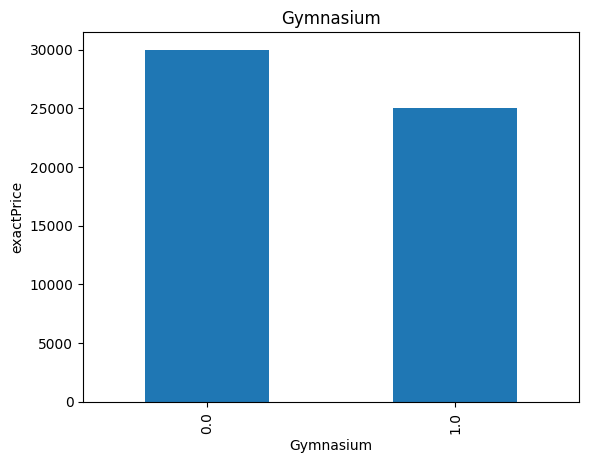

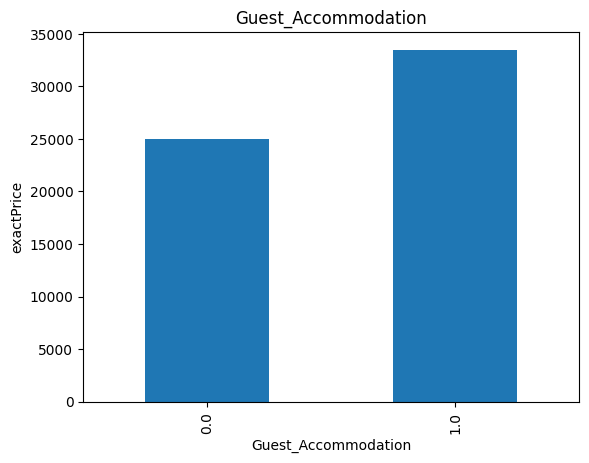

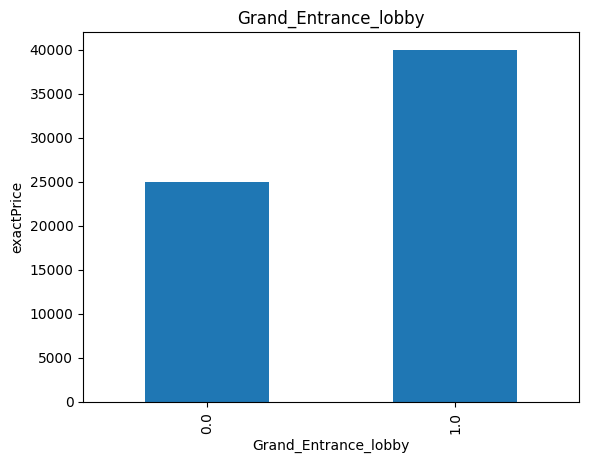

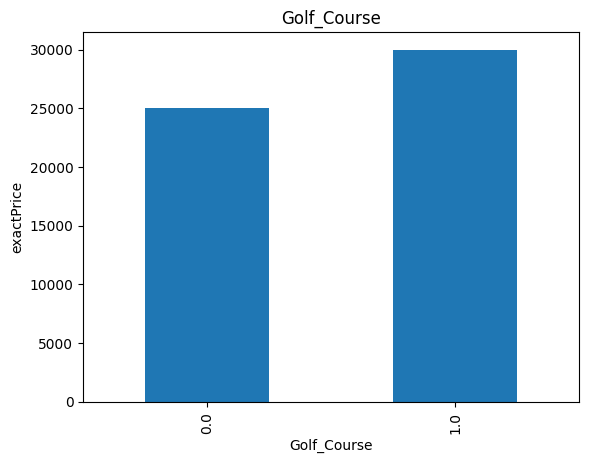

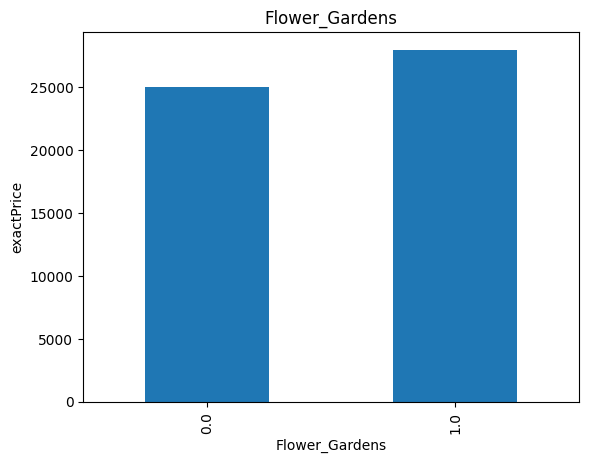

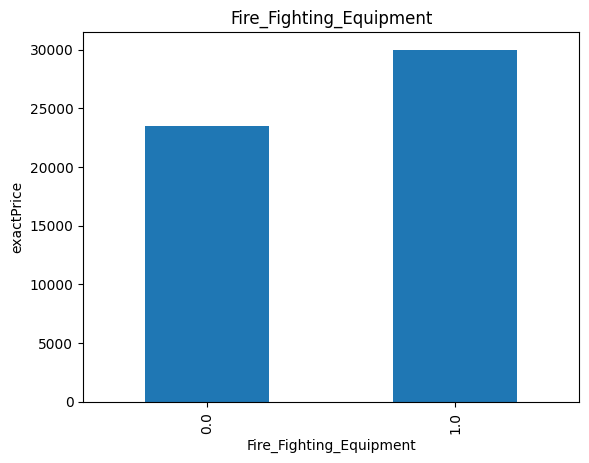

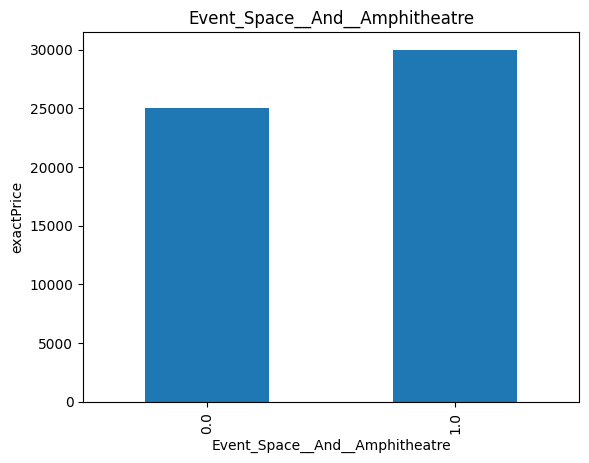

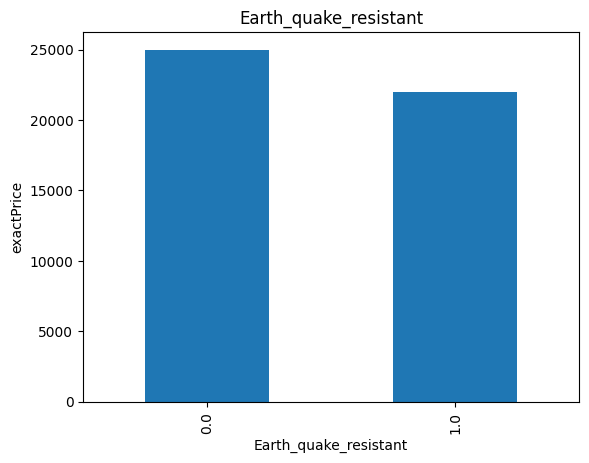

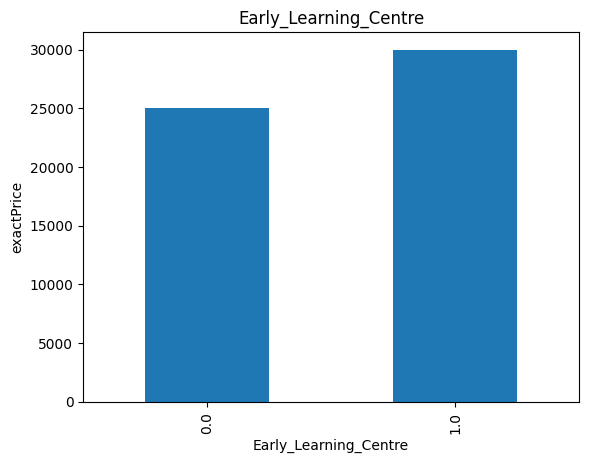

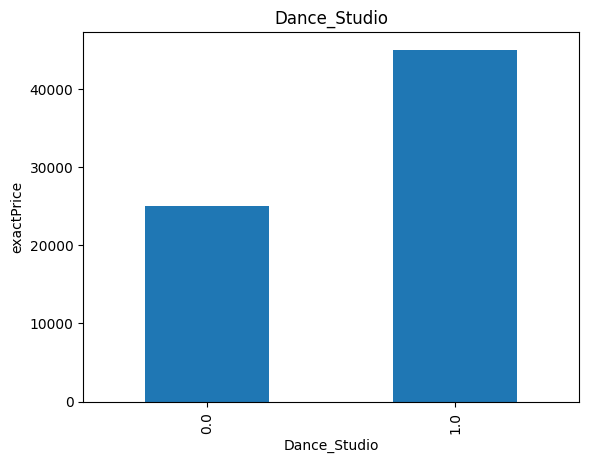

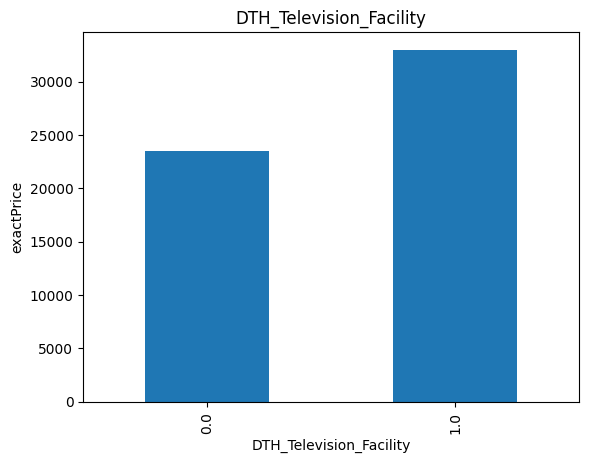

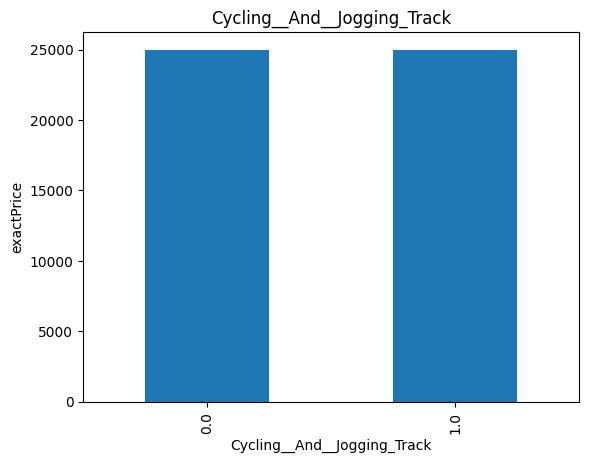

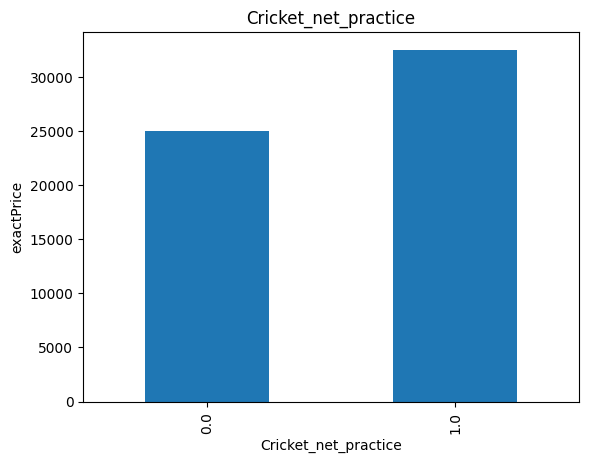

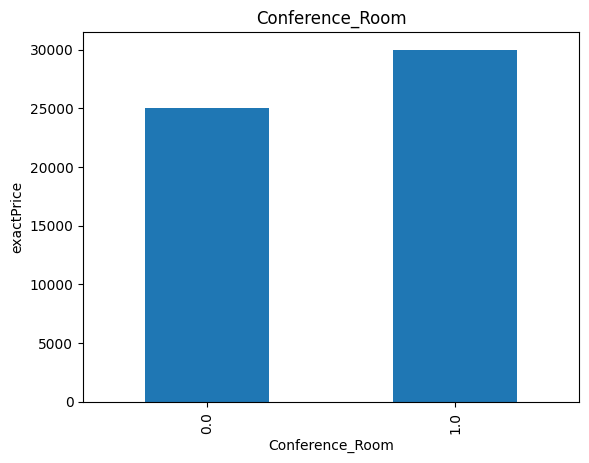

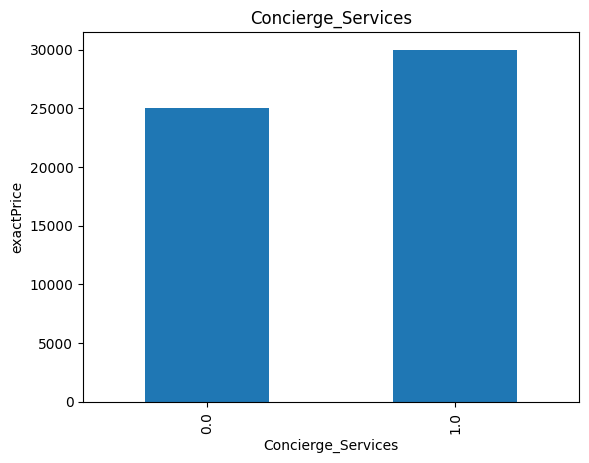

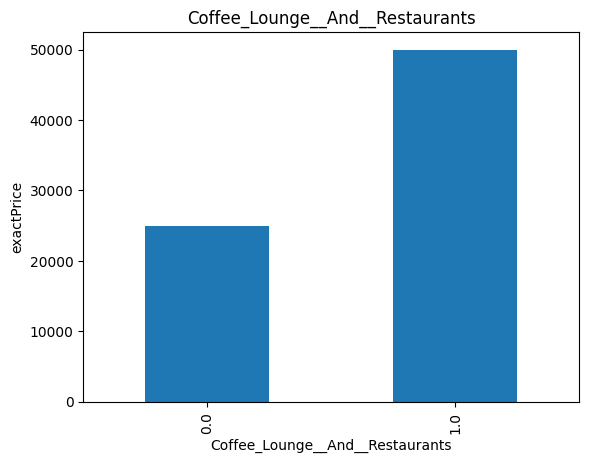

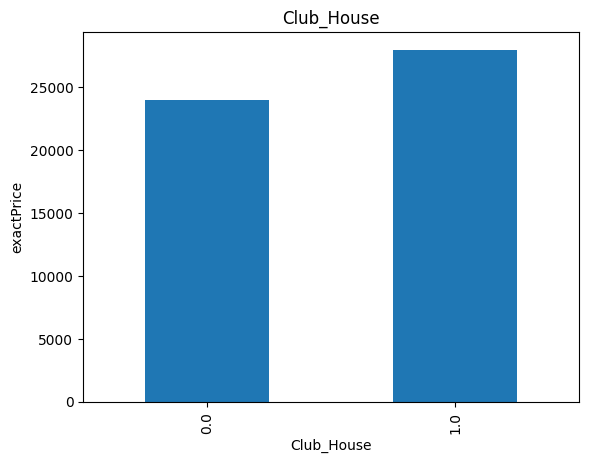

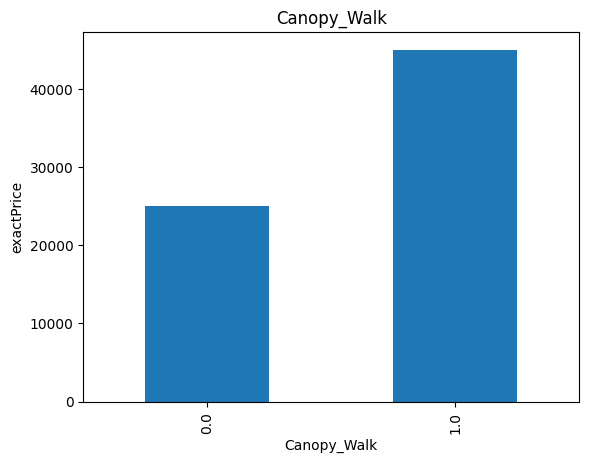

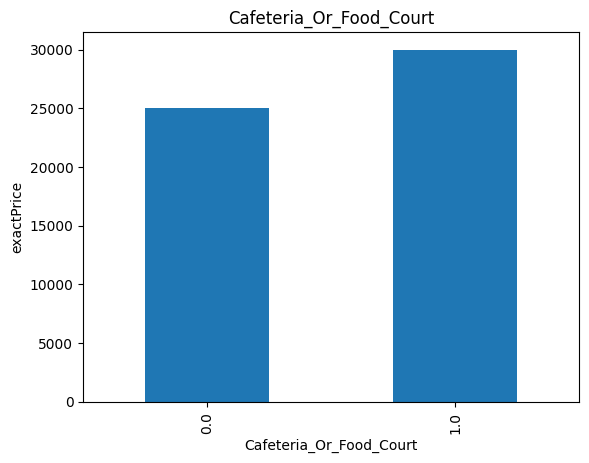

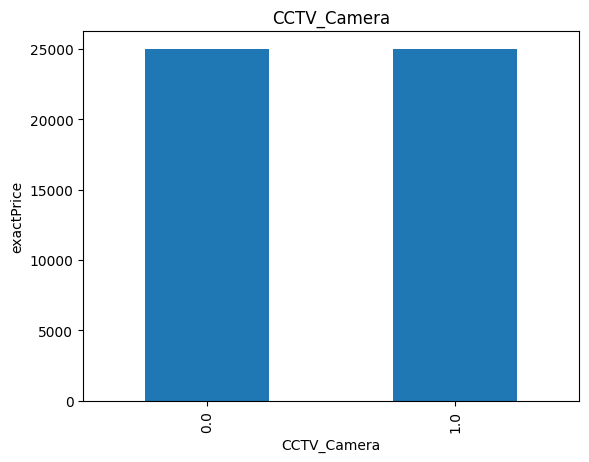

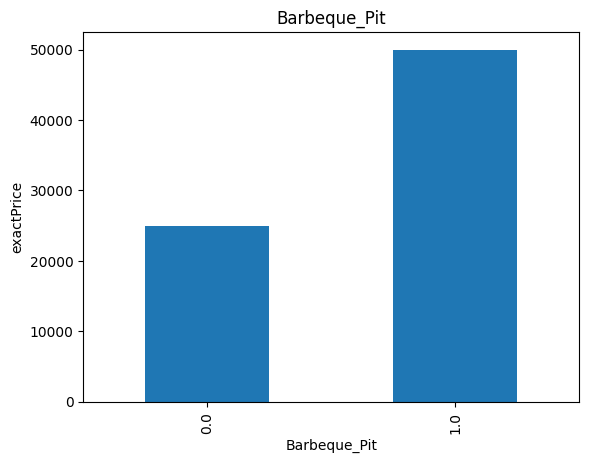

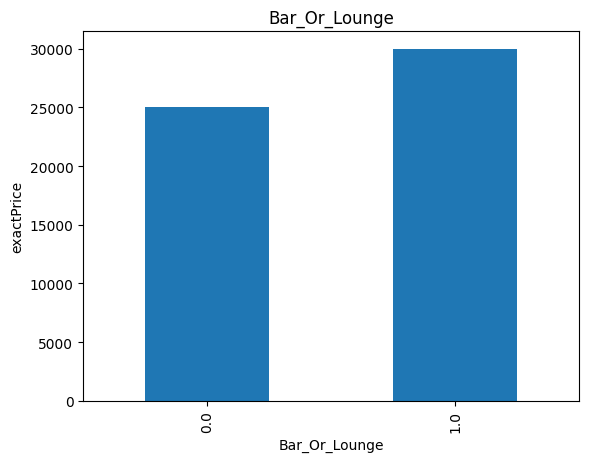

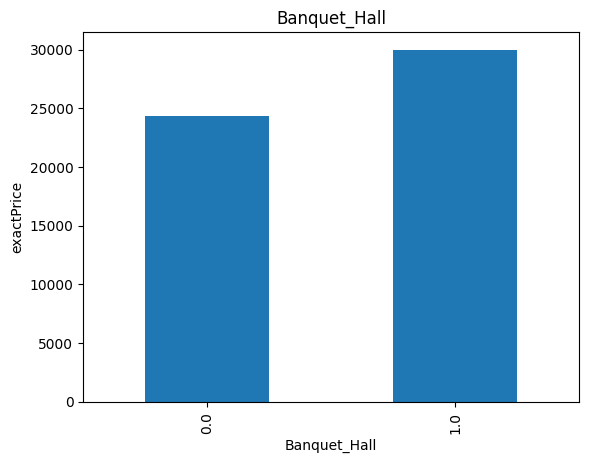

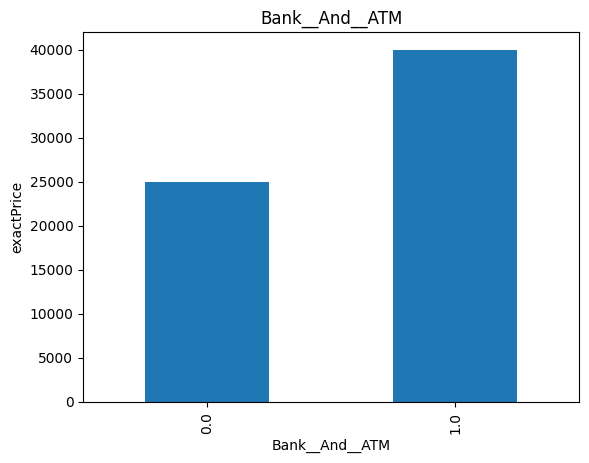

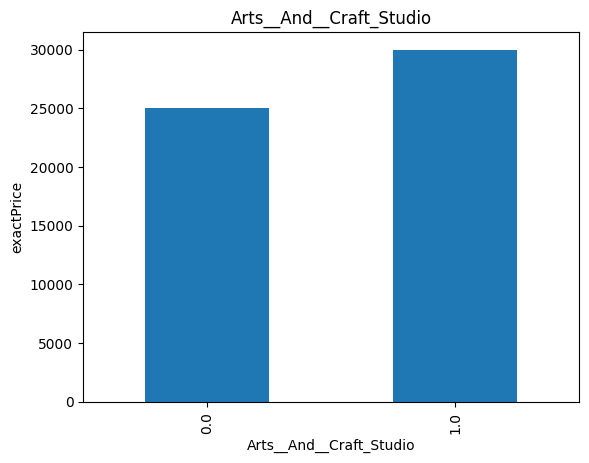

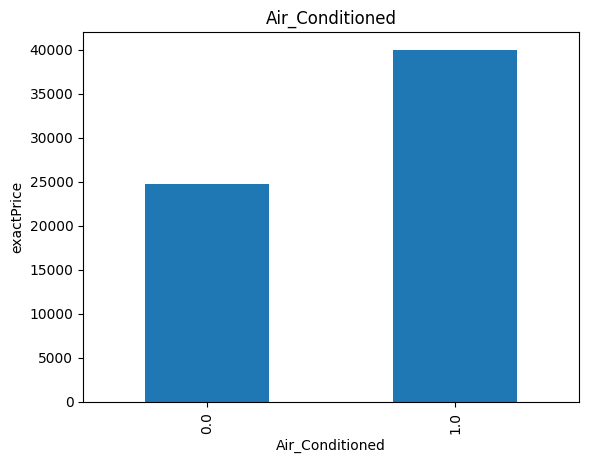

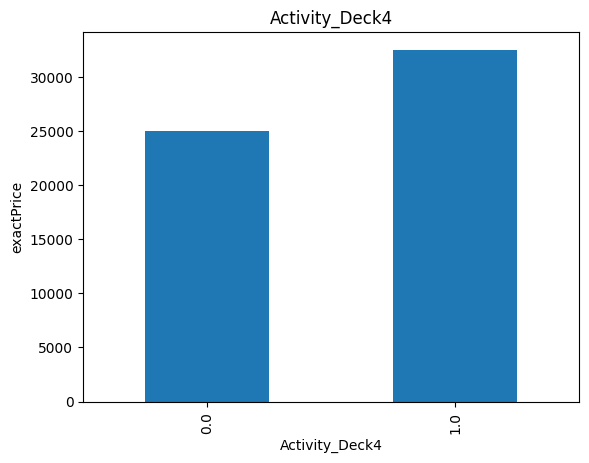

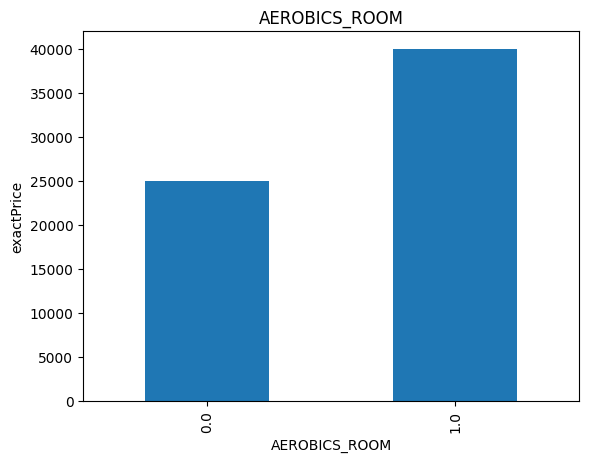

In [78]:
for feature in discrete_feature:
    data=dataset_dropped_na.copy()
    dataset_dropped_na.groupby(feature)['exactPrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('exactPrice')
    plt.title(feature)
    plt.show()

### Continuous Variable

In [79]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))


Continuous feature Count 9


In [80]:
#  Removing Latitude and Longitude since their main significance is to explore data based on geolocation
continuous_feature.remove("Lat")
continuous_feature.remove("Long")

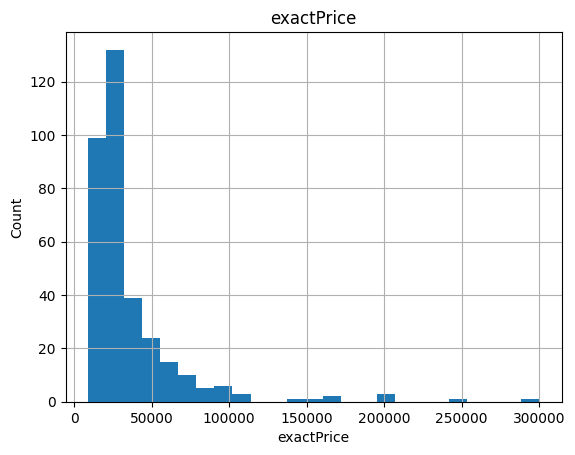

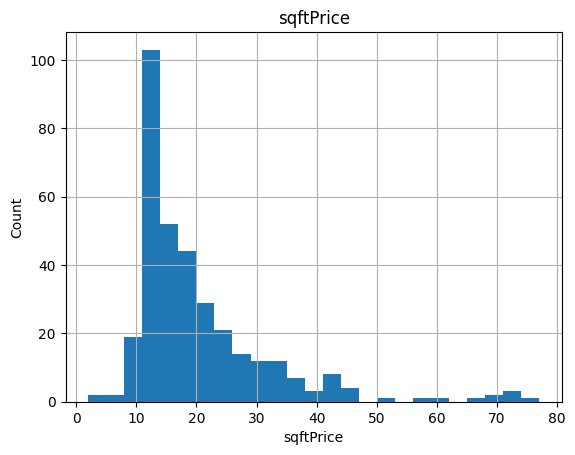

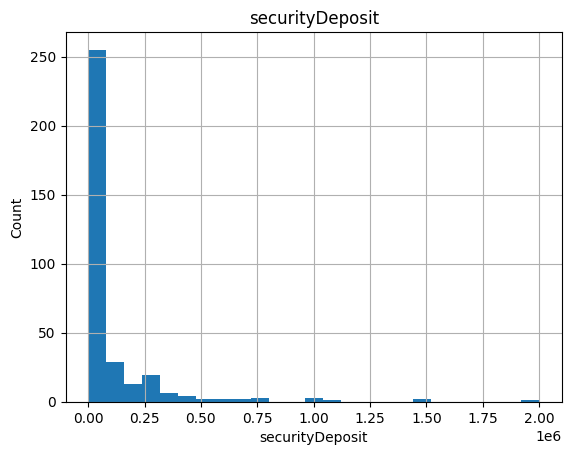

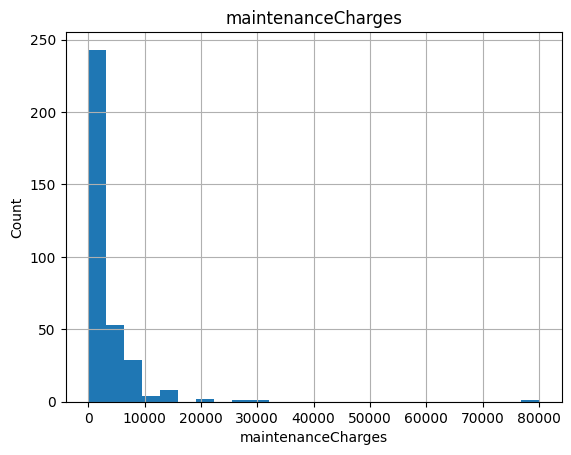

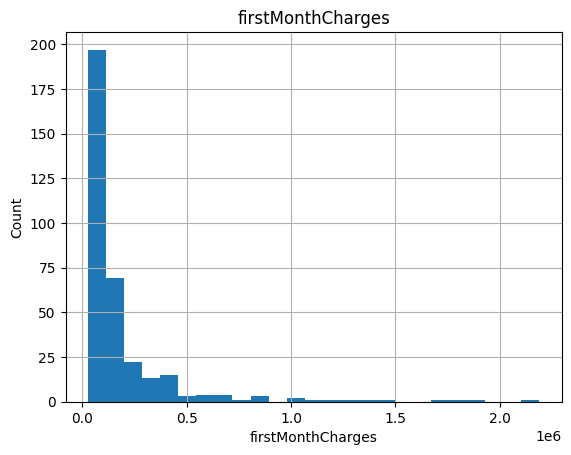

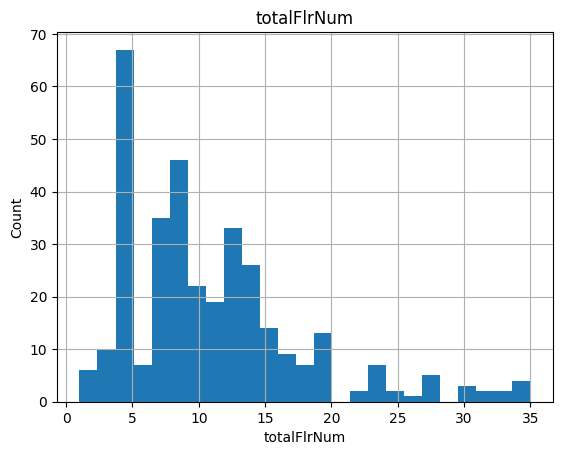

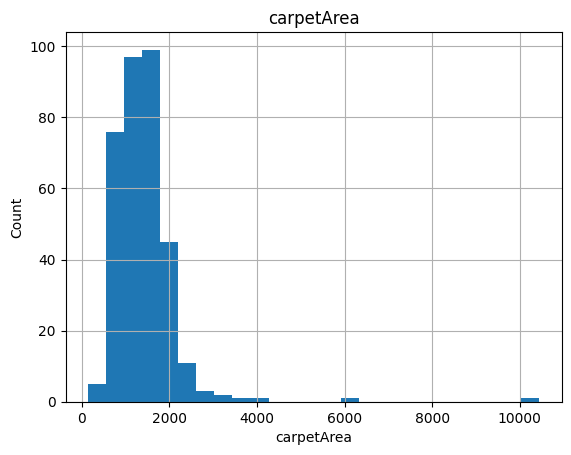

In [81]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset_dropped_na.copy()
    dataset_dropped_na[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

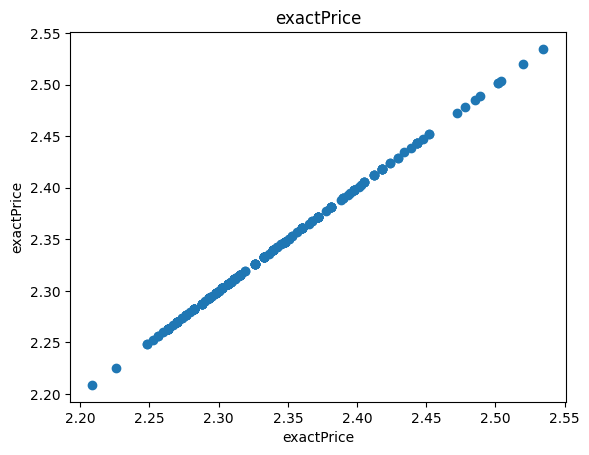

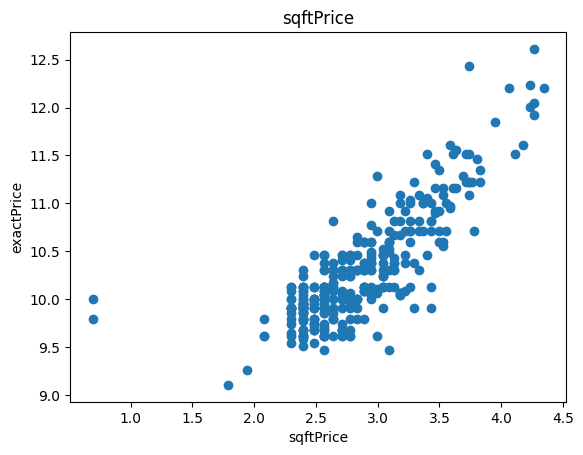

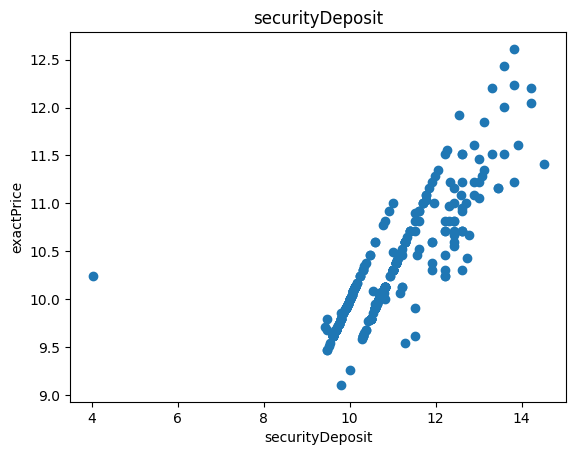

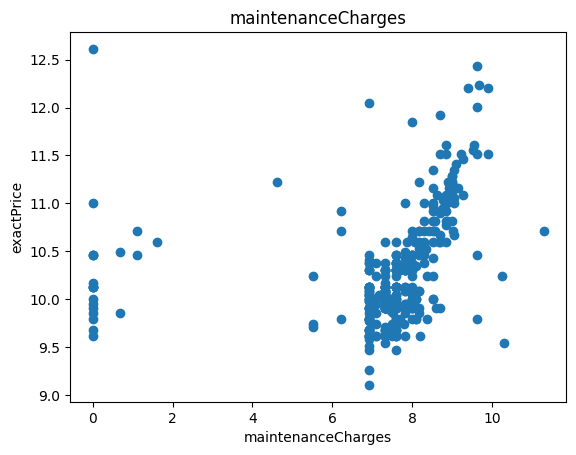

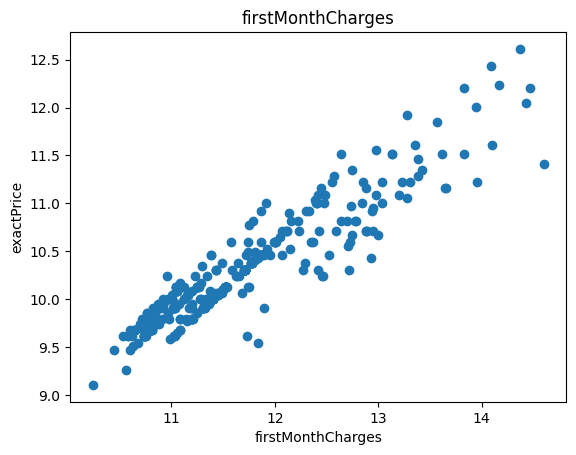

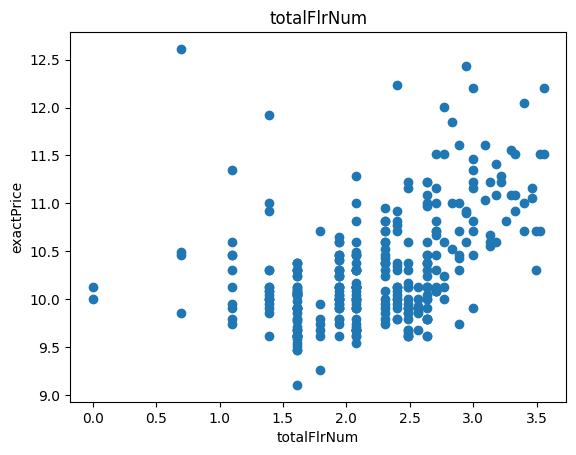

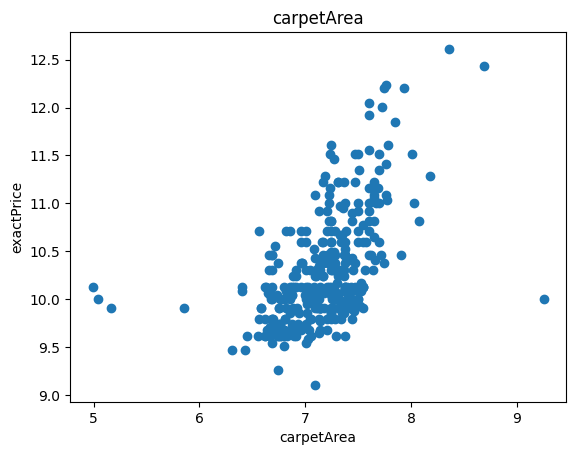

In [82]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset_dropped_na.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['exactPrice']=np.log(data['exactPrice'])
        plt.scatter(data[feature],data['exactPrice'])
        plt.xlabel(feature)
        plt.ylabel('exactPrice')
        plt.title(feature)
        plt.show()


### 4. Outliers

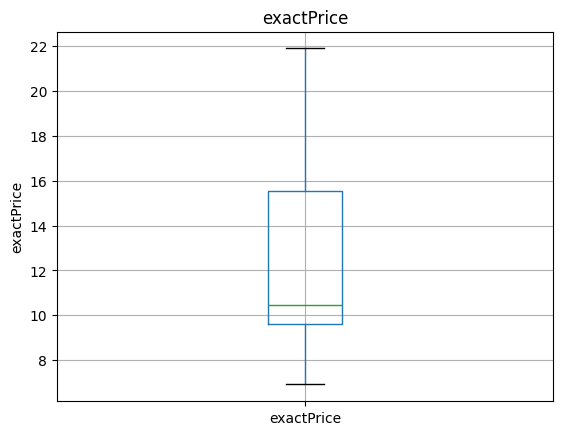

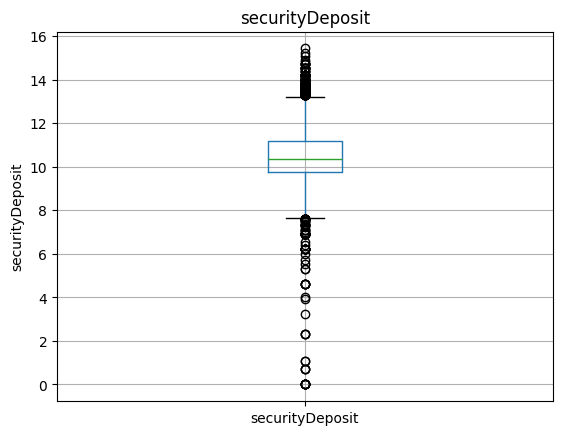

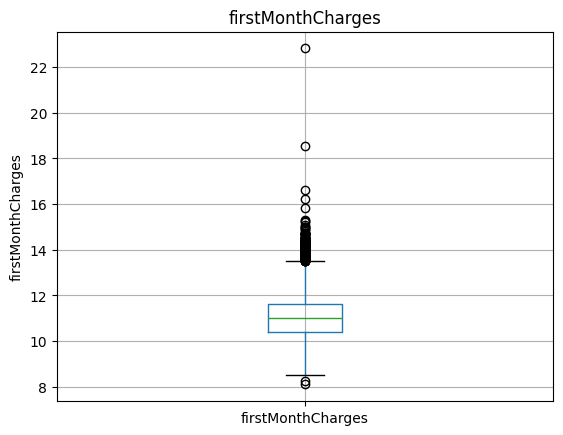

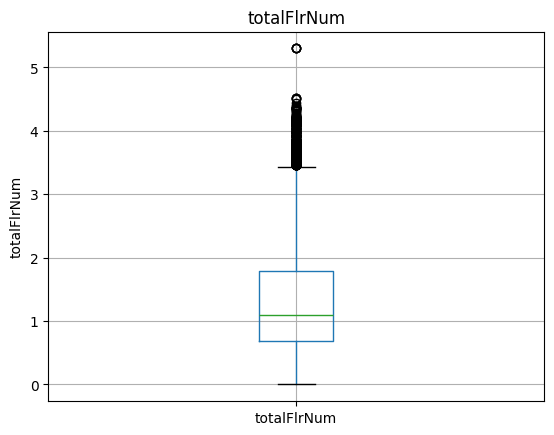

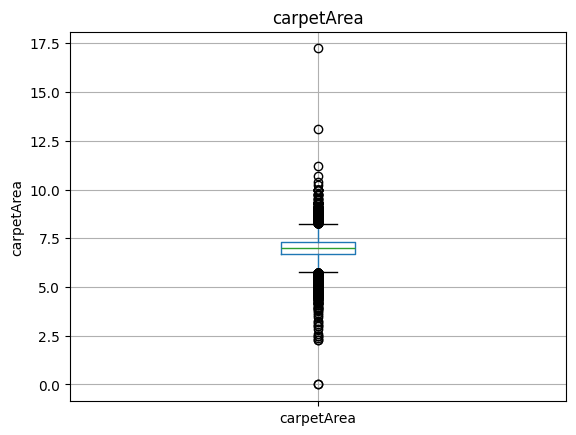

In [83]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### 5. Categorical Variables


In [84]:
categorical_features=[feature for feature in dataset_dropped_na.columns if dataset_dropped_na[feature].dtypes=='O']
categorical_features


['propertyType',
 'postedOn',
 'maintenanceChargesFrequency',
 'locality',
 'furnishing',
 'flrNum',
 'facing',
 'city',
 'brokerage',
 'URLs',
 'RentOrSale']

In [85]:
dataset_dropped_na[categorical_features].head()


propertyType     postedOn maintenanceChargesFrequency  \
90   Multistorey Apartment  May 20, '23                     Monthly   
177  Multistorey Apartment  May 20, '23                     Monthly   
183  Multistorey Apartment  May 20, '23                     Monthly   
190  Multistorey Apartment  May 20, '23                     Monthly   
192  Multistorey Apartment  May 21, '23                     Monthly   

        locality   furnishing flrNum        facing         city brokerage  \
90   Gandhinagar    Furnished      5  North - East  Gandhinagar   30 days   
177     Sargasan  Unfurnished      1  North - East  Gandhinagar   30 days   
183  Gandhinagar    Furnished      2  North - East  Gandhinagar   30 days   
190  Gandhinagar    Furnished      2  North - East  Gandhinagar   30 days   
192     Sargasan  Unfurnished      5  North - East  Gandhinagar   30 days   

                                                  URLs RentOrSale  
90   https://www.magicbricks.com/propertyDetails/2-...       Rent  
177  https://www.magicbricks.com/propertyDetails/2-...       Rent  
183  https://www.magicbricks.com/propertyDetails/2-...       Rent  
190  https://www.magicbricks.com/propertyDetails/3-...       Rent  
192  https://www.magicbricks.com/propertyDetails/2-...       Rent

In [86]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset_dropped_na[feature].unique())))


The feature is propertyType and number of categories are 3
The feature is postedOn and number of categories are 54
The feature is maintenanceChargesFrequency and number of categories are 2
The feature is locality and number of categories are 104
The feature is furnishing and number of categories are 3
The feature is flrNum and number of categories are 28
The feature is facing and number of categories are 8
The feature is city and number of categories are 13
The feature is brokerage and number of categories are 5
The feature is URLs and number of categories are 342
The feature is RentOrSale and number of categories are 1


### Since I don't intend to explore the below features, I am deleting these

In [87]:
categorical_features.remove("postedOn")
categorical_features.remove("locality")
categorical_features.remove("URLs")
categorical_features.remove("RentOrSale")

### 6. Cardinality of Categorical Variables

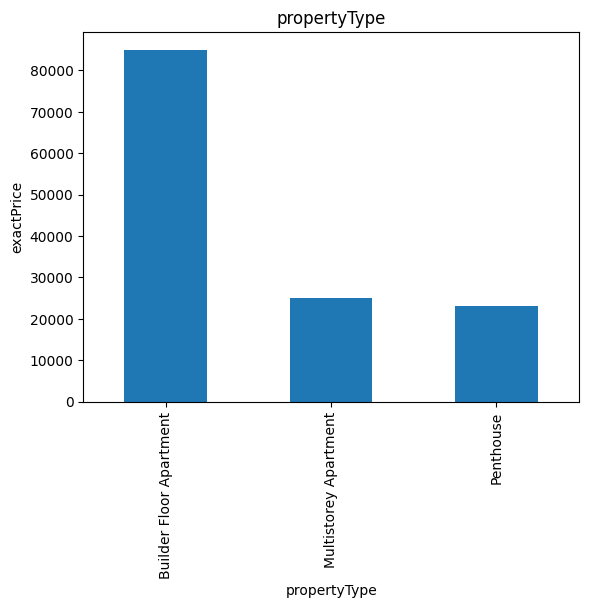

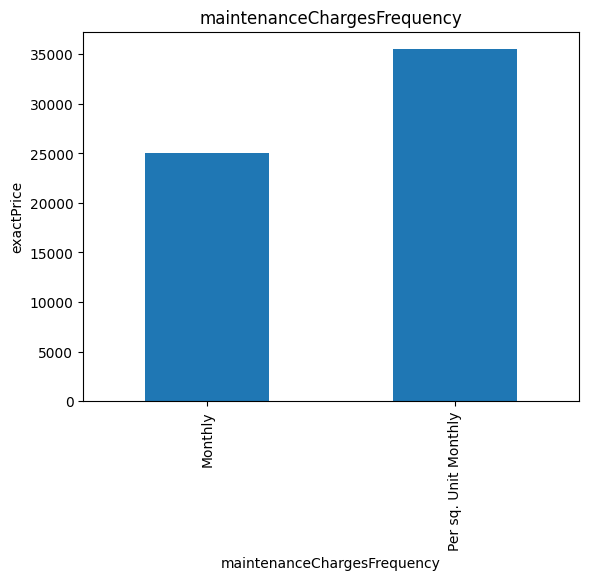

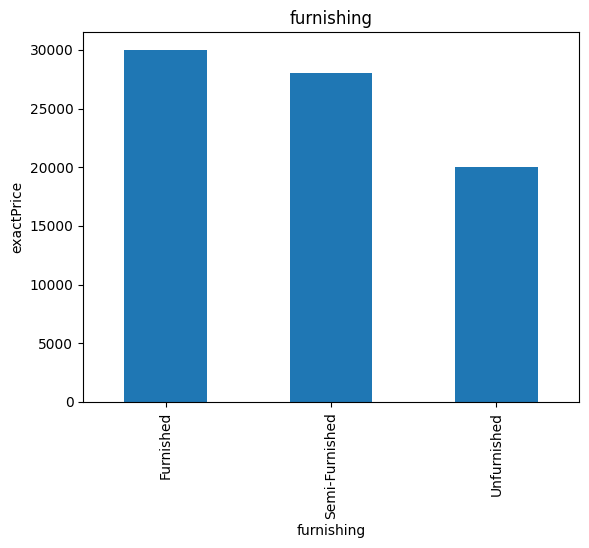

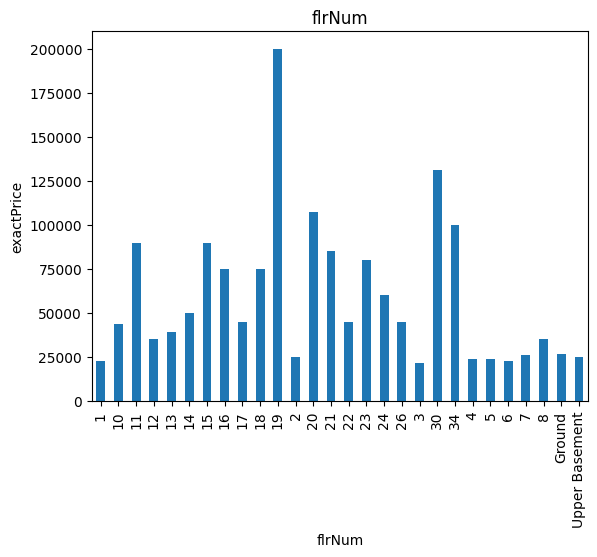

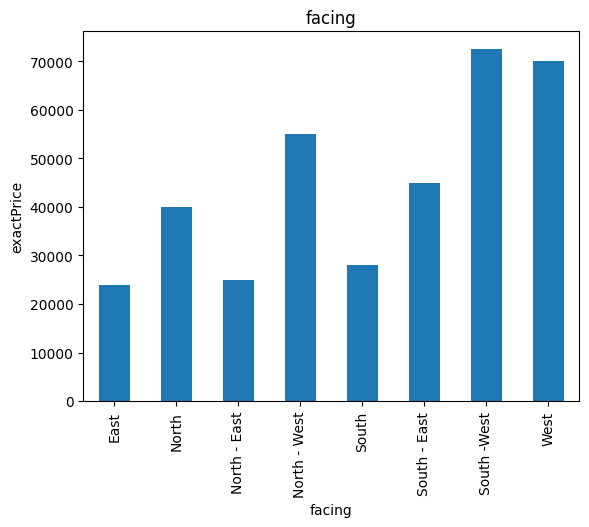

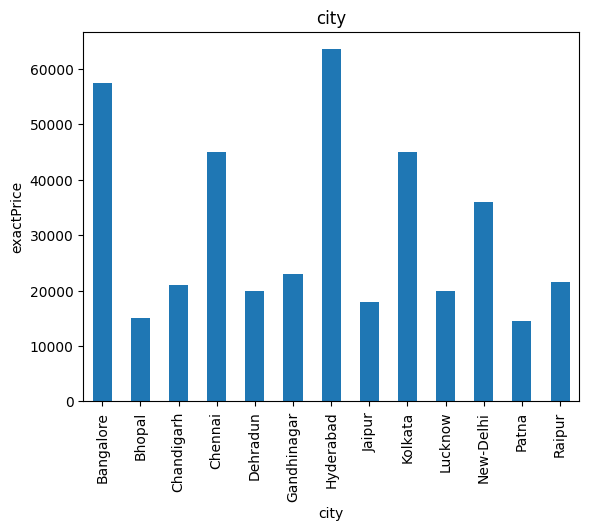

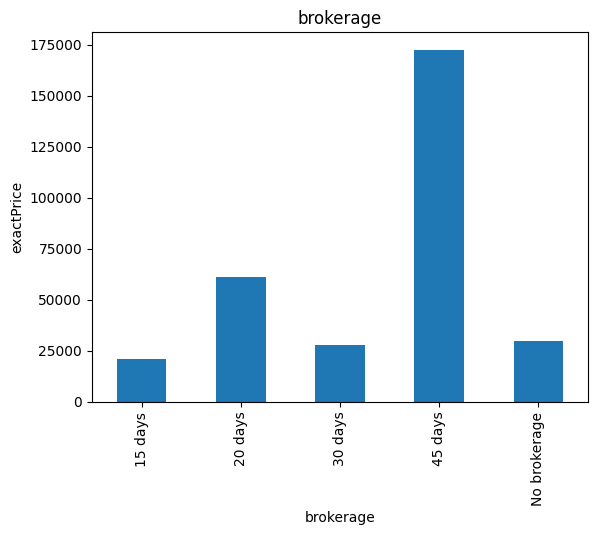

In [88]:
for feature in categorical_features:
    data=dataset_dropped_na.copy()
    data.groupby(feature)['exactPrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('exactPrice')
    plt.title(feature)
    plt.show()

### 7. Mapping data as per their Longitude and Latitude

In [89]:
def preprocess_for_map(df) :
    df = df[['locality','Lat','Long','exactPrice',"city"]]
    # df = df.replace('NA', np.nan)
    df.dropna(subset=['Lat'], inplace=True)
    df.dropna(subset=['exactPrice'], inplace=True)
    df["Lat"] = df["Lat"].astype(float)
    df["Long"] = df["Long"].astype(float)
    return df


map_data = preprocess_for_map(dataset)

/tmp/ipykernel_12028/3529361060.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Lat'], inplace=True)
/tmp/ipykernel_12028/3529361060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['exactPrice'], inplace=True)
/tmp/ipykernel_12028/3529361060.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Lat"] = df["Lat"].astype(float)
/tmp/ip

In [90]:
map_data[['Lat','Long','exactPrice',"city"]]

Lat       Long  exactPrice      city
0      25.605898  85.056330    240000.0     Patna
2      25.621426  85.079964     17000.0     Patna
3      25.593090  85.185006      5000.0     Patna
4      25.593090  85.185005     12000.0     Patna
5      25.605076  85.144040     18000.0     Patna
...          ...        ...         ...       ...
27895  30.314961  78.056634  20227500.0  Dehradun
27896  30.370890  78.081697   6933500.0  Dehradun
27897  30.354673  78.077240   9000000.0  Dehradun
27898  30.354086  78.082277   7645000.0  Dehradun
27899  30.310413  78.008223  11525400.0  Dehradun

[24610 rows x 4 columns]

In [91]:
city_map = folium.Map(location=[21, 78], zoom_start=11.2, tiles='Stamen Terrain')
mc = MarkerCluster()
for idx, row in map_data.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        popup = """
        Locality : <b>%s</b><br>
        Price : <b>%s</b><br>
        city : <b>%s</b><br>
        """ % (row['locality'], row['exactPrice'],row["city"])
        mc.add_child(Marker([row['Lat'], row['Long']],tooltip=popup))
    city_map.add_child(mc)
city_map

ValueError: Custom tiles must have an attribution.

# Initiation of Step 3

### Uptil now we have explored data with no null value in all the 90 features. But this resulted into very low amount of data to explore
##### Now we are going to choose specific columns to drop the null values and for important features we would fill the null values to explore wider rande of data
##### Since the exactPrice of properties for Sale would be very high than that of rent, I am seperating the the dataset on rent or sale to get a better look in the characteristics of the features

### Since Rent or Sale feature has very low null values 0.11%, I have decided to drop it from features_with_na and drop null values in dataset for smoother analysis

In [92]:
### Removing from features_with_na list

features_with_na.remove("RentOrSale")
features_with_na.remove("URLs")

### dropiing the features from the dataset

dataset = dataset.dropna(subset = ["RentOrSale"])
dataset = dataset.dropna(subset = ["URLs"])

#### Making an empty set to append all the important features/ those features where Null values scored more than the not Null values, Since those features are important and should not be droped the null values right away

#### Initializing a set of important features

In [93]:
impFea =set()

In [94]:
type(impFea)

set

### Here we check If the null values in any any feature correlates to higher exactPrice and store them in a set for further analysis

sqftPrice 13.19  % missing values


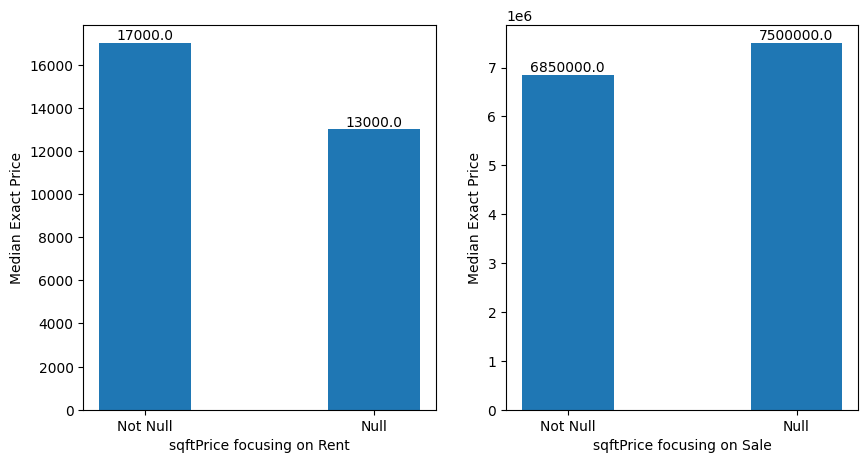

securityDeposit 69.72  % missing values


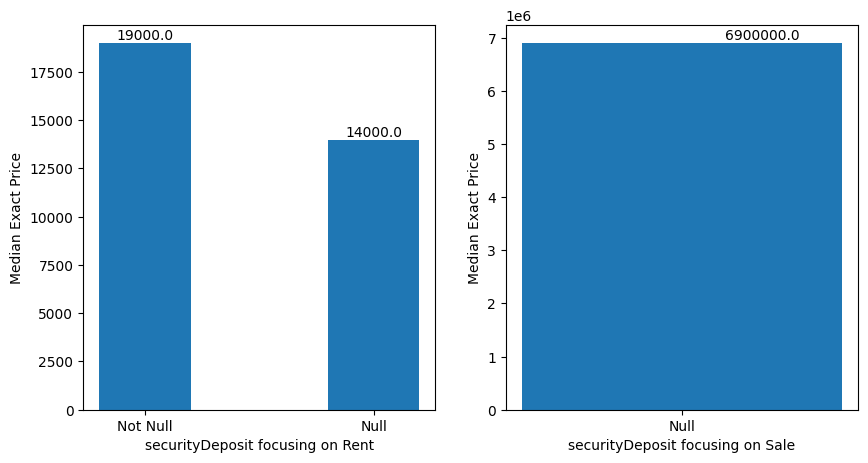

noOfLifts 83.97  % missing values


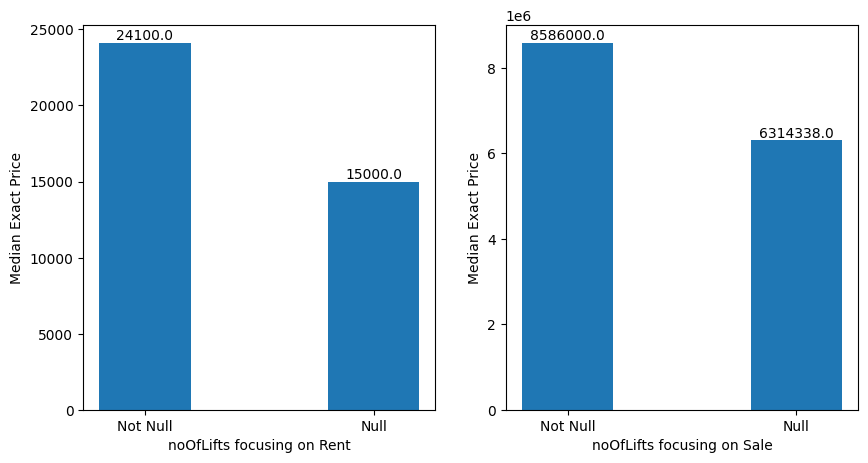

maintenanceChargesFrequency 76.37  % missing values


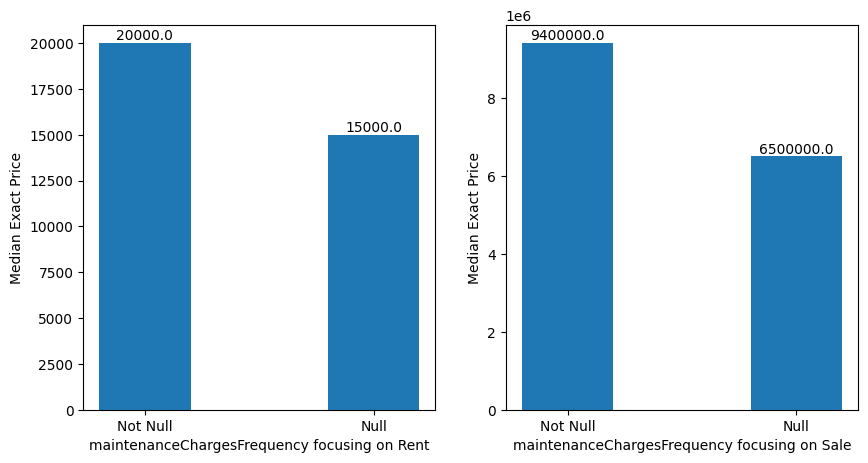

maintenanceCharges 83.82  % missing values


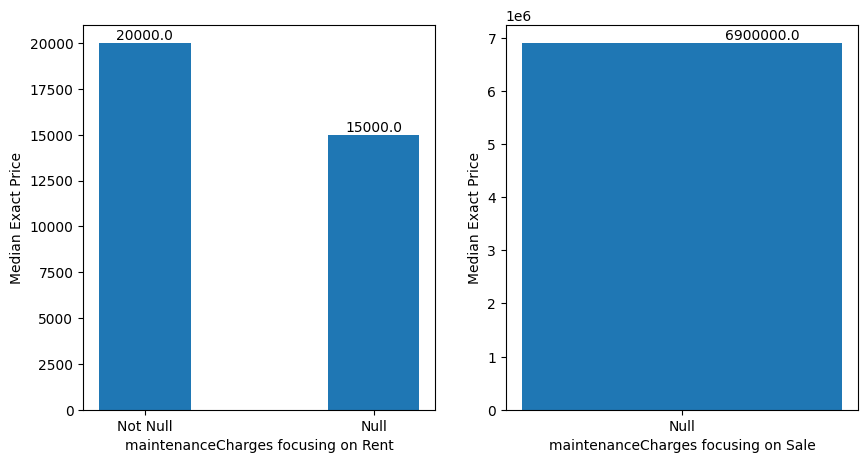

locality 8.05  % missing values


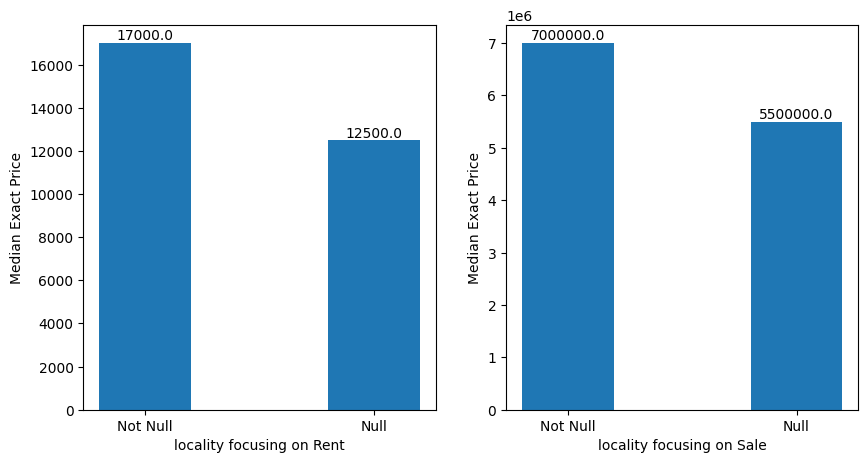

furnishing 2.4299999999999997  % missing values


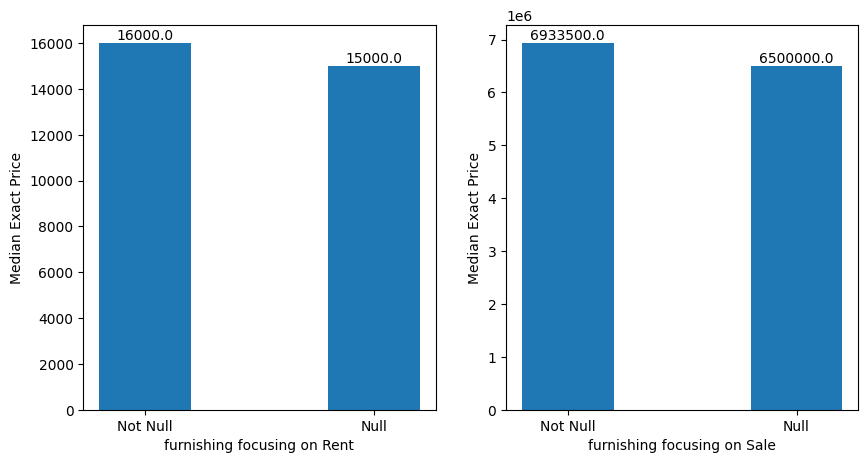

flrNum 24.04  % missing values


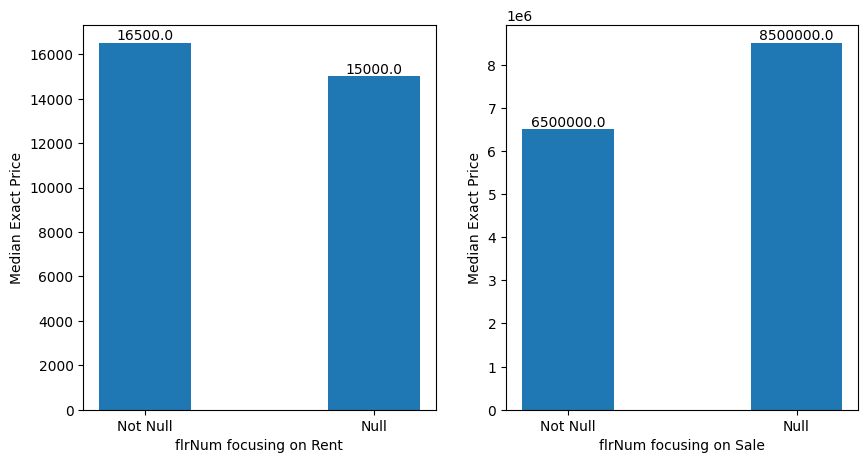

firstMonthCharges 68.19  % missing values


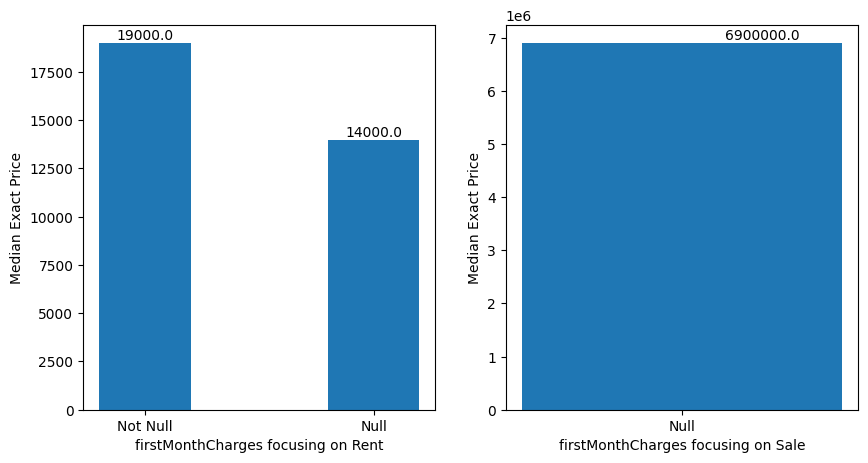

facing 52.449999999999996  % missing values


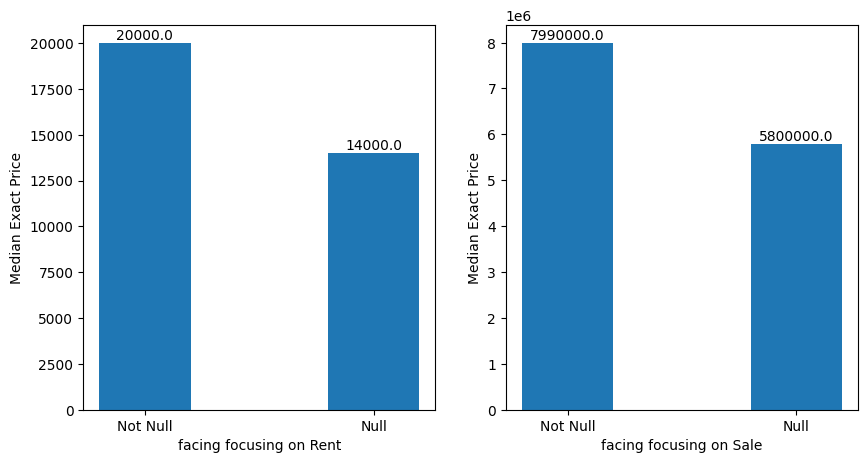

totalFlrNum 8.0  % missing values


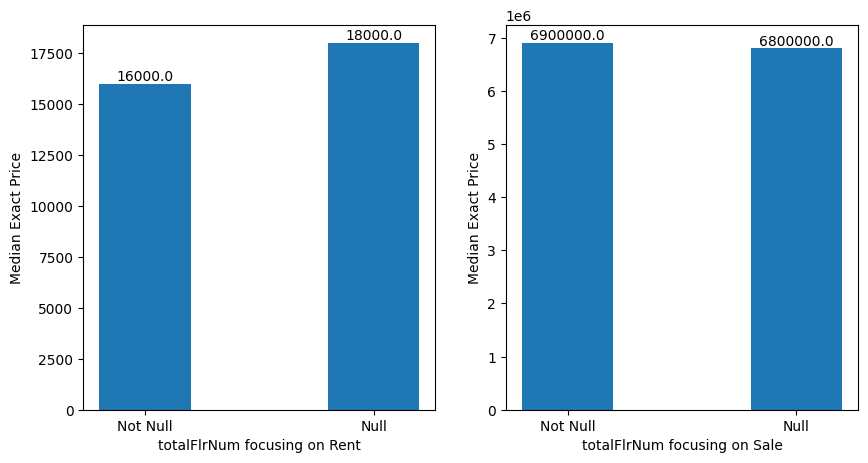

carpetArea 46.33  % missing values


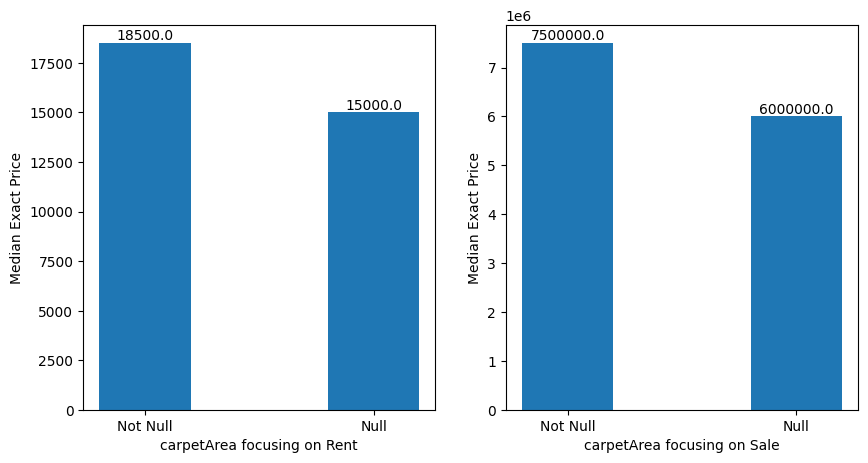

brokerage 79.27  % missing values


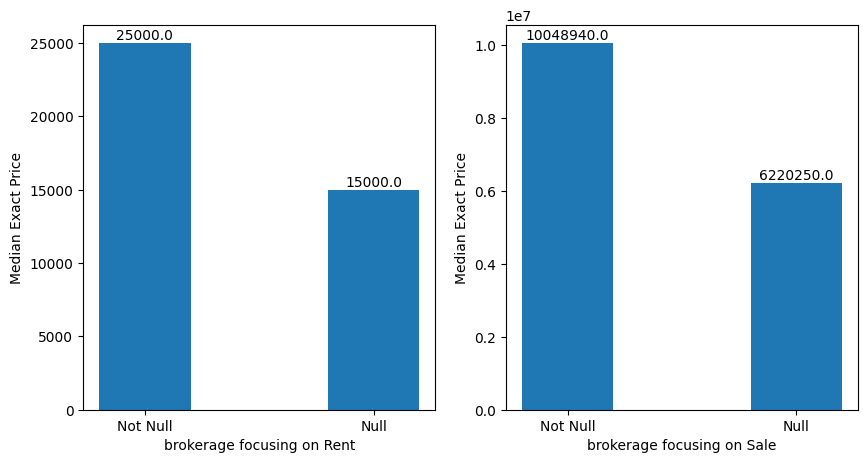

bedrooms 2.11  % missing values


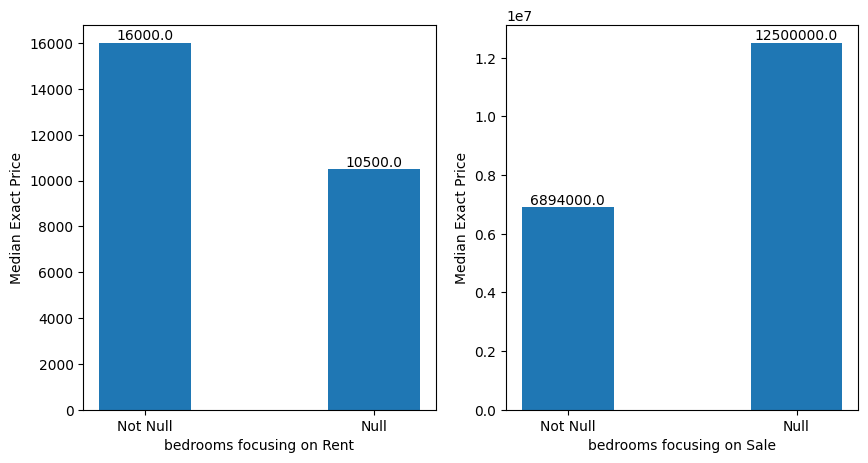

bathrooms 2.6100000000000003  % missing values


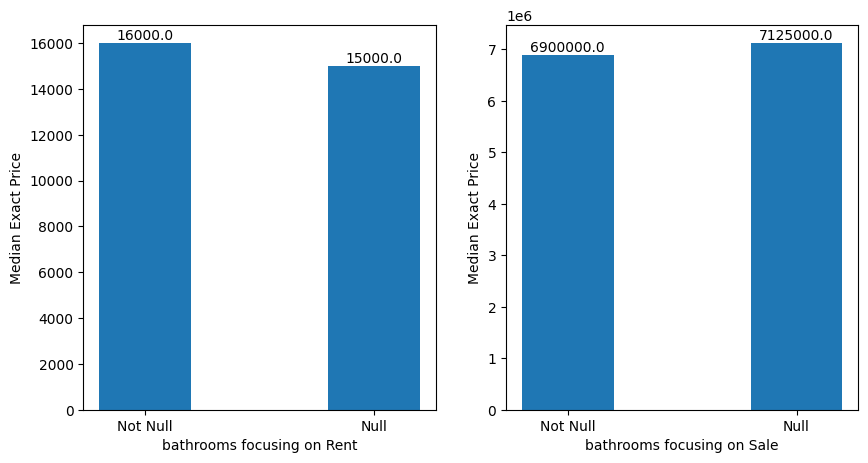

balconies 38.83  % missing values


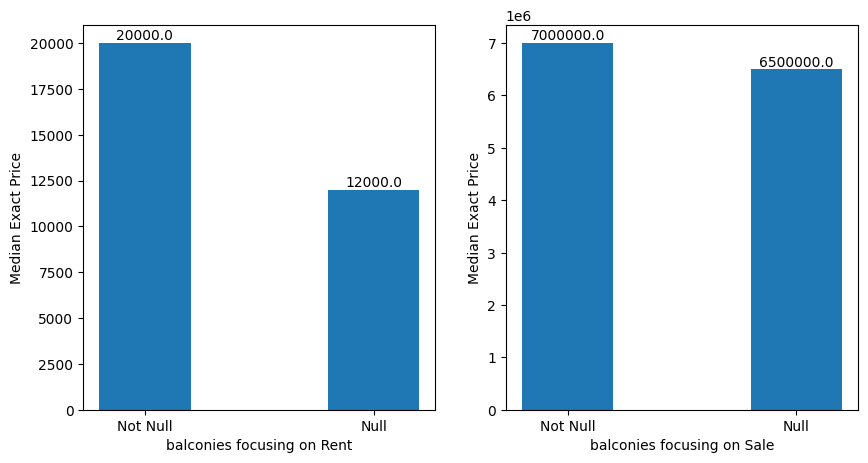

Water_Storage 79.07  % missing values


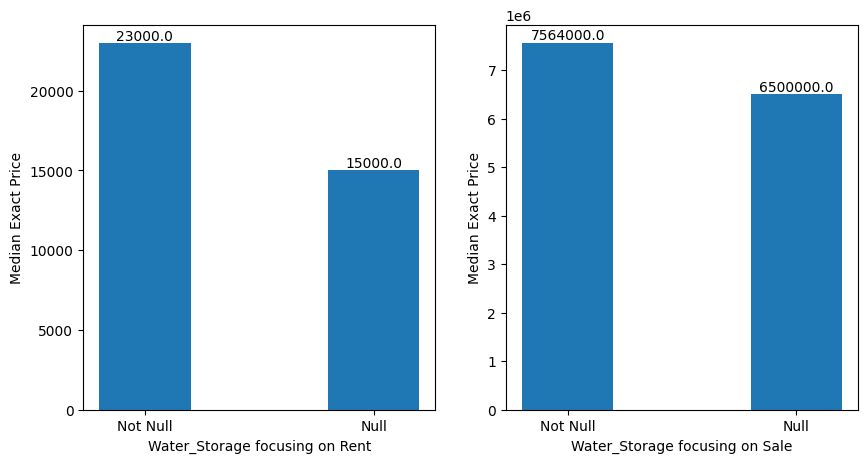

Waste_Disposal 79.07  % missing values


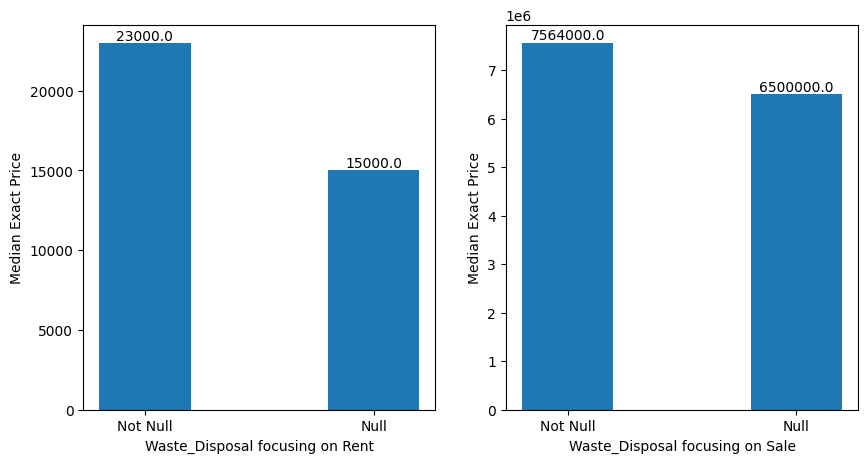

Visitor_Parking 79.07  % missing values


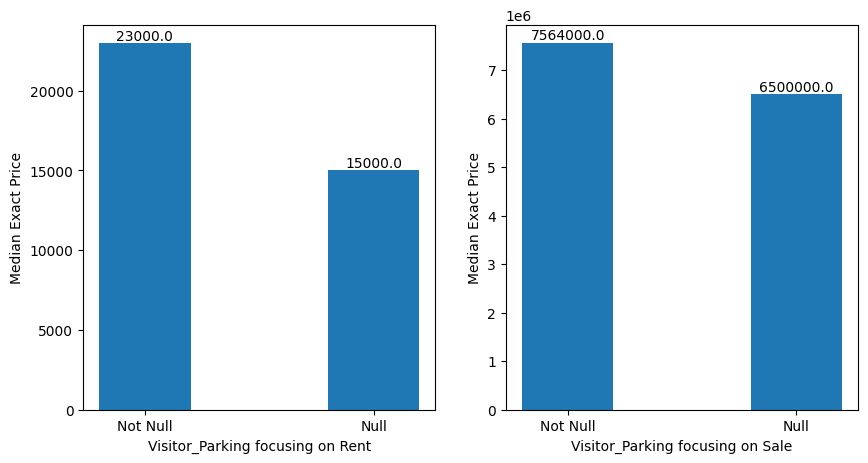

Vaastu_Compliant 79.07  % missing values


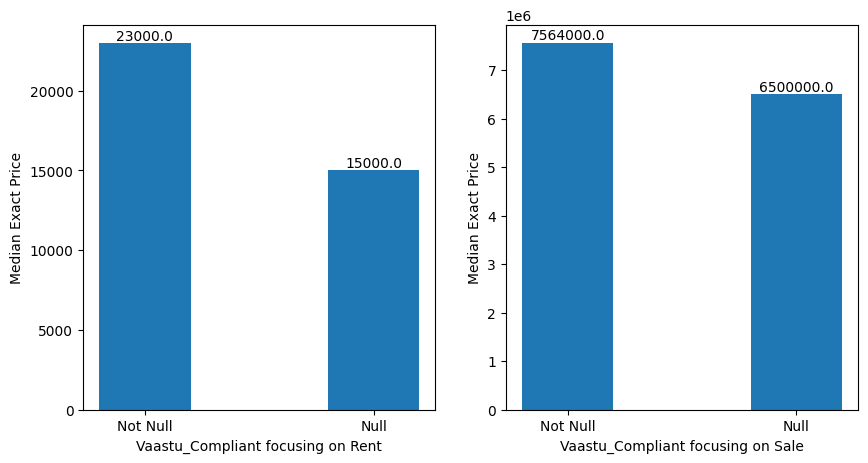

Swimming_Pool 79.07  % missing values


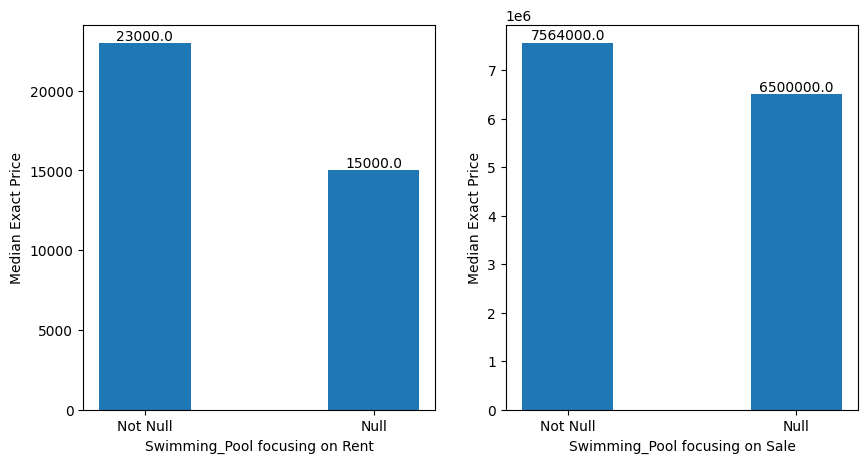

Skydeck 79.07  % missing values


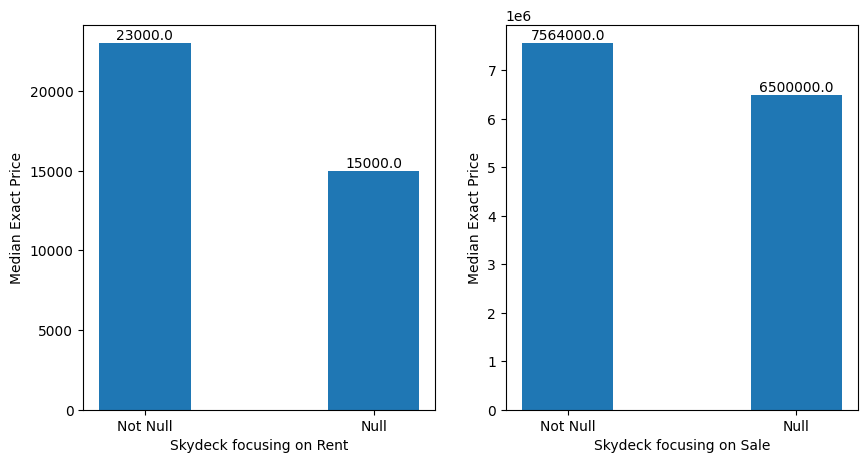

Service_Or_Goods_Lift 79.07  % missing values


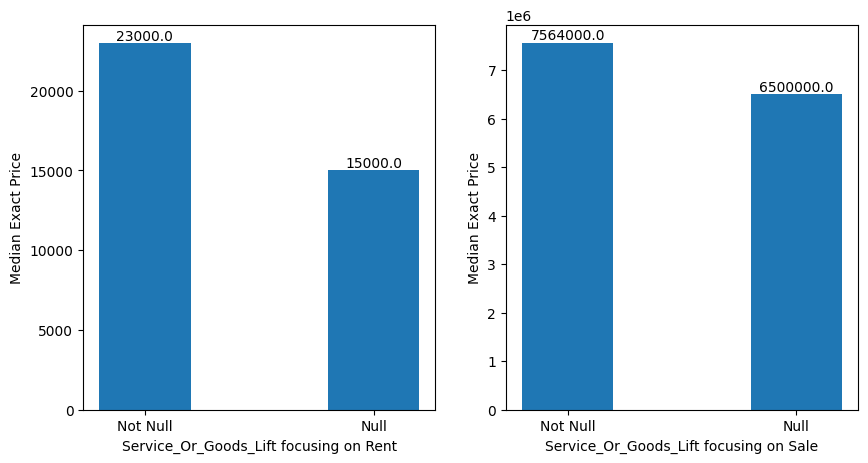

Security 79.07  % missing values


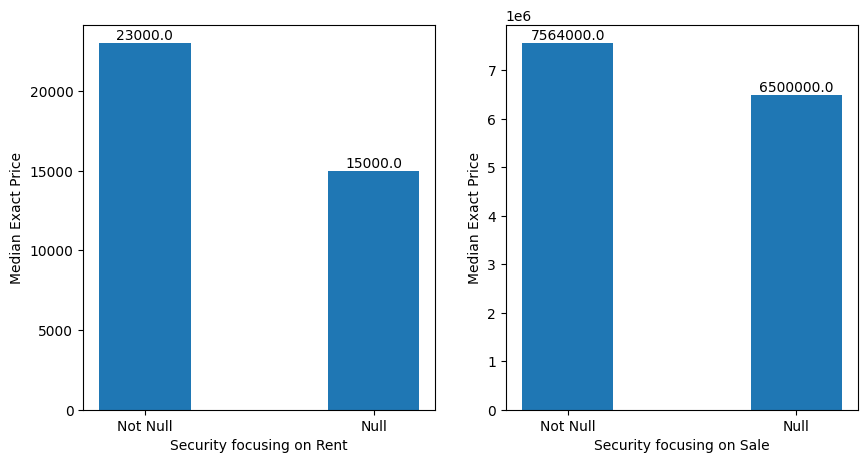

Retail_Boulevard___Retail_Shops__ 79.07  % missing values


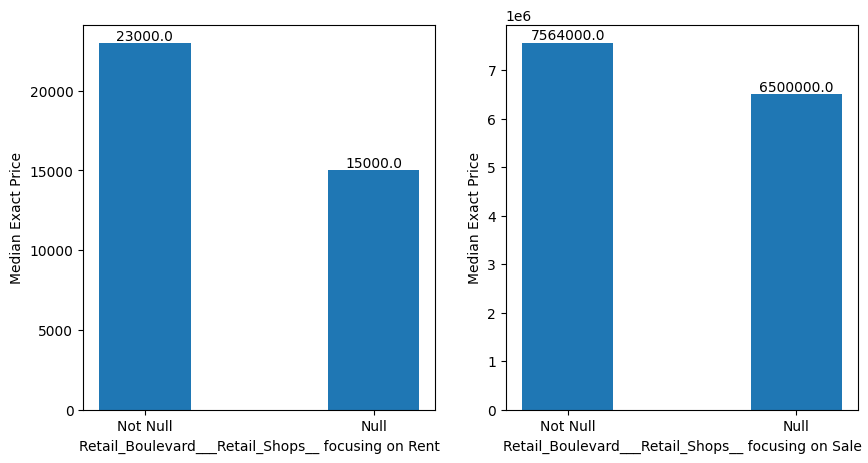

Reserved_Parking 79.07  % missing values


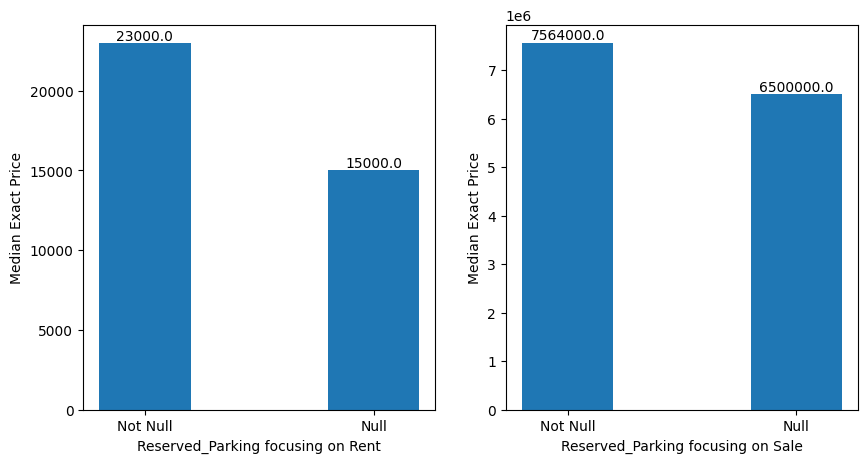

Rentable_Community_Space 79.07  % missing values


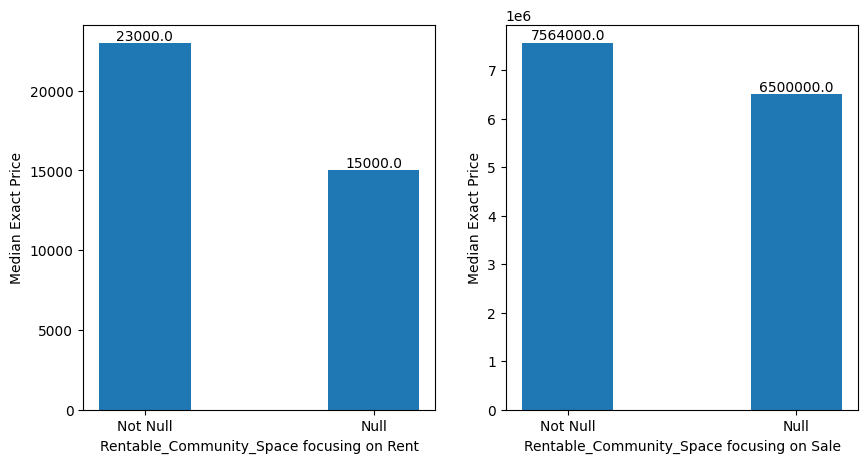

Recreational_Pool 79.07  % missing values


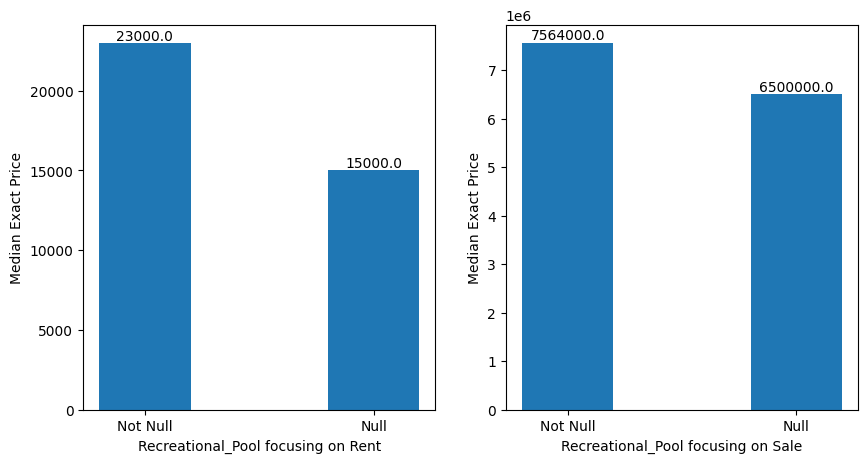

Rain_Water_Harvesting 79.07  % missing values


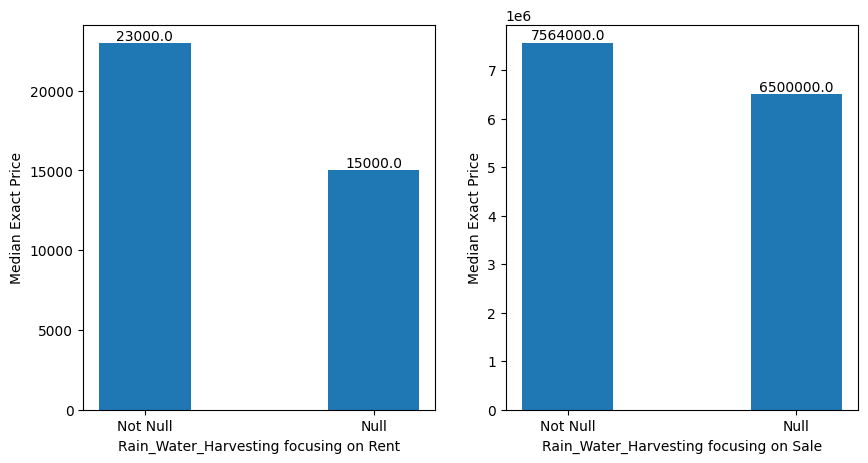

RO_Water_System 79.07  % missing values


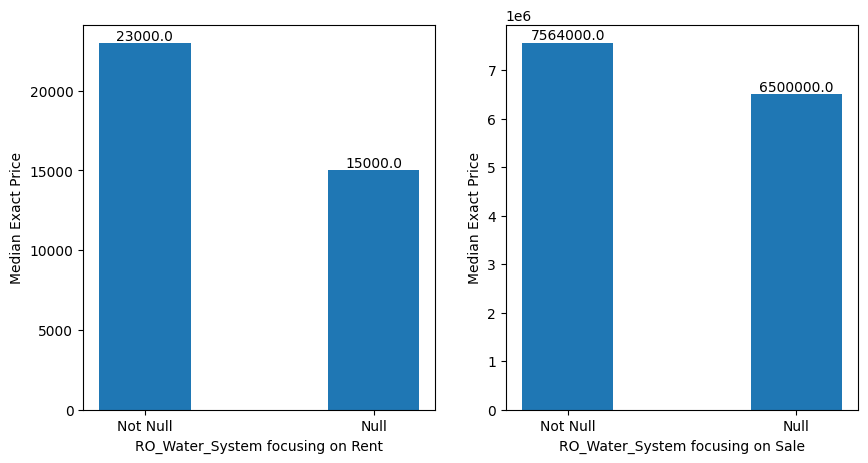

Private_Terrace_Or_Garden 79.07  % missing values


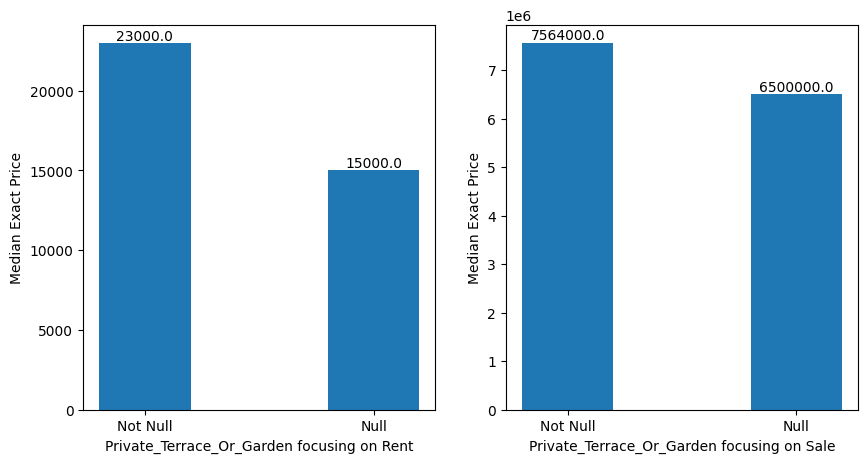

Private_Garden 79.07  % missing values


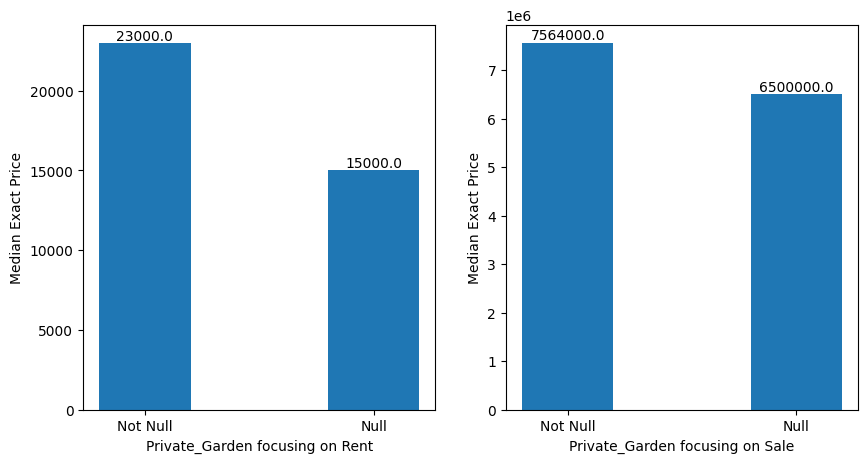

Power_Back_Up 79.07  % missing values


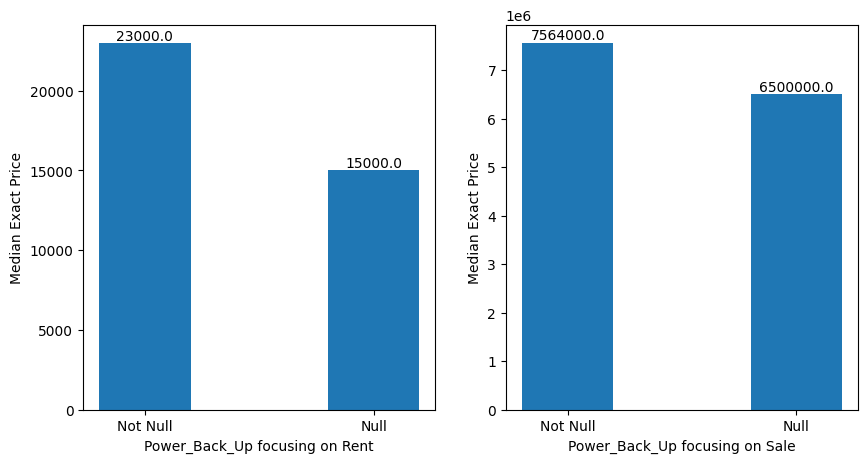

Piped_Gas 79.07  % missing values


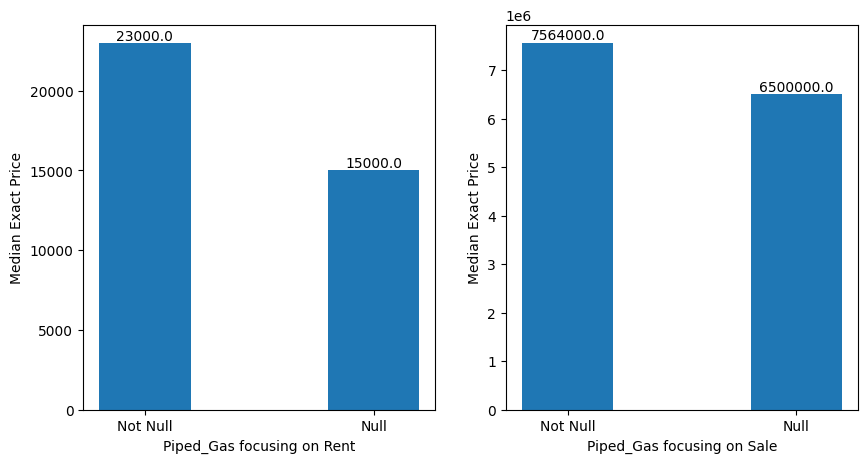

Park 79.07  % missing values


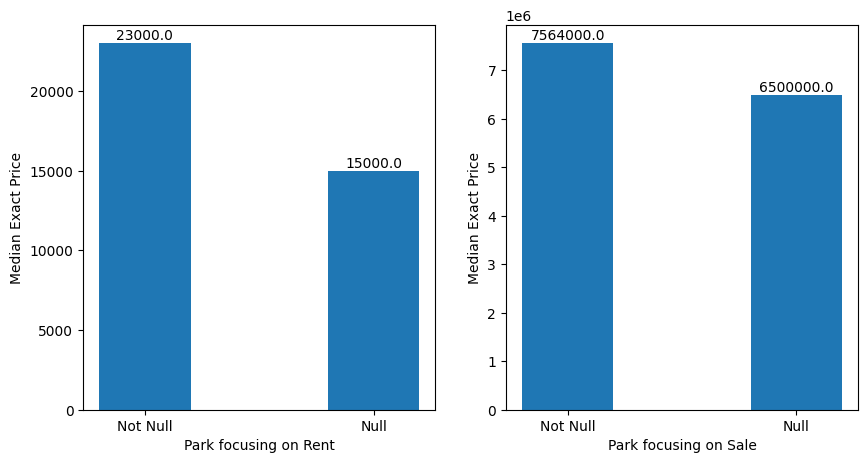

Outdoor_Tennis_Courts 79.07  % missing values


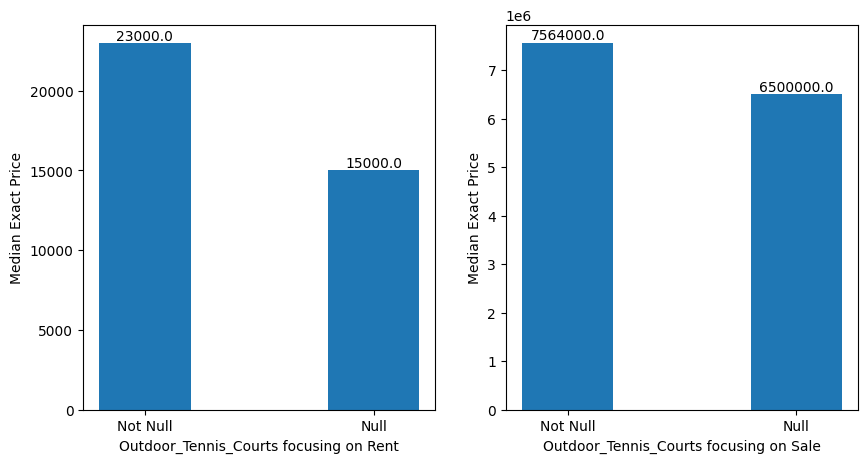

Multipurpose_Hall 79.07  % missing values


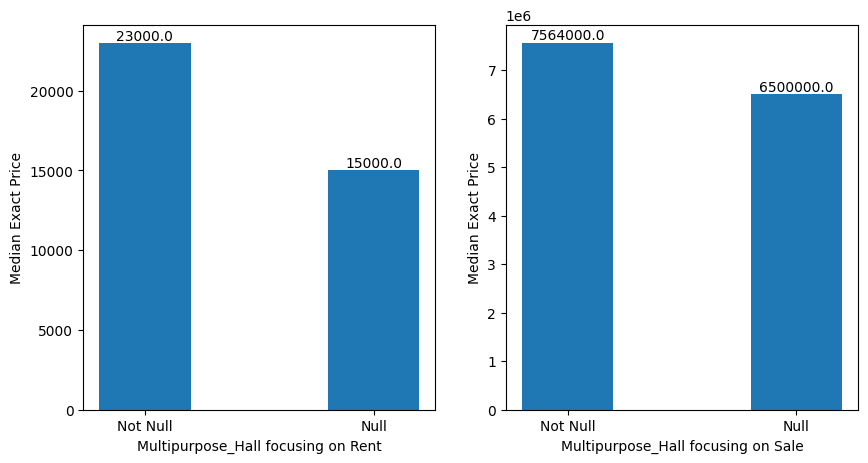

Multipurpose_Courts 79.07  % missing values


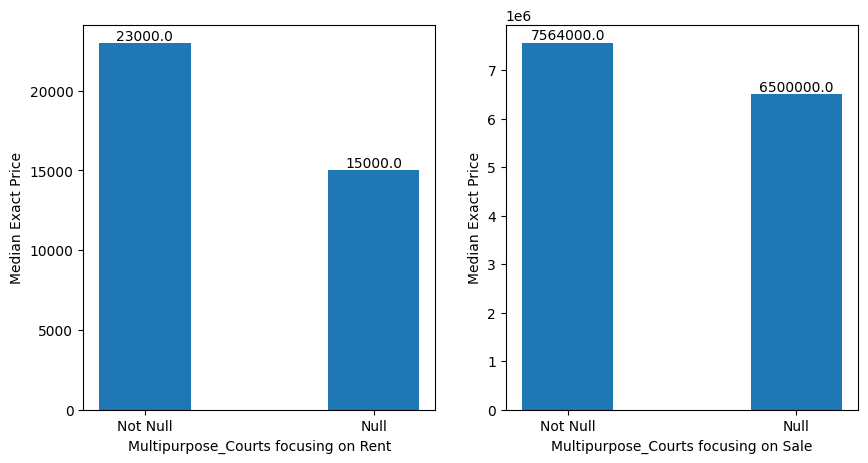

Mini_Cinema_Theatre 79.07  % missing values


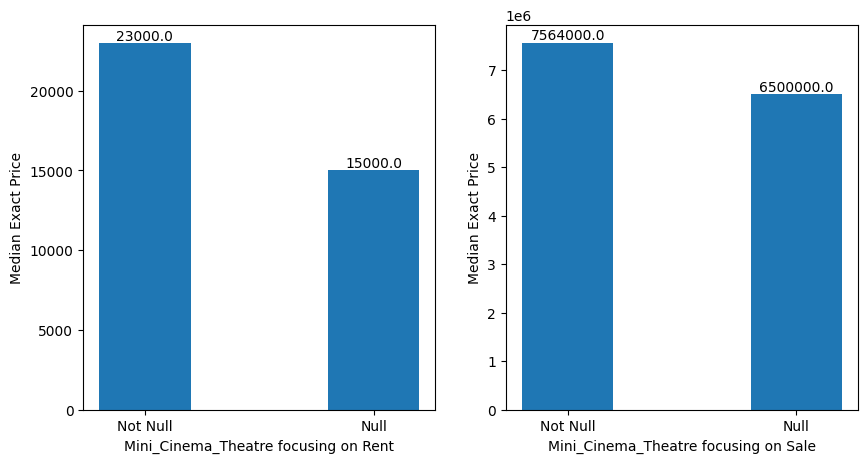

Meditation_Area 79.07  % missing values


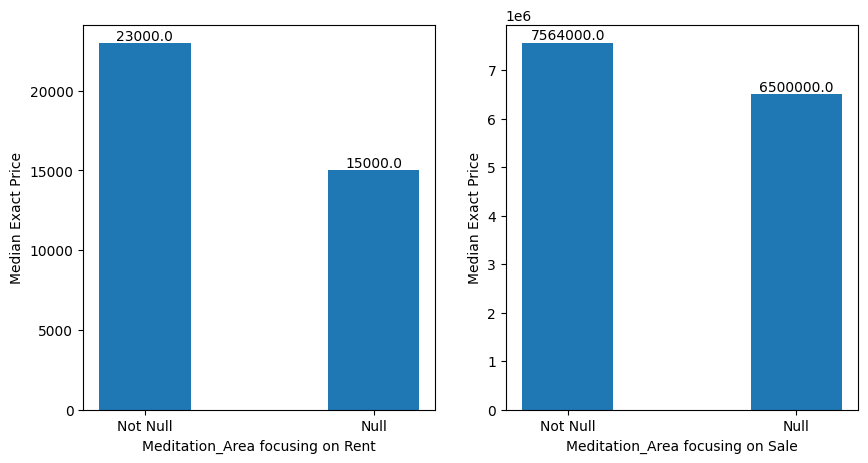

Maintenance_Staff 79.07  % missing values


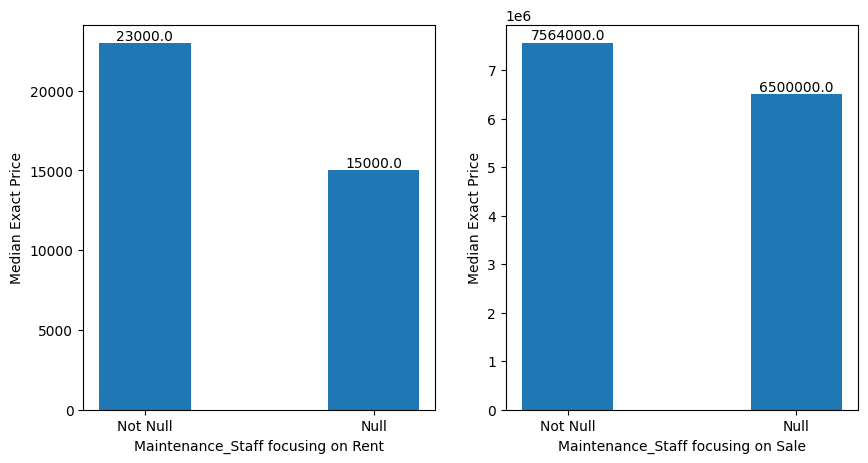

Long 7.7700000000000005  % missing values


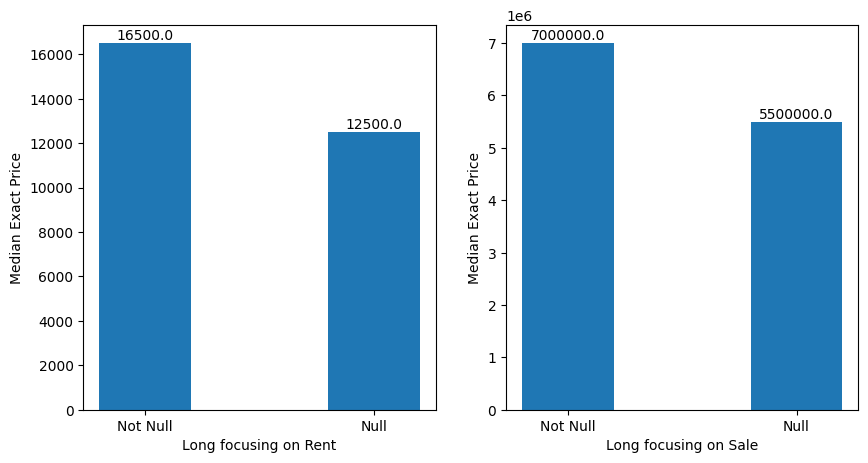

Lift 79.07  % missing values


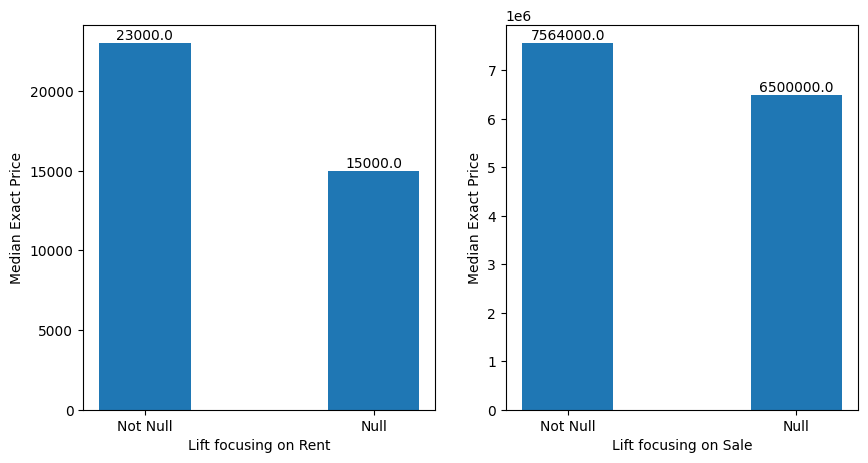

Library_And_Business_Centre 79.07  % missing values


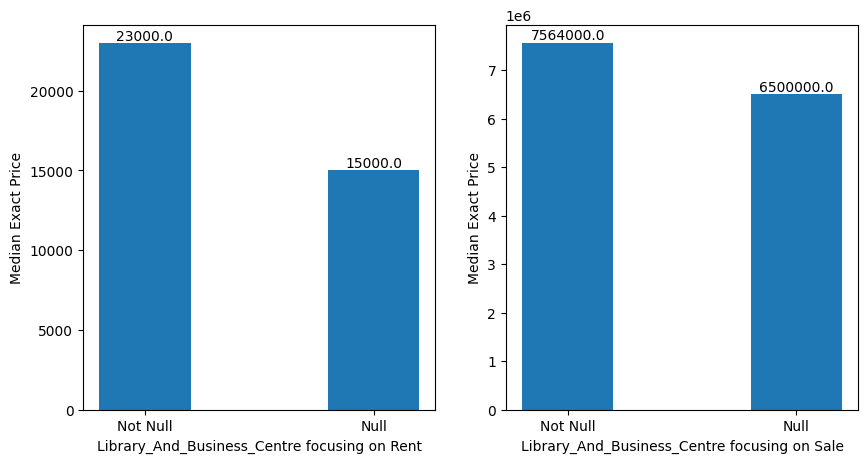

Library 79.07  % missing values


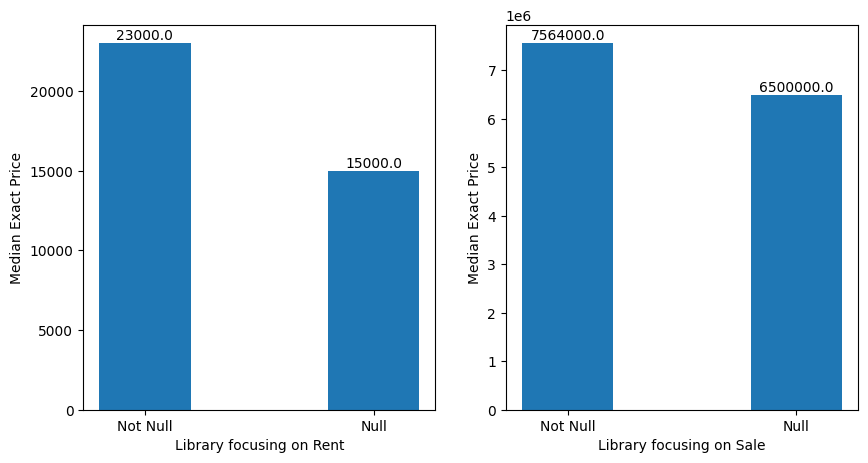

Laundry_Service 79.07  % missing values


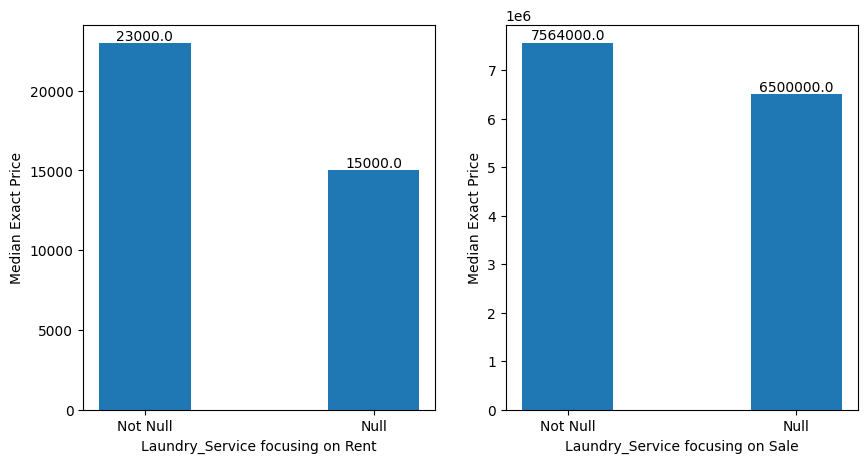

Lat 7.7700000000000005  % missing values


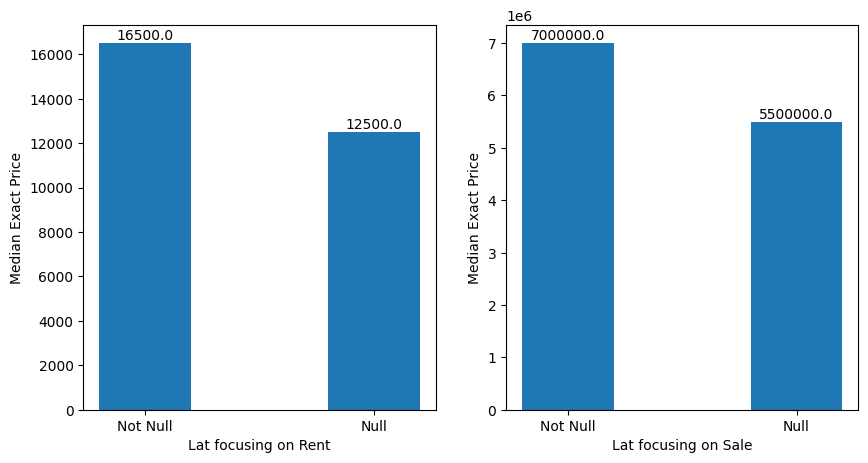

Kids_Play_Pool_With_Water_Slides 79.07  % missing values


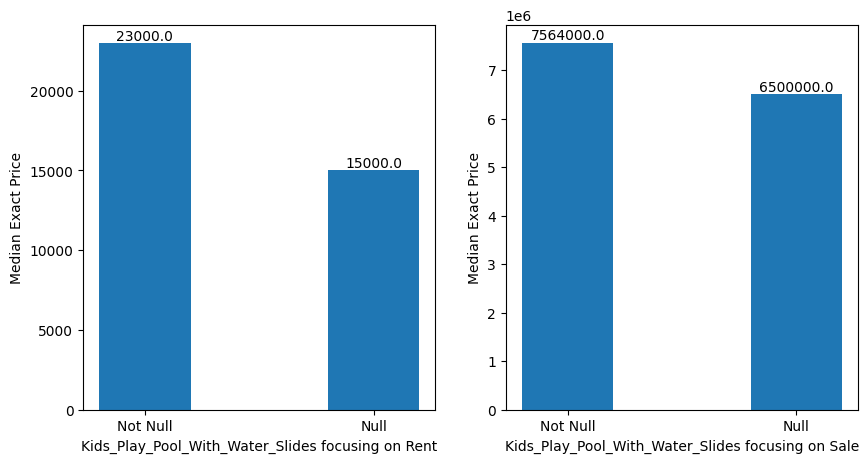

Kids_Play_Area 79.07  % missing values


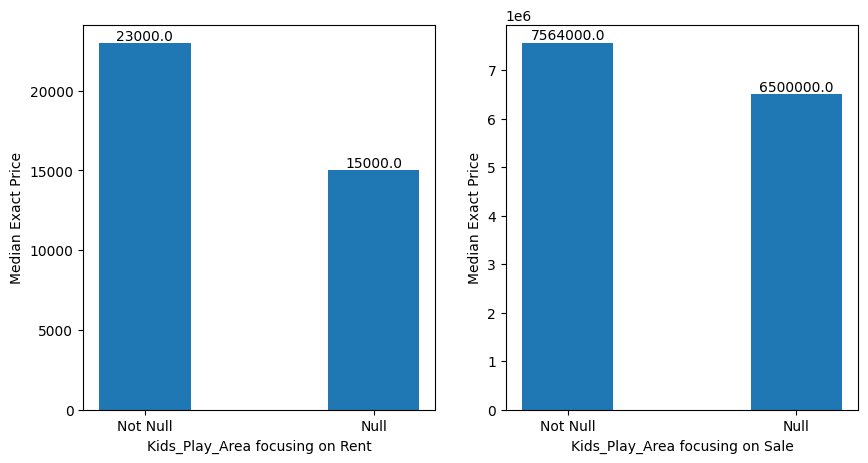

Kids_Club 79.07  % missing values


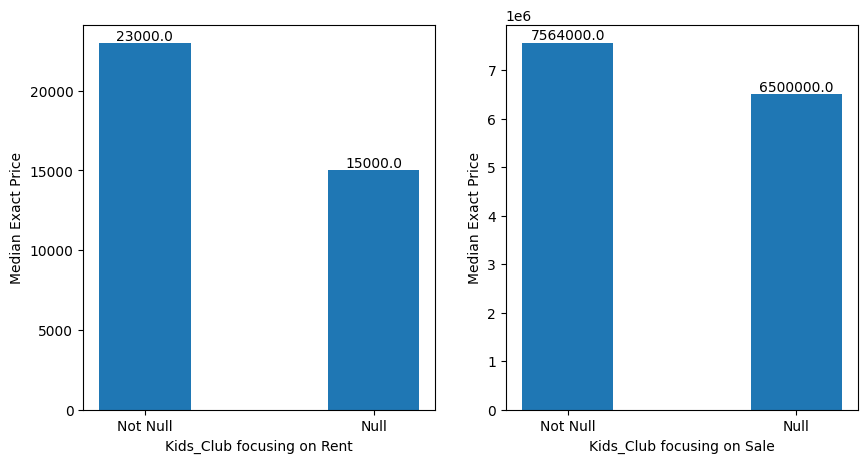

Jogging_and_Strolling_Track 79.07  % missing values


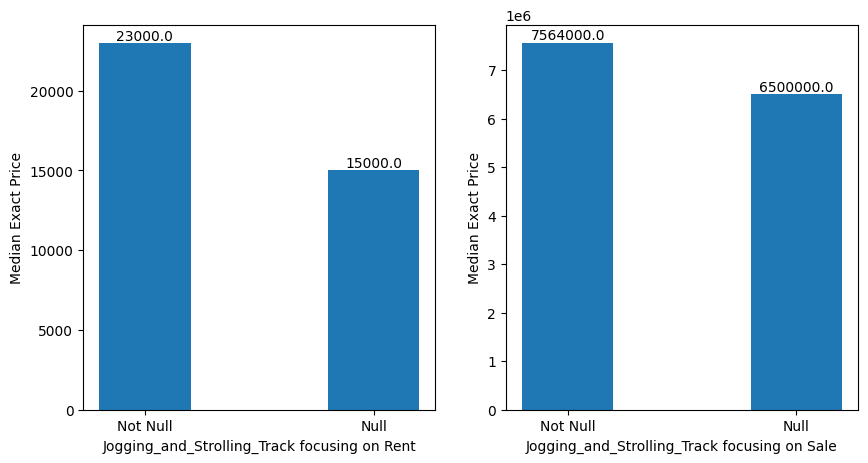

Internet_Or_Wi_Fi_Connectivity 79.07  % missing values


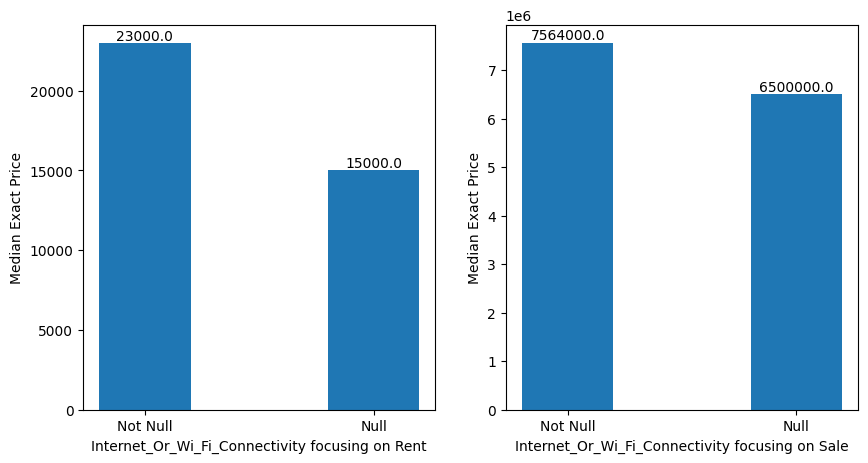

Intercom_Facility 79.07  % missing values


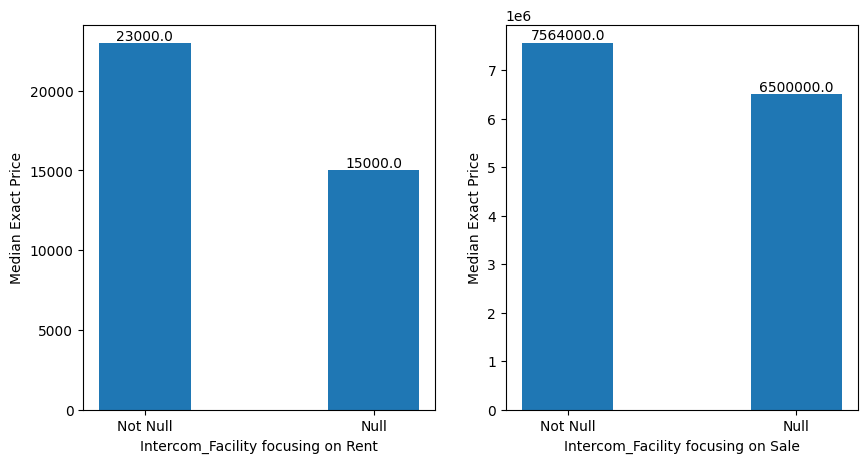

Indoor_Squash__And__Badminton_Courts 79.07  % missing values


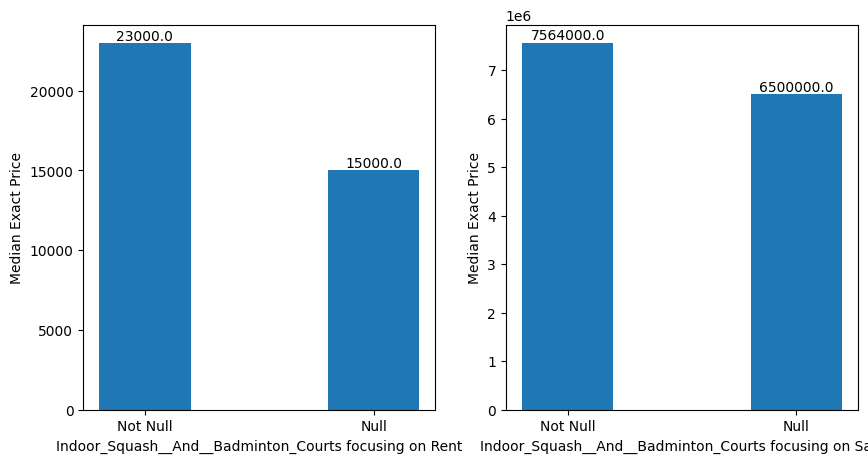

Indoor_Games_Room 79.07  % missing values


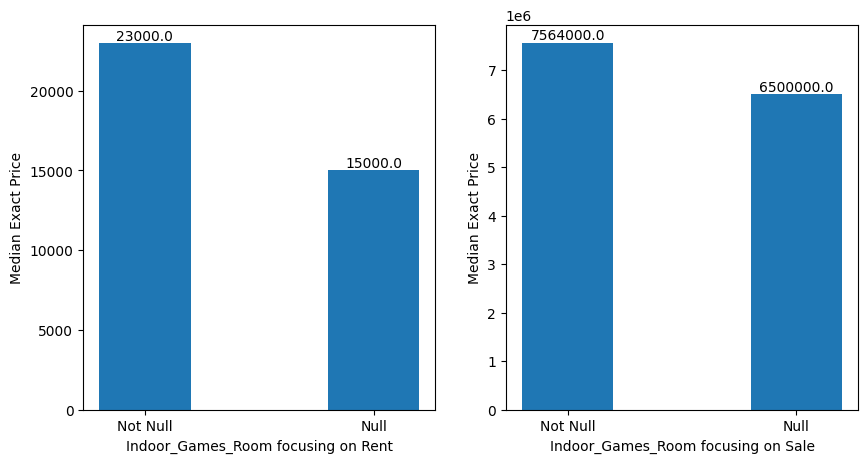

Health_club_with_Steam__Or__Jaccuzi 79.07  % missing values


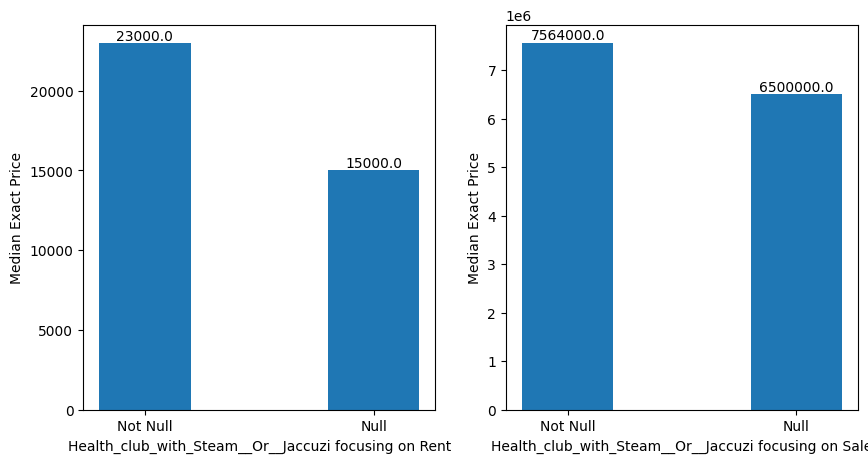

Gymnasium 79.07  % missing values


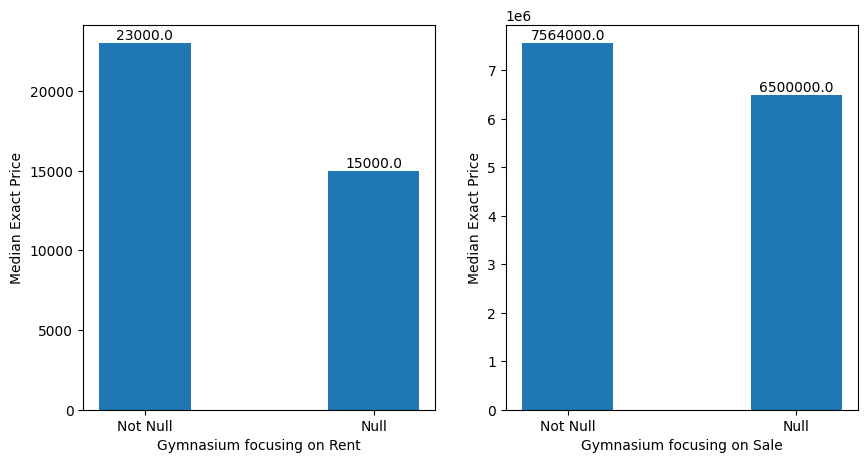

Guest_Accommodation 79.07  % missing values


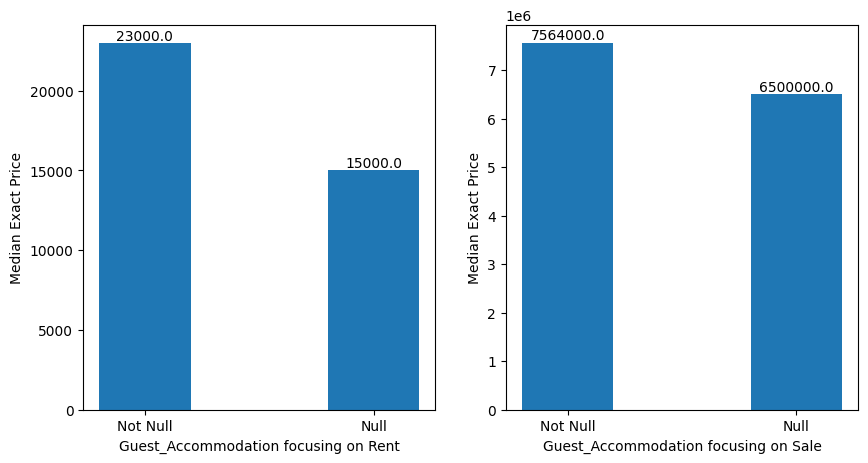

Grand_Entrance_lobby 79.07  % missing values


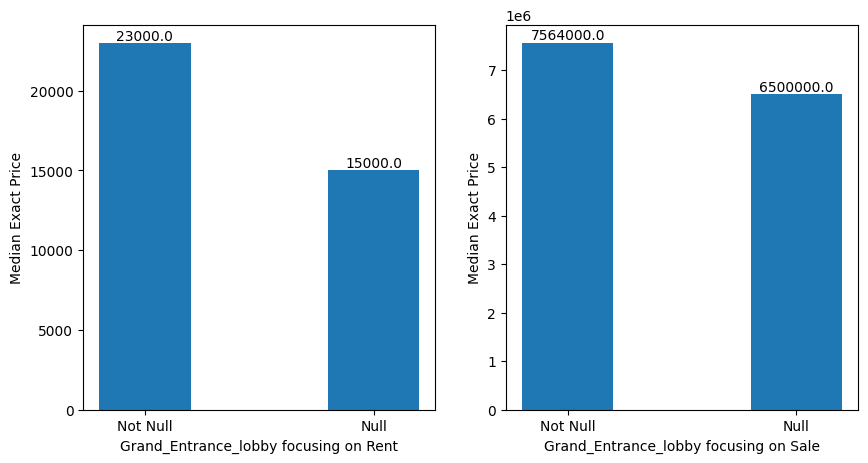

Golf_Course 79.07  % missing values


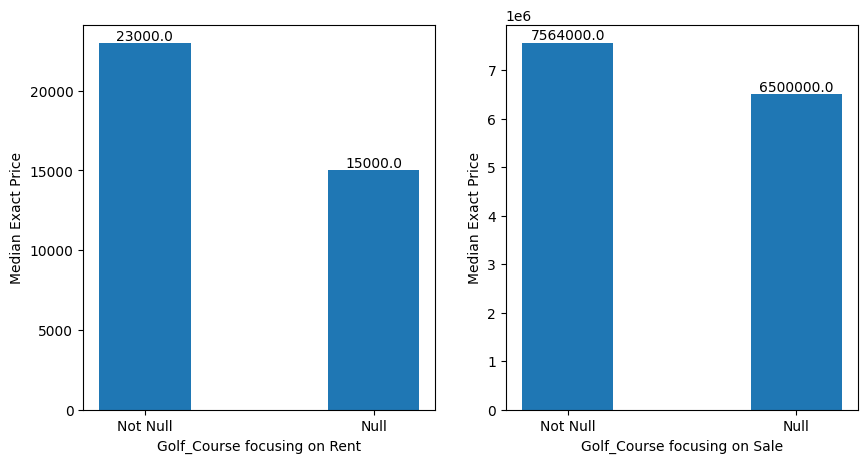

Flower_Gardens 79.07  % missing values


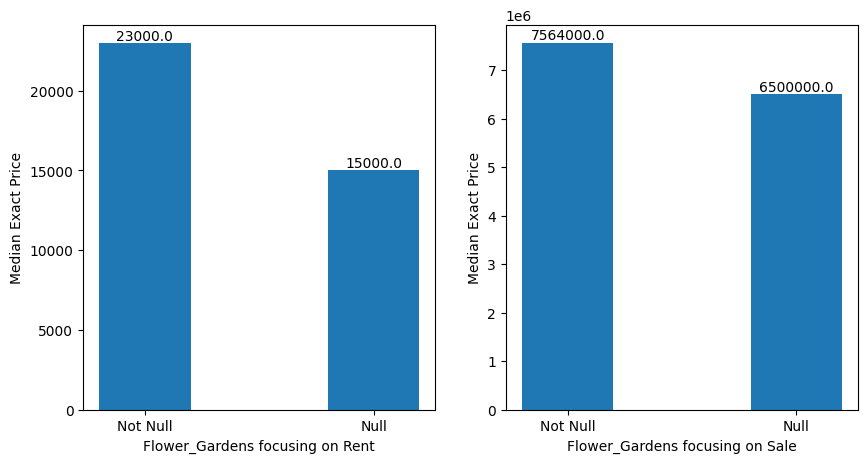

Fire_Fighting_Equipment 79.07  % missing values


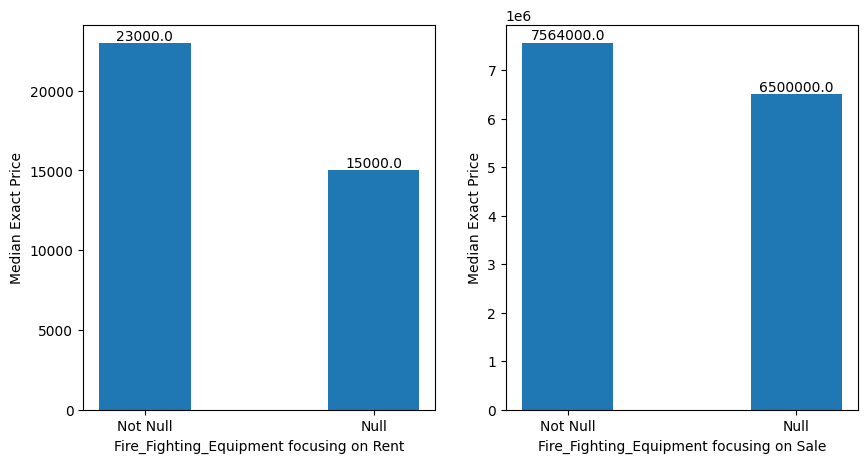

Event_Space__And__Amphitheatre 79.07  % missing values


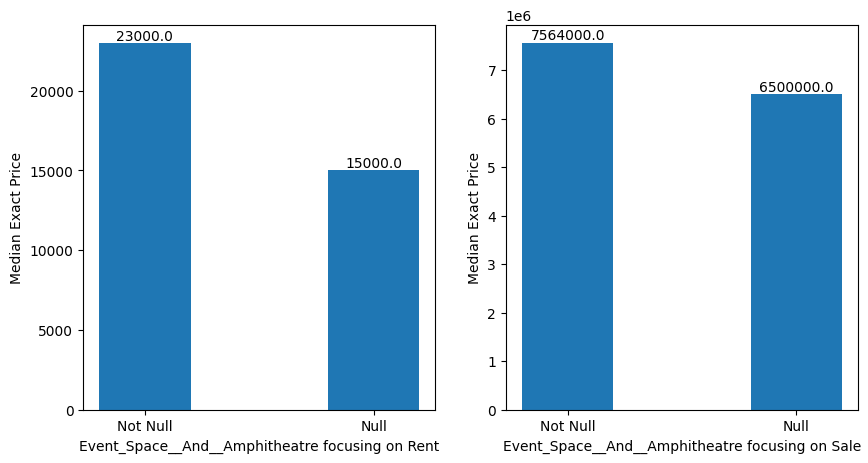

Earth_quake_resistant 79.07  % missing values


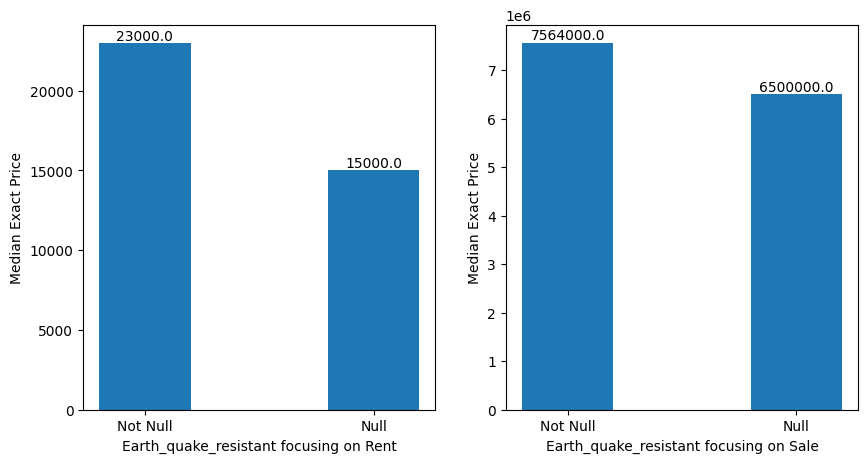

Early_Learning_Centre 79.07  % missing values


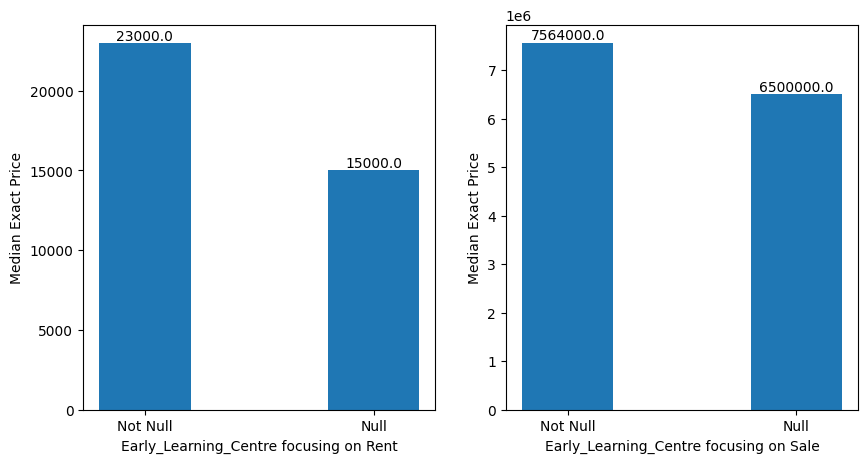

Dance_Studio 79.07  % missing values


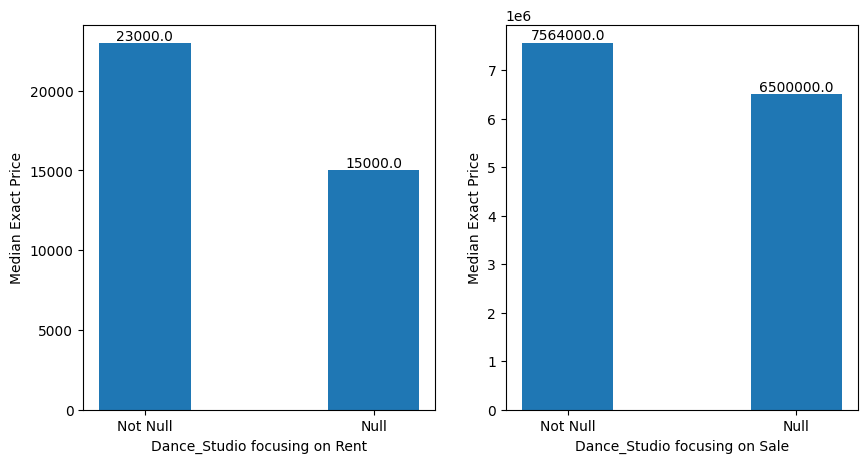

DTH_Television_Facility 79.07  % missing values


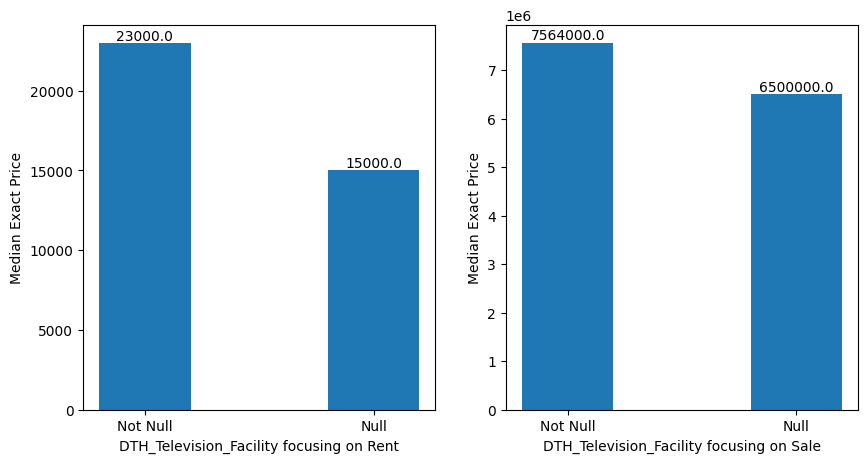

Cycling__And__Jogging_Track 79.07  % missing values


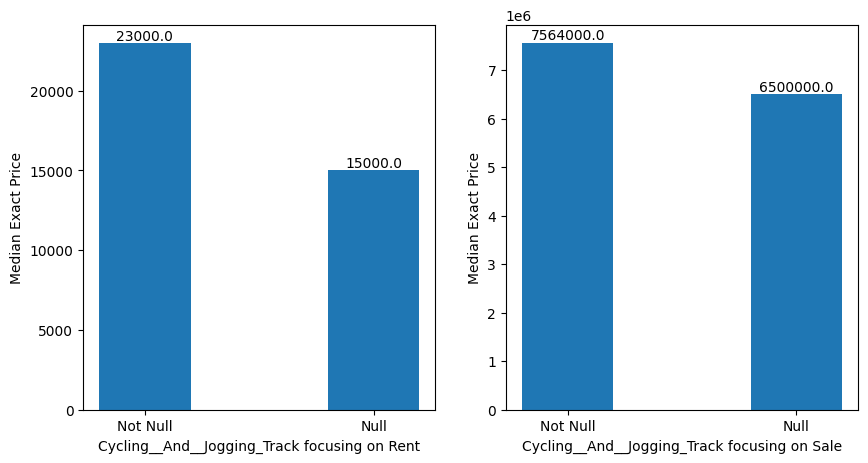

Cricket_net_practice 79.07  % missing values


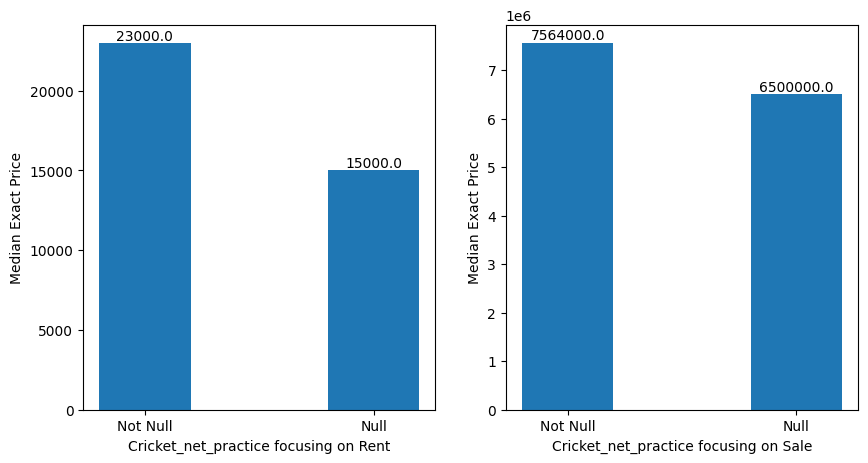

Conference_Room 79.07  % missing values


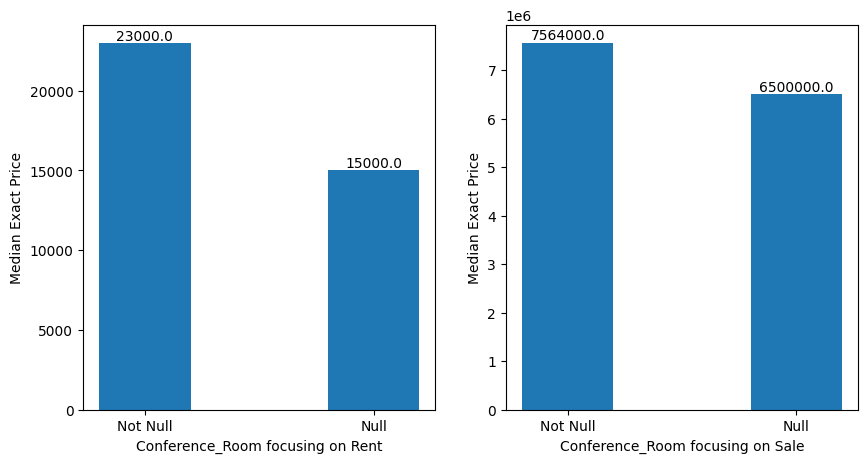

Concierge_Services 79.07  % missing values


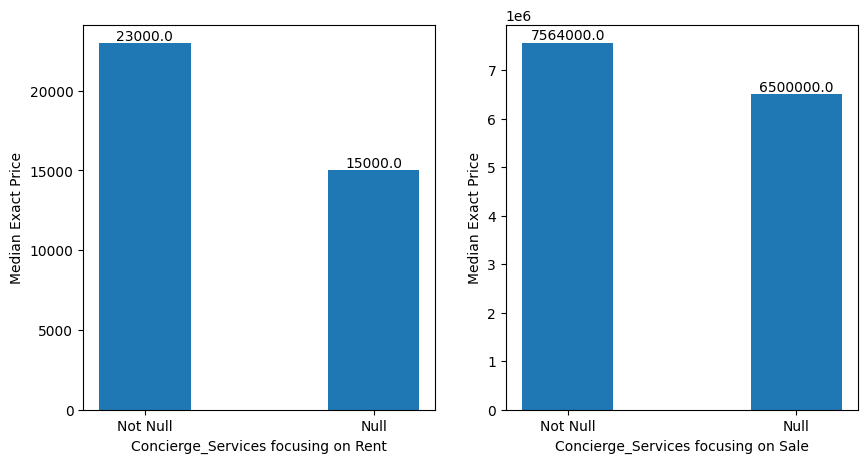

Coffee_Lounge__And__Restaurants 79.07  % missing values


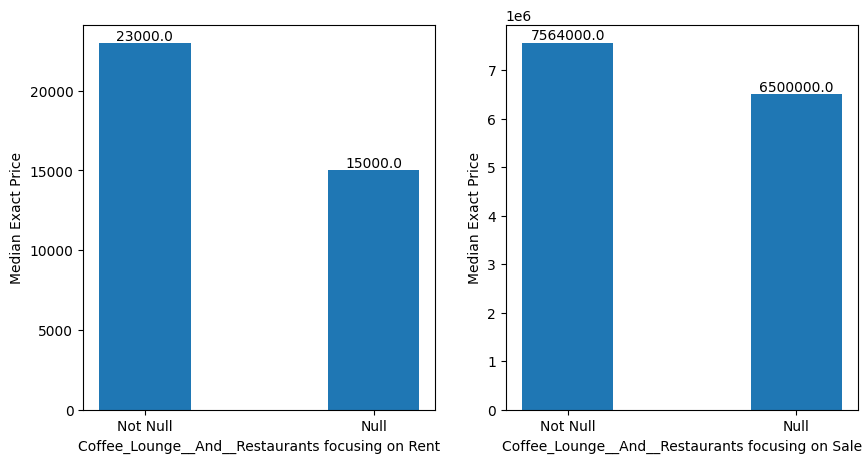

Club_House 79.07  % missing values


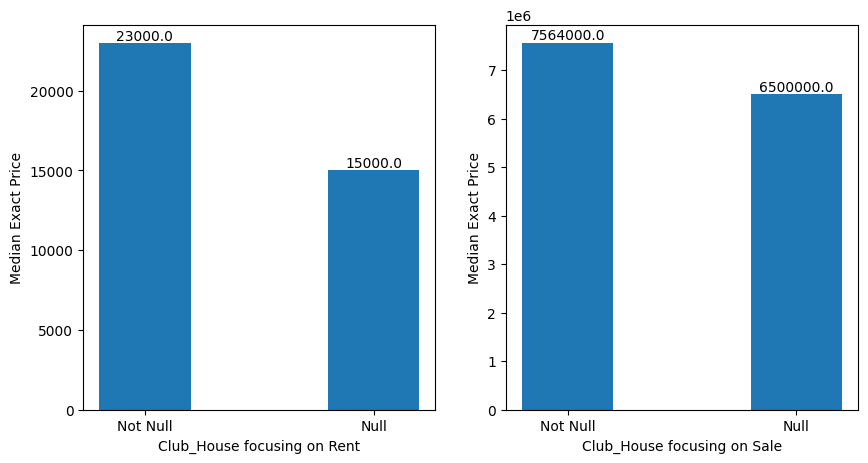

Canopy_Walk 79.07  % missing values


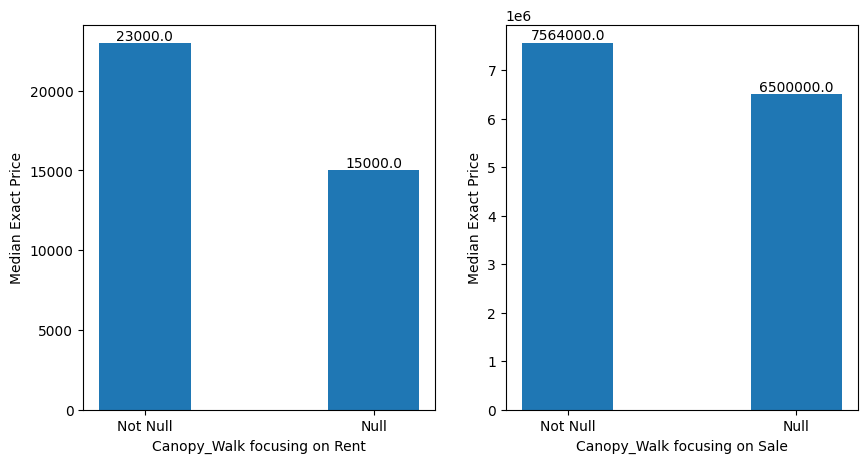

Cafeteria_Or_Food_Court 79.07  % missing values


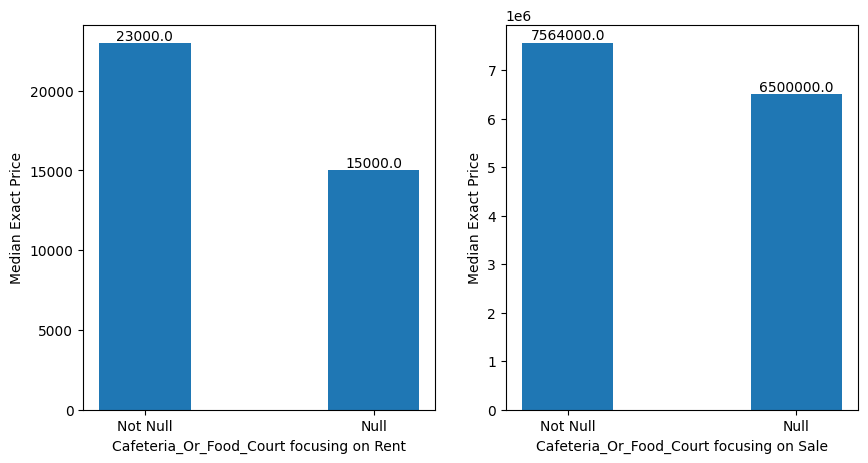

CCTV_Camera 79.07  % missing values


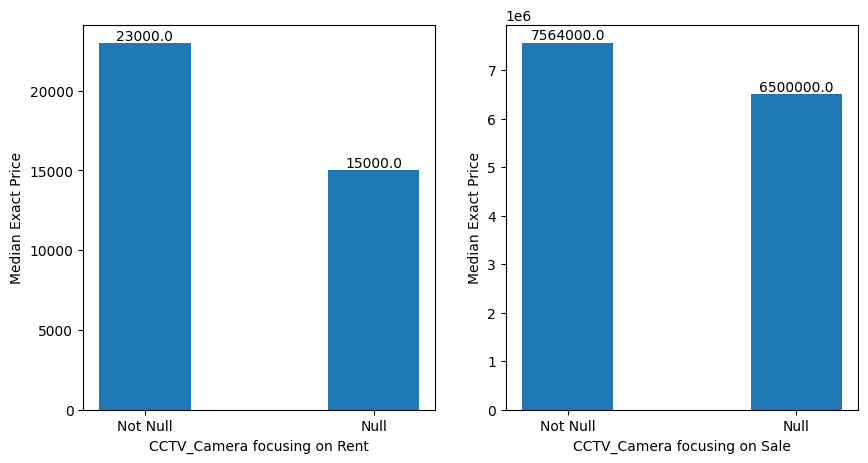

Barbeque_Pit 79.07  % missing values


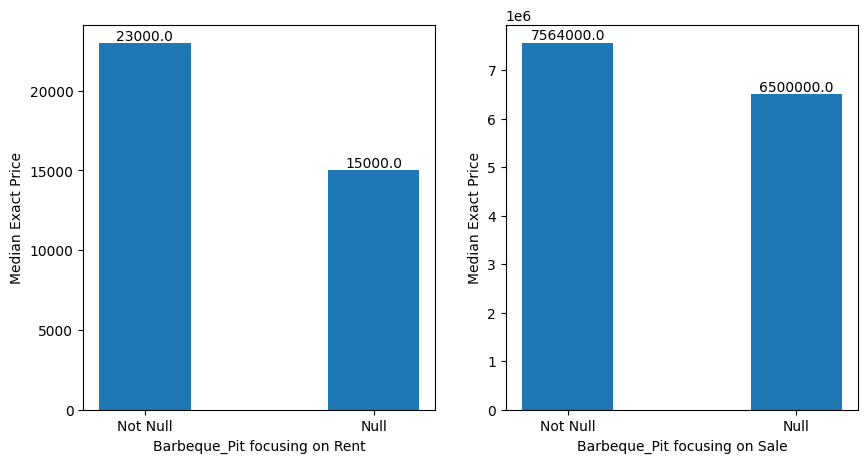

Bar_Or_Lounge 79.07  % missing values


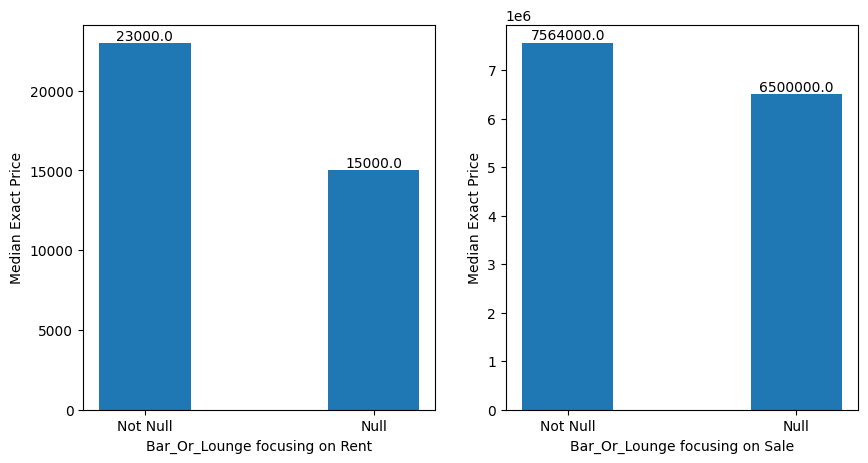

Banquet_Hall 79.07  % missing values


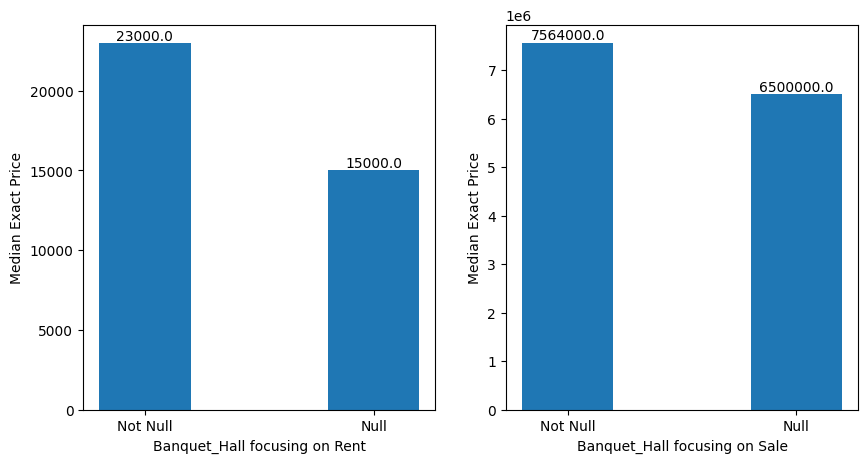

Bank__And__ATM 79.07  % missing values


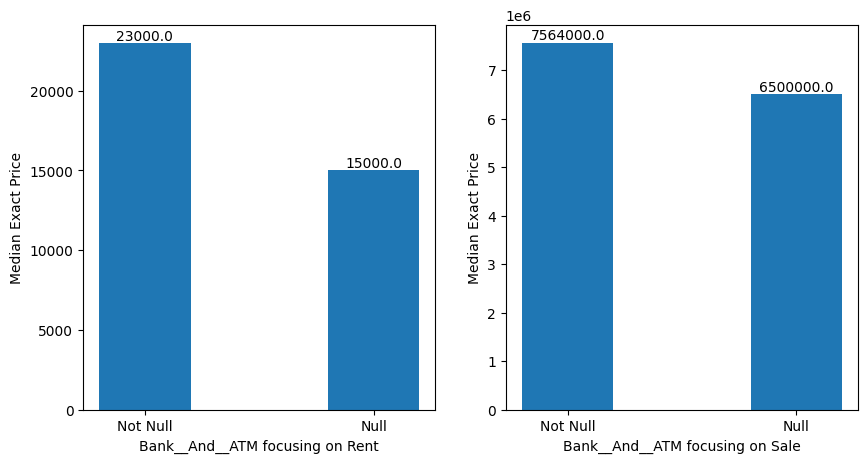

Arts__And__Craft_Studio 79.07  % missing values


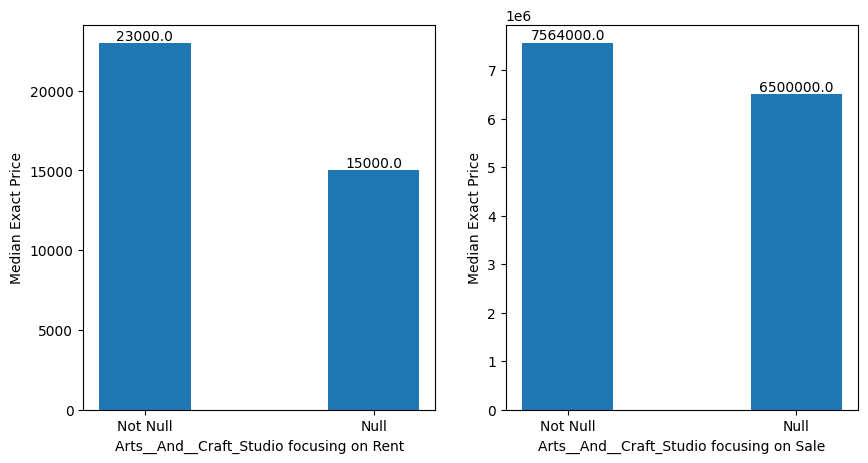

Air_Conditioned 79.07  % missing values


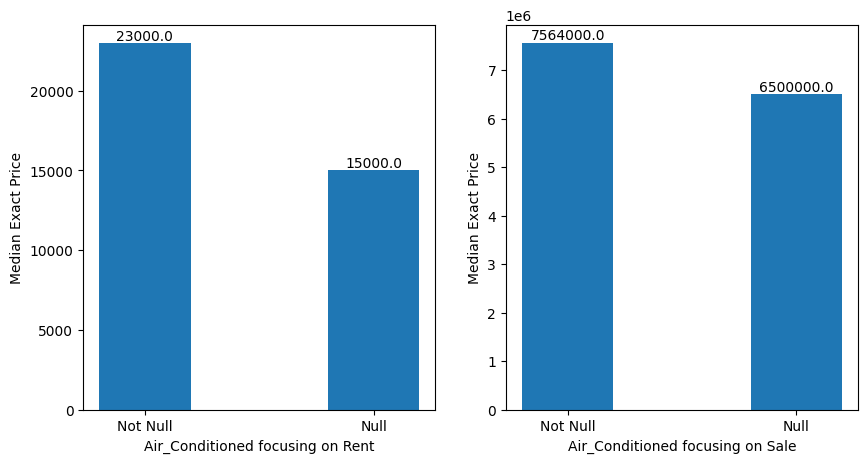

Activity_Deck4 79.07  % missing values


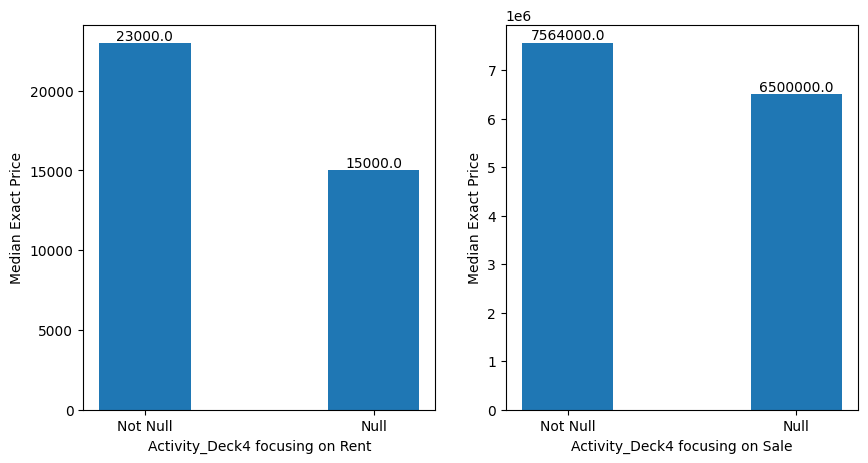

AEROBICS_ROOM 79.07  % missing values


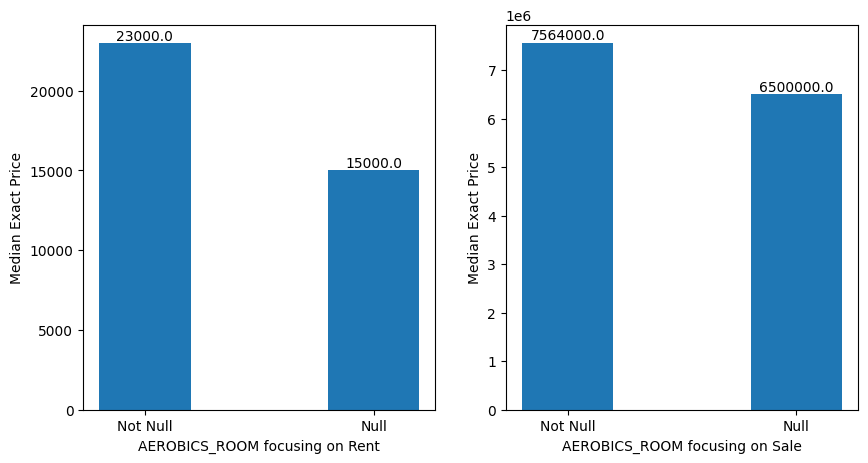

In [95]:
for feature in features_with_na:
    data = dataset.copy()

    data[feature] = np.where(data[feature].isnull(), 1, 0)
    print(feature, (np.round(Main_dataset[feature].isnull().mean(), 4)*100),  ' % missing values')

    bar_width = 0.4
    # grouped_data = data.groupby(feature)['exactPrice'].median()

    # Create a multibar plot
    category_data_rent = data[data['RentOrSale'] == "Rent"]

    category_data_sale = data[data['RentOrSale'] == "Sale"]

    dict = {0 :"Not Null", 1 :"Null"}

    def keys(x):
        key = dict[x]
        return key
    
    ### Rent subplot
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    median_values = category_data_rent.groupby(feature)['exactPrice'].median()

    # since here 0 represents Not Null values and 1 represents Null values
    LIST = list(median_values.index)
    x = list(map(keys,LIST))

    if len(x) == 1:
        bar_width = 4
        if x == ["Null"]:
            impFea.add(feature)
    else:
         if median_values[1] > median_values[0]:
              impFea.add(feature)
    
    plt.bar(x, median_values, width=bar_width, label="Rent")

    for i,val in enumerate(LIST):
        plt.text(val,median_values[val],median_values[val],ha = "center", va = "bottom")

    str = f"{feature} focusing on Rent"
    plt.xlabel(str)
    plt.ylabel('Median Exact Price')


    ### Sale subplot
    plt.subplot(1,2,2)
    bar_width = 0.4
    median_values = category_data_sale.groupby(feature)['exactPrice'].median()
   
    # since here 0 represents Not Null values and 1 represents Null values
    LIST = list(median_values.index)
    x = list(map(keys,LIST))

    if len(x) == 1:
        bar_width = 4
        if x == ["Null"]:
            impFea.add(feature)


    else:
         if median_values[1] > median_values[0]:
              impFea.add(feature)

    plt.bar(x, median_values, width=bar_width, label="Sale")

    
    for i,val in enumerate(LIST):
        plt.text(val,median_values[val],median_values[val],ha = "center", va = "bottom")

    str = f"{feature} focusing on Sale"
    plt.xlabel(str)
    plt.ylabel('Median Exact Price')

    

    # Show the plot
    plt.show()
    

In [96]:
#  We got the important features
impFea

{'bathrooms',
 'bedrooms',
 'firstMonthCharges',
 'flrNum',
 'maintenanceCharges',
 'securityDeposit',
 'sqftPrice',
 'totalFlrNum'}

#### Using the postedOn feature to make new feature postedOn_DaysAgo, to represent how long ago the property was poster on the website

In [97]:
import datetime

# date_string = "Jun 20, '23"
def date_transform(date):

    date_object = datetime.datetime.strptime(date, "%b %d, '%y")
    formatted_date = datetime.datetime.strftime(date_object,"%Y-%m-%d")
    new_date = datetime.datetime.strptime(formatted_date, "%Y-%m-%d").date()


    current_date = datetime.date.today()
    ab = (current_date - new_date).days
    return ab


date_transform(dataset["postedOn"][10])

591

In [98]:
dataset["postedOn_DaysAgo"] = dataset["postedOn"].apply(date_transform)

In [99]:
dataset

exactPrice  sqftPrice  securityDeposit           propertyType  \
0        240000.0      171.0              NaN  Multistorey Apartment   
1         12000.0       12.0          12000.0  Multistorey Apartment   
2         17000.0        7.0              NaN      Residential House   
3          5000.0        NaN              NaN      Residential House   
4         12000.0        NaN          24000.0  Multistorey Apartment   
...           ...        ...              ...                    ...   
27895  20227500.0     7500.0              NaN  Multistorey Apartment   
27896   6933500.0     4900.0              NaN  Multistorey Apartment   
27897   9000000.0     8182.0              NaN                  Villa   
27898   7645000.0     5500.0              NaN  Multistorey Apartment   
27899  11525400.0     5700.0              NaN  Multistorey Apartment   

          postedOn  noOfLifts maintenanceChargesFrequency  maintenanceCharges  \
0      Jun 20, '23        NaN                         NaN                 NaN   
1      Jun 19, '23        1.0                     Monthly              1500.0   
2      Jun 21, '23        NaN                         NaN                 NaN   
3      Jun 23, '23        NaN                         NaN                 NaN   
4      Jun 24, '23        1.0                     Monthly               500.0   
...            ...        ...                         ...                 ...   
27895  Jul 01, '23        2.0                     Monthly                 NaN   
27896  Jun 30, '23        NaN                         NaN                 NaN   
27897  Jul 02, '23        NaN                         NaN                 NaN   
27898  Jul 01, '23        NaN                         NaN                 NaN   
27899  Jun 30, '23        2.0                     Monthly                 NaN   

                         locality      furnishing  flrNum  firstMonthCharges  \
0                         Danapur  Semi-Furnished       4                NaN   
1                             NaN  Semi-Furnished       4            25500.0   
2           Phase 1 Ashiana Nagar  Semi-Furnished  Ground                NaN   
3                         Kumhrar       Furnished     NaN                NaN   
4                         Kumhrar     Unfurnished       1            36500.0   
...                           ...             ...     ...                ...   
27895                   Dalanwala  Semi-Furnished       1                NaN   
27896                  Canal Road  Semi-Furnished       5                NaN   
27897                  Aman Vihar     Unfurnished     NaN                NaN   
27898          Sahastradhara Road     Unfurnished       4                NaN   
27899  General Mahadev Singh Road  Semi-Furnished       4                NaN   

             facing  totalFlrNum      city  carpetArea     brokerage  \
0               NaN          6.0     Patna         NaN           NaN   
1               NaN          5.0     Patna       900.0           NaN   
2               NaN          2.0     Patna      1300.0           NaN   
3               NaN          3.0     Patna       120.0           NaN   
4              East          5.0     Patna      1200.0           NaN   
...             ...          ...       ...         ...           ...   
27895  North - East          NaN  Dehradun      1850.0            1%   
27896          East          6.0  Dehradun      1415.0           NaN   
27897           NaN          2.0  Dehradun       990.0            2%   
27898         North          8.0  Dehradun         NaN           NaN   
27899  North - East          7.0  Dehradun         NaN  No Brokerage   

       bedrooms  bathrooms  balconies  Water_Storage  Waste_Disposal  \
0           3.0        2.0        NaN            1.0             0.0   
1           2.0        2.0        2.0            NaN             NaN   
2           3.0        3.0        3.0            NaN             NaN   
3           1.0        1.0        NaN            NaN   

In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26692 entries, 0 to 27899
Data columns (total 91 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   exactPrice                            26692 non-null  float64
 1   sqftPrice                             24150 non-null  float64
 2   securityDeposit                       8448 non-null   float64
 3   propertyType                          26692 non-null  object 
 4   postedOn                              26692 non-null  object 
 5   noOfLifts                             4469 non-null   float64
 6   maintenanceChargesFrequency           6589 non-null   object 
 7   maintenanceCharges                    4514 non-null   float64
 8   locality                              24520 non-null  object 
 9   furnishing                            26358 non-null  object 
 10  flrNum                                21117 non-null  object 
 11  firstMonthCharges   

### Filling the null values with  missing for important features

In [101]:
dataset[list(impFea)] = dataset[list(impFea)].fillna(value = "Missing")

In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26692 entries, 0 to 27899
Data columns (total 91 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   exactPrice                            26692 non-null  float64
 1   sqftPrice                             26692 non-null  object 
 2   securityDeposit                       26692 non-null  object 
 3   propertyType                          26692 non-null  object 
 4   postedOn                              26692 non-null  object 
 5   noOfLifts                             4469 non-null   float64
 6   maintenanceChargesFrequency           6589 non-null   object 
 7   maintenanceCharges                    26692 non-null  object 
 8   locality                              24520 non-null  object 
 9   furnishing                            26358 non-null  object 
 10  flrNum                                26692 non-null  object 
 11  firstMonthCharges   

In [103]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in features_with_na:
    
    print(feature, np.round((dataset[feature].isnull().mean())*100, 4),  ' % missing values\n')


noOfLifts 83.2572  % missing values

maintenanceChargesFrequency 75.3147  % missing values

locality 8.1373  % missing values

furnishing 1.2513  % missing values

facing 50.3484  % missing values

carpetArea 44.6763  % missing values

brokerage 78.3268  % missing values

balconies 36.318  % missing values

Water_Storage 78.2144  % missing values

Waste_Disposal 78.2144  % missing values

Visitor_Parking 78.2144  % missing values

Vaastu_Compliant 78.2144  % missing values

Swimming_Pool 78.2144  % missing values

Skydeck 78.2144  % missing values

Service_Or_Goods_Lift 78.2144  % missing values

Security 78.2144  % missing values

Retail_Boulevard___Retail_Shops__ 78.2144  % missing values

Reserved_Parking 78.2144  % missing values

Rentable_Community_Space 78.2144  % missing values

Recreational_Pool 78.2144  % missing values

Rain_Water_Harvesting 78.2144  % missing values

RO_Water_System 78.2144  % missing values

Private_Terrace_Or_Garden 78.2144  % missing values

Private_Garde

### Filling the null values with  missing for the features with low null values, less than 10%

In [104]:
fea_low_null =[]

for feature in features_with_na:
    
    if np.round((dataset[feature].isnull().mean())*100, 4)<10:
        print(feature)
        fea_low_null.append(feature)


locality
furnishing
Long
Lat


In [105]:
dataset[fea_low_null] = dataset[fea_low_null].fillna(value= "Missing")

In [106]:
Not_null_fea = []

In [107]:
for feature in dataset.columns:
    if np.around(dataset[feature].isnull().sum()) == 0:
        Not_null_fea.append(feature)

In [108]:
Not_null_fea.remove("URLs")
Not_null_fea.remove("postedOn")

In [109]:
dataset_final = dataset[Not_null_fea] 

In [110]:
dataset_final.isna().sum()

exactPrice            0
sqftPrice             0
securityDeposit       0
propertyType          0
maintenanceCharges    0
locality              0
furnishing            0
flrNum                0
firstMonthCharges     0
totalFlrNum           0
city                  0
bedrooms              0
bathrooms             0
RentOrSale            0
Long                  0
Lat                   0
postedOn_DaysAgo      0
dtype: int64

In [111]:
dataset_final

exactPrice sqftPrice securityDeposit           propertyType  \
0        240000.0     171.0         Missing  Multistorey Apartment   
1         12000.0      12.0         12000.0  Multistorey Apartment   
2         17000.0       7.0         Missing      Residential House   
3          5000.0   Missing         Missing      Residential House   
4         12000.0   Missing         24000.0  Multistorey Apartment   
...           ...       ...             ...                    ...   
27895  20227500.0    7500.0         Missing  Multistorey Apartment   
27896   6933500.0    4900.0         Missing  Multistorey Apartment   
27897   9000000.0    8182.0         Missing                  Villa   
27898   7645000.0    5500.0         Missing  Multistorey Apartment   
27899  11525400.0    5700.0         Missing  Multistorey Apartment   

      maintenanceCharges                    locality      furnishing   flrNum  \
0                Missing                     Danapur  Semi-Furnished        4   
1                 1500.0                     Missing  Semi-Furnished        4   
2                Missing       Phase 1 Ashiana Nagar  Semi-Furnished   Ground   
3                Missing                     Kumhrar       Furnished  Missing   
4                  500.0                     Kumhrar     Unfurnished        1   
...                  ...                         ...             ...      ...   
27895            Missing                   Dalanwala  Semi-Furnished        1   
27896            Missing                  Canal Road  Semi-Furnished        5   
27897            Missing                  Aman Vihar     Unfurnished  Missing   
27898            Missing          Sahastradhara Road     Unfurnished        4   
27899            Missing  General Mahadev Singh Road  Semi-Furnished        4   

      firstMonthCharges totalFlrNum      city bedrooms bathrooms RentOrSale  \
0               Missing         6.0     Patna      3.0       2.0       Rent   
1               25500.0         5.0     Patna      2.0       2.0       Rent   
2               Missing         2.0     Patna      3.0       3.0       Rent   
3               Missing         3.0     Patna      1.0       1.0       Rent   
4               36500.0         5.0     Patna      2.0       2.0       Rent   
...                 ...         ...       ...      ...       ...        ...   
27895           Missing     Missing  Dehradun      3.0       4.0       Sale   
27896           Missing         6.0  Dehradun      2.0       2.0       Sale   
27897           Missing         2.0  Dehradun      3.0       3.0       Sale   
27898           Missing         8.0  Dehradun      3.0       2.0       Sale   
27899           Missing         7.0  Dehradun      3.0       3.0       Sale   

            Long        Lat  postedOn_DaysAgo  
0       85.05633  25.605898               595  
1        Missing    Missing               596  
2      85.079964  25.621426               594  
3      85.185006   25.59309               592  
4      85.185005   25.59309               591  
...          ...        ...               ...  
27895  78.056634  30.314961               584  
27896  78.081697   30.37089               585  
27897   78.07724  30.354673               583  
27898  78.082277  30.354086               584  
27899  78.008223  30.310413               585  

[26692 rows x 17 columns]

### Changing categorical_features to numeric features for model building

In [112]:
categorical_features=[feature for feature in dataset_final.columns if dataset_final[feature].dtype=='O']


In [113]:
for feature in categorical_features:
    data =dataset_final
    labels_ordered=data.groupby([feature])['exactPrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)


/tmp/ipykernel_12028/1309825740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature]=data[feature].map(labels_ordered)
/tmp/ipykernel_12028/1309825740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature]=data[feature].map(labels_ordered)
/tmp/ipykernel_12028/1309825740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [114]:
data

exactPrice  sqftPrice  securityDeposit  propertyType  \
0        240000.0        145              312             3   
1         12000.0         20               54             3   
2         17000.0          8              312             2   
3          5000.0        919              312             2   
4         12000.0        919               82             3   
...           ...        ...              ...           ...   
27895  20227500.0       3408              312             3   
27896   6933500.0       2077              312             3   
27897   9000000.0       2286              312             5   
27898   7645000.0       2345              312             3   
27899  11525400.0       2653              312             3   

       maintenanceCharges  locality  furnishing  flrNum  firstMonthCharges  \
0                     256      3119           1       3               1945   
1                     111      2633           1       3                296   
2                     256      2775           1       6               1945   
3                     256      2338           0      12               1945   
4                     121      2338           3       0                410   
...                   ...       ...         ...     ...                ...   
27895                 256      3351           1       0               1945   
27896                 256      3232           1       5               1945   
27897                 256      3362           3      12               1945   
27898                 256      2960           3       3               1945   
27899                 256      3121           1       3               1945   

       totalFlrNum  city  bedrooms  bathrooms  RentOrSale  Long   Lat  \
0                4    12         2          1           0  5043  5067   
1                1    12         1          1           0  4829  4853   
2               12    12         2          2           0  4827  4851   
3                6    12         0          0           0  4342  4362   
4                1    12         1          1           0  1126  1129   
...            ...   ...       ...        ...         ...   ...   ...   
27895           14    13         2          4           1  5907  5938   
27896            4    13         1          1           1  5925  5956   
27897           12    13         2          2           1  5259  5283   
27898            3    13         2          1           1  5258  5281   
27899           10    13         2          2           1  5494  5521   

       postedOn_DaysAgo  
0                   595  
1                   596  
2                   594  
3                   592  
4                   591  
...                 ...  
27895               584  
27896               585  
27897               583  
27898               584  
27899               585  

[26692 rows x 17 columns]

In [115]:
scaling_feature=[feature for feature in dataset_final.columns if feature not in ['exactPrice'] ]
len(scaling_feature)

16

### Since I am going to make a web app for people to predict cost of their preferencial houses, I am discarding the features['sqftPrice','Long','Lat', 'securityDeposit','firstMonthCharges', 'maintenanceCharges'] 

In [116]:


scaling_feature = [feature for feature in scaling_feature if feature not in ['sqftPrice','Long','Lat', 'securityDeposit','firstMonthCharges',"maintenanceCharges" ]]

In [117]:
scaling_feature

['propertyType',
 'locality',
 'furnishing',
 'flrNum',
 'totalFlrNum',
 'city',
 'bedrooms',
 'bathrooms',
 'RentOrSale',
 'postedOn_DaysAgo']

### Scaling features

In [118]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset_final[scaling_feature])

MinMaxScaler()

In [119]:
scaler.transform(dataset_final[scaling_feature])


array([[6.00000000e-01, 8.22087507e-01, 3.33333333e-01, ...,
        1.11111111e-01, 0.00000000e+00, 6.34584876e-03],
       [6.00000000e-01, 6.93990511e-01, 3.33333333e-01, ...,
        1.11111111e-01, 0.00000000e+00, 6.87466949e-03],
       [4.00000000e-01, 7.31418028e-01, 3.33333333e-01, ...,
        2.22222222e-01, 0.00000000e+00, 5.81702803e-03],
       ...,
       [1.00000000e+00, 8.86136004e-01, 1.00000000e+00, ...,
        2.22222222e-01, 1.00000000e+00, 0.00000000e+00],
       [6.00000000e-01, 7.80179230e-01, 1.00000000e+00, ...,
        1.11111111e-01, 1.00000000e+00, 5.28820730e-04],
       [6.00000000e-01, 8.22614655e-01, 3.33333333e-01, ...,
        2.22222222e-01, 1.00000000e+00, 1.05764146e-03]])

In [120]:
data = pd.concat([data[["exactPrice"]].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[scaling_feature]), columns=scaling_feature)],
                    axis=1)

In [121]:
data

exactPrice  propertyType  locality  furnishing    flrNum  totalFlrNum  \
0        240000.0           0.6  0.822088    0.333333  0.049180       0.0500   
1         12000.0           0.6  0.693991    0.333333  0.049180       0.0125   
2         17000.0           0.4  0.731418    0.333333  0.098361       0.1500   
3          5000.0           0.4  0.616236    0.000000  0.196721       0.0750   
4         12000.0           0.6  0.616236    1.000000  0.000000       0.0125   
...           ...           ...       ...         ...       ...          ...   
26687  20227500.0           0.6  0.883237    0.333333  0.000000       0.1750   
26688   6933500.0           0.6  0.851871    0.333333  0.081967       0.0500   
26689   9000000.0           1.0  0.886136    1.000000  0.196721       0.1500   
26690   7645000.0           0.6  0.780179    1.000000  0.049180       0.0375   
26691  11525400.0           0.6  0.822615    0.333333  0.049180       0.1250   

           city  bedrooms  bathrooms  RentOrSale  postedOn_DaysAgo  
0      0.705882  0.222222   0.111111         0.0          0.006346  
1      0.705882  0.111111   0.111111         0.0          0.006875  
2      0.705882  0.222222   0.222222         0.0          0.005817  
3      0.705882  0.000000   0.000000         0.0          0.004759  
4      0.705882  0.111111   0.111111         0.0          0.004231  
...         ...       ...        ...         ...               ...  
26687  0.764706  0.222222   0.444444         1.0          0.000529  
26688  0.764706  0.111111   0.111111         1.0          0.001058  
26689  0.764706  0.222222   0.222222         1.0          0.000000  
26690  0.764706  0.222222   0.111111         1.0          0.000529  
26691  0.764706  0.222222   0.222222         1.0          0.001058  

[26692 rows x 11 columns]

In [122]:
from sklearn.model_selection import train_test_split

### Creating Train Test split

In [123]:
x= data[scaling_feature]
y = np.log(data["exactPrice"])

In [124]:
x.columns

Index(['propertyType', 'locality', 'furnishing', 'flrNum', 'totalFlrNum',
       'city', 'bedrooms', 'bathrooms', 'RentOrSale', 'postedOn_DaysAgo'],
      dtype='object')

In [116]:
y

0        12.388394
1         9.392662
2         9.740969
3         8.517193
4         9.392662
           ...    
26687    16.822554
26688    15.751875
26689    16.012735
26690    15.849562
26691    16.260064
Name: exactPrice, Length: 26692, dtype: float64

In [114]:
max(y)

21.901920833288056

In [115]:
min(y)

6.907755278982137

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [119]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

(17883, 10)
(17883,)
(8809, 10)
(8809,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [120]:
x_train.head()


propertyType  locality  furnishing    flrNum  totalFlrNum      city  \
14950           0.2  0.416711    0.000000  0.016393       0.0750  0.352941   
19904           0.4  0.731945    1.000000  0.196721       0.0625  0.529412   
17467           0.6  0.357406    0.000000  0.016393       0.0250  0.352941   
9620            0.2  0.693991    0.333333  0.000000       0.0625  0.588235   
1691            0.2  0.593832    1.000000  0.000000       0.1500  0.705882   

       bedrooms  bathrooms  RentOrSale  postedOn_DaysAgo  
14950  0.111111   0.111111         0.0          0.003173  
19904  0.000000   0.111111         1.0          0.013749  
17467  0.000000   0.000000         0.0          0.000000  
9620   0.222222   0.111111         0.0          0.007403  
1691   0.000000   0.000000         0.0          0.038075

In [121]:
y_train.head()


14950    10.126631
19904    15.171346
17467     9.711116
9620      9.903488
1691      8.411833
Name: exactPrice, dtype: float64

In [122]:
x_train.columns

Index(['propertyType', 'locality', 'furnishing', 'flrNum', 'totalFlrNum',
       'city', 'bedrooms', 'bathrooms', 'RentOrSale', 'postedOn_DaysAgo'],
      dtype='object')

In [123]:
y_test

8158      9.615805
17935     8.853665
23430    15.820902
26129    16.341239
5453      8.853665
           ...    
12710    16.034714
18912    10.165852
21314    16.929026
967       9.305651
5547      9.798127
Name: exactPrice, Length: 8809, dtype: float64

In [124]:
len(y_test)

8809

### Choosing best Regressor algorithm for my dataset

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,r2_score,classification_report


def train_model(m,name):
    model = m
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("{0} mae {2} r2 {1}".format(name,r2,mae))
    

reg2 = RandomForestRegressor(random_state=3,n_estimators =100,max_depth=4)
reg1 = XGBRegressor(n_estimators=1000)
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2)])
ereg = ereg.fit(x_train, y_train)



train_model(DecisionTreeRegressor(),"Decision Tree Regressor")
train_model(RandomForestRegressor(random_state=3),"Random Forest Regressor")   
train_model(XGBRegressor(n_estimators=600),"XGBoost Regressor")   
train_model(GradientBoostingRegressor(random_state=1),"Gradient Regressor")   
train_model(ereg,"Voting Regressor")
train_model(ExtraTreesRegressor(),"Extra Trees Regressor")   
train_model(LinearRegression(),"Linear Regressor")


Decision Tree Regressor mae 0.40053008357040426 r2 0.9650400648941131
Random Forest Regressor mae 0.29240821474606116 r2 0.9814657306723327
XGBoost Regressor mae 0.2994734673733191 r2 0.9811628450685336
Gradient Regressor mae 0.3121207990732899 r2 0.9807807096179676
Voting Regressor mae 0.3191915227247979 r2 0.9798192816880977
Extra Trees Regressor mae 0.2969865808023308 r2 0.9812749951971805
Linear Regressor mae 0.4663863504368107 r2 0.9615152217269071


#### Looks like the XGBoost Regressor has the best scores, lowest mean_absolute_error (0.288...) and highest r2 score (0.982...).
##### So, I am chossing XGBoost Regressor as the main algorithm
##### Keeping in mind that I need to convert that exactPrice feature using np.exp to give valid output,  its essential to have low mean_absolute_error

In [126]:
### training my final model

xgb = XGBRegressor(n_estimators=1000).fit(x_train, y_train)


predictions = xgb.predict(x_test)
r2 = r2_score(y_test, predictions)

print(r2*100,"%")

98.05705784035844 %


Text(0.5, 1.0, 'Feature Importance')

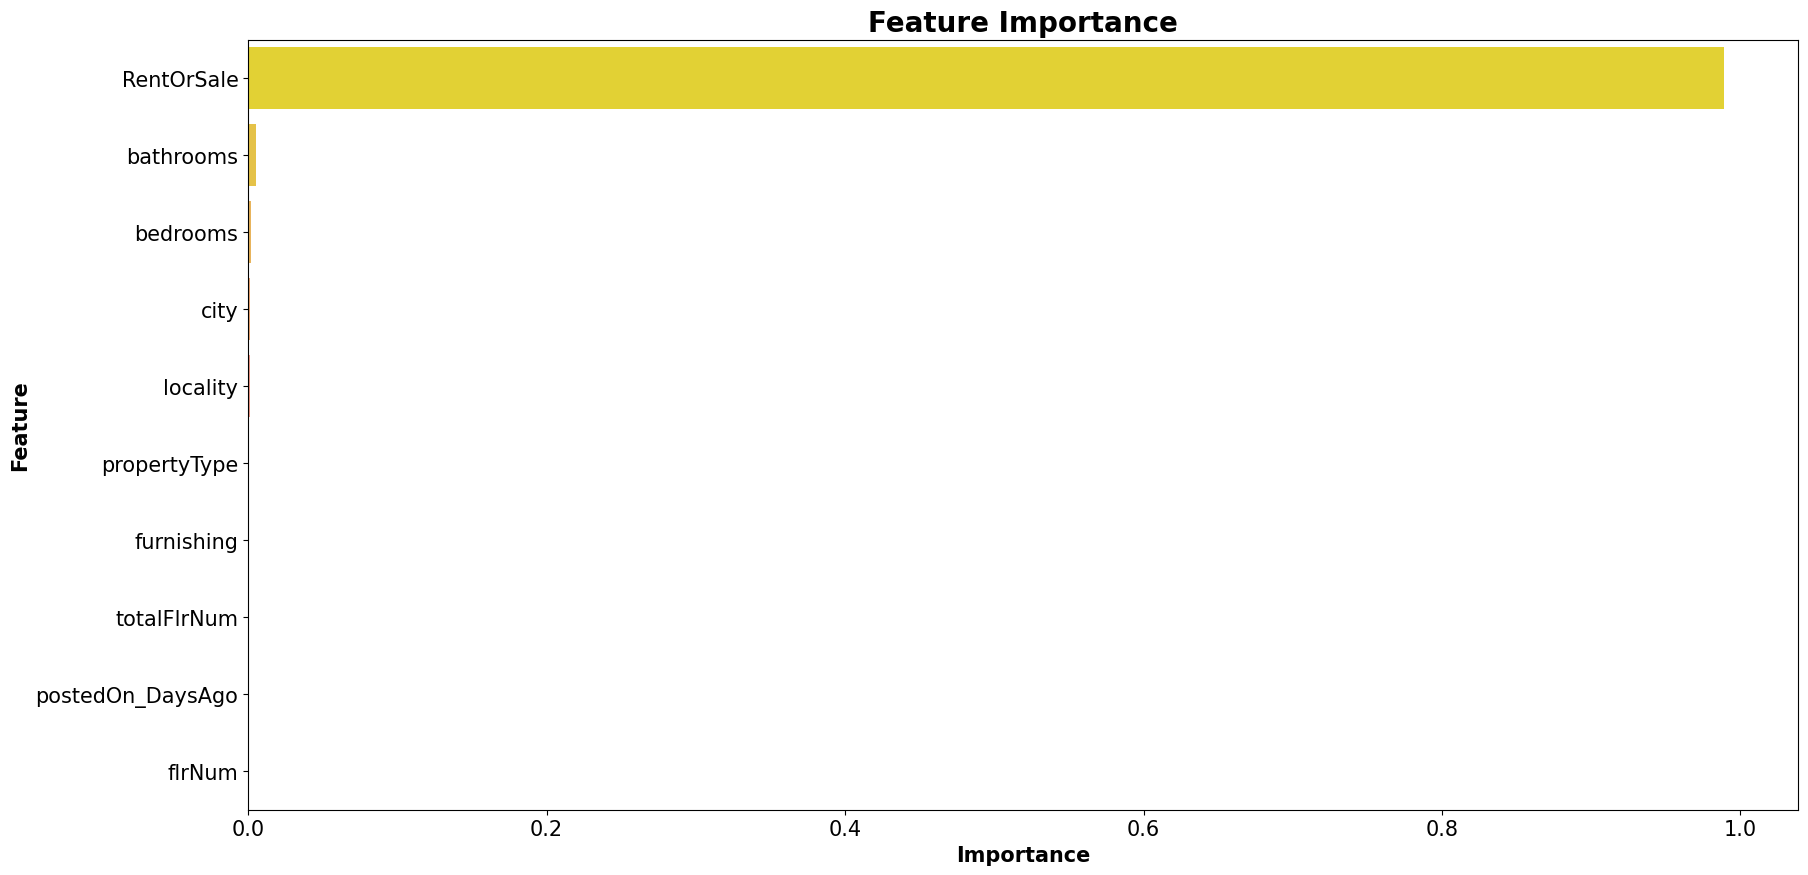

In [89]:
from sklearn.metrics import mean_absolute_error,r2_score,classification_report


fi = pd.DataFrame(xgb.feature_importances_,
             columns=['importance'])
fi['feature'] = scaling_feature
fi = fi.sort_values('importance', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=fi, x='importance', y='feature',
                 palette="spring_r")
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xlabel('Importance',fontsize=15, weight="bold")
ax.set_ylabel('Feature',fontsize=15,weight="bold")
plt.title("Feature Importance", size=20, weight="bold")

#### Now that our model is finally ready, we can also predict the pices of the houses which had null vales in the exactPrice column and splitted it

# Recommendation for other Housing Options

### Here I made a simple recommendation system function to recommend other housing options according to the users preferences

In [127]:
combined_fea = ""

combined_fea = dataset["propertyType"] + "   " + dataset["locality"] + "   " + dataset["furnishing"] + "   " + dataset["flrNum"].astype("str") + "   " + dataset["totalFlrNum"].astype("str") + "   " + dataset["city"] + "   " + dataset["bedrooms"].astype("str") + "   " + dataset["bathrooms"].astype("str") + "   " + dataset["RentOrSale"] + "   " + dataset["Long"].astype("str") + "   " + dataset["Lat"].astype("str") + "   " + dataset["postedOn_DaysAgo"].astype("str")


combined_fea

0        Multistorey Apartment   Danapur   Semi-Furnish...
1        Multistorey Apartment   Missing   Semi-Furnish...
2        Residential House   Phase 1 Ashiana Nagar   Se...
3        Residential House   Kumhrar   Furnished   Miss...
4        Multistorey Apartment   Kumhrar   Unfurnished ...
                               ...                        
27895    Multistorey Apartment   Dalanwala   Semi-Furni...
27896    Multistorey Apartment   Canal Road   Semi-Furn...
27897    Villa   Aman Vihar   Unfurnished   Missing   2...
27898    Multistorey Apartment   Sahastradhara Road   U...
27899    Multistorey Apartment   General Mahadev Singh ...
Length: 26692, dtype: object

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, sigmoid_kernel

In [129]:
vectorizer = TfidfVectorizer()

In [130]:
feature_vectors = vectorizer.fit_transform(combined_fea)

In [131]:
print(feature_vectors.shape)

(26692, 17587)


In [1]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

NameError: name 'cosine_similarity' is not defined

In [96]:
similarity.shape

(26692, 26692)

In [97]:


# Function to get top N similar houses based on cosine similarity
def get_similar_houses(propType,loc,furn,fn,Fnum,city,bed,Bath,RorS,PostDays, n=5):
    # Get the index of the house in the dataset
    
    ## Here I have used the conpect of try and except in case we don't find the perfect match of the users preference in our existing dataset 
    
    try:
        house_index = dataset.index[(dataset["propertyType"] == propType) & (dataset["locality"] == loc) & (dataset["furnishing"] == furn) & (dataset["flrNum"].astype("str") == fn) & (dataset["totalFlrNum"].astype("str") == Fnum) & (dataset["city"] == city) & (dataset["bedrooms"].astype("str") == bed) & (dataset["bathrooms"].astype("str") == Bath) & (dataset["RentOrSale"] == RorS) & (dataset["postedOn_DaysAgo"].astype("str") == PostDays)].tolist()[0]

    except IndexError:
        try:
            house_index = dataset.index[ (dataset["locality"] == loc) & (dataset["furnishing"] == furn) & (dataset["flrNum"].astype("str") == fn) & (dataset["totalFlrNum"].astype("str") == Fnum) & (dataset["city"] == city) & (dataset["bedrooms"].astype("str") == bed) & (dataset["bathrooms"].astype("str") == Bath) & (dataset["RentOrSale"] == RorS)].tolist()[0]
        except IndexError:
            try:
                house_index = dataset.index[ (dataset["locality"] == loc) & (dataset["furnishing"] == furn) & (dataset["flrNum"].astype("str") == fn) & (dataset["totalFlrNum"].astype("str") == Fnum) & (dataset["city"] == city) & (dataset["bedrooms"].astype("str") == bed) & (dataset["bathrooms"].astype("str") == Bath) & (dataset["RentOrSale"] == RorS)].tolist()[0]
            except IndexError:
                try:
                    house_index = dataset.index[ (dataset["locality"] == loc) & (dataset["furnishing"] == furn)  & (dataset["city"] == city) & (dataset["bedrooms"].astype("str") == bed) & (dataset["bathrooms"].astype("str") == Bath) & (dataset["RentOrSale"] == RorS)].tolist()[0]
                except IndexError:
                    try:
                        house_index = dataset.index[ (dataset["locality"] == loc) & (dataset["furnishing"] == furn) & (dataset["city"] == city) & (dataset["RentOrSale"] == RorS)].tolist()[0]
                    except IndexError:
                        try:
                            house_index = dataset.index[ (dataset["locality"] == loc) & (dataset["furnishing"] == furn) & (dataset["city"] == city)].tolist()[0]
                        except IndexError:
                            try:
                                house_index = dataset.index[ (dataset["locality"] == loc) & (dataset["city"] == city)].tolist()[0]
                            except IndexError:
                                return "wrong Input"
        
    
    # Get the pairwise similarity scores of the house with other houses
    similarity_scores = list(enumerate(similarity[house_index]))
    
    # Sort the houses based on the similarity scores
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top N similar houses (excluding the input house itself)
    top_scores = sorted_scores[1:n+1]
    
    # Get the indices of the top similar houses
    similar_house_indices = [score[0] for score in top_scores]
    
    # Return the top similar houses
    return dataset.iloc[similar_house_indices]

# Example usage:



In [98]:
combined_fea[0]

'Multistorey Apartment   Danapur   Semi-Furnished   4   6.0   Patna   3.0   2.0   Rent   85.05633   25.605898   20'

### Here I am applying the function with the parameters already in the dataset , taking example from combined_fea[0]

In [99]:
get_similar_houses('Multistorey Apartment','Danapur','Semi-Furnished','4','6.0','Patna','3.0','2.0', 'Rent','20', n=5)


exactPrice sqftPrice securityDeposit           propertyType  \
12907  15000000.0    8854.0         Missing  Multistorey Apartment   
4375      21000.0      14.0         21000.0  Multistorey Apartment   
3657      18000.0      10.0         Missing  Multistorey Apartment   
955        8000.0       6.0         Missing  Multistorey Apartment   
12107   9993500.0    5500.0         Missing  Multistorey Apartment   

          postedOn noOfLifts maintenanceChargesFrequency maintenanceCharges  \
12907  Apr 20, '23       NaN                     Monthly            Missing   
4375   May 13, '23       NaN                     Monthly             2000.0   
3657   Jun 10, '23       NaN                         NaN            Missing   
955    Jun 19, '23       NaN                         NaN            Missing   
12107  Jul 01, '23         1                         NaN            Missing   

       locality      furnishing   flrNum firstMonthCharges facing totalFlrNum  \
12907   Danapur  Semi-Furnished        1           Missing   East         6.0   
4375    Danapur     Unfurnished        3           44000.0    NaN         7.0   
3657   Jalalpur       Furnished        5           Missing  North         6.0   
955     Danapur  Semi-Furnished        4           Missing    NaN         6.0   
12107   Danapur  Semi-Furnished  Missing           Missing    NaN         5.0   

        city  carpetArea brokerage bedrooms bathrooms  balconies  \
12907  Patna         NaN       NaN      3.0       2.0        3.0   
4375   Patna      1100.0       NaN      3.0       2.0        2.0   
3657   Patna         NaN       NaN      2.0       2.0        NaN   
955    Patna         NaN       NaN      2.0       2.0        NaN   
12107  Patna         NaN       NaN      4.0       3.0        NaN   

       Water_Storage  Waste_Disposal  Visitor_Parking  Vaastu_Compliant  \
12907            1.0             0.0              1.0               1.0   
4375             1.0             0.0              1.0               1.0   
3657             1.0             0.0              1.0               1.0   
955              0.0             0.0              0.0               1.0   
12107            0.0             1.0              1.0               0.0   

                                                    URLs  Swimming_Pool  \
12907  https://www.magicbricks.com/propertyDetails/3-...            1.0   
4375   https://www.magicbricks.com/propertyDetails/3-...            1.0   
3657   https://www.magicbricks.com/propertyDetails/2-...            1.0   
955    https://www.magicbricks.com/propertyDetails/2-...            0.0   
12107  https://www.magicbricks.com/propertyDetails/4-...            1.0   

       Skydeck  Service_Or_Goods_Lift  Security  \
12907      0.0                    0.0       1.0   
4375       0.0                    0.0       1.0   
3657       0.0                    0.0       1.0   
955        0.0                    0.0       1.0   
12107      0.0                    1.0       1.0   

       Retail_Boulevard___Retail_Shops__  Reserved_Parking  \
12907                                0.0               1.0   
4375                                 0.0               1.0   
3657                                 0.0               1.0   
955                                  0.0               1.0   
12107                                0.0               1.0   

       Rentable_Community_Space RentOrSale  Recreational_Pool  \
12907                       0.0       Sale                0.0   
4375                        0.0       Rent                0.0   
3657                        0.0       Rent                0.0   
955                         0.0       Rent                0.0   
12107                       0.0       Sale                0.0   

       Rain_Water_Harvesting  RO_Water_System  Private_Terrace_Or_Garden  \
12907                    1.0              0.0                        0.0   
4375                     1.0              0.0                        0.0   
3657          

### Here I am applying some features with may not be in the dataset, yet we are getting valid recommendation due to the application of try and except , but we have to keep "location" and "city" parameters as per the existing datset while using this function. I have made the function this way, since these two parameters are the most important while searching for housing properties 

In [100]:

get_similar_houses('Multistorey Apar' ,  'Danapur' ,  'Semi-Furnished' ,  ''  , '6'   ,'Patna' ,  '0'  , '0',   ' '   ,'', n=5)


exactPrice sqftPrice securityDeposit           propertyType  \
12907  15000000.0    8854.0         Missing  Multistorey Apartment   
4375      21000.0      14.0         21000.0  Multistorey Apartment   
3657      18000.0      10.0         Missing  Multistorey Apartment   
955        8000.0       6.0         Missing  Multistorey Apartment   
12107   9993500.0    5500.0         Missing  Multistorey Apartment   

          postedOn noOfLifts maintenanceChargesFrequency maintenanceCharges  \
12907  Apr 20, '23       NaN                     Monthly            Missing   
4375   May 13, '23       NaN                     Monthly             2000.0   
3657   Jun 10, '23       NaN                         NaN            Missing   
955    Jun 19, '23       NaN                         NaN            Missing   
12107  Jul 01, '23         1                         NaN            Missing   

       locality      furnishing   flrNum firstMonthCharges facing totalFlrNum  \
12907   Danapur  Semi-Furnished        1           Missing   East         6.0   
4375    Danapur     Unfurnished        3           44000.0    NaN         7.0   
3657   Jalalpur       Furnished        5           Missing  North         6.0   
955     Danapur  Semi-Furnished        4           Missing    NaN         6.0   
12107   Danapur  Semi-Furnished  Missing           Missing    NaN         5.0   

        city  carpetArea brokerage bedrooms bathrooms  balconies  \
12907  Patna         NaN       NaN      3.0       2.0        3.0   
4375   Patna      1100.0       NaN      3.0       2.0        2.0   
3657   Patna         NaN       NaN      2.0       2.0        NaN   
955    Patna         NaN       NaN      2.0       2.0        NaN   
12107  Patna         NaN       NaN      4.0       3.0        NaN   

       Water_Storage  Waste_Disposal  Visitor_Parking  Vaastu_Compliant  \
12907            1.0             0.0              1.0               1.0   
4375             1.0             0.0              1.0               1.0   
3657             1.0             0.0              1.0               1.0   
955              0.0             0.0              0.0               1.0   
12107            0.0             1.0              1.0               0.0   

                                                    URLs  Swimming_Pool  \
12907  https://www.magicbricks.com/propertyDetails/3-...            1.0   
4375   https://www.magicbricks.com/propertyDetails/3-...            1.0   
3657   https://www.magicbricks.com/propertyDetails/2-...            1.0   
955    https://www.magicbricks.com/propertyDetails/2-...            0.0   
12107  https://www.magicbricks.com/propertyDetails/4-...            1.0   

       Skydeck  Service_Or_Goods_Lift  Security  \
12907      0.0                    0.0       1.0   
4375       0.0                    0.0       1.0   
3657       0.0                    0.0       1.0   
955        0.0                    0.0       1.0   
12107      0.0                    1.0       1.0   

       Retail_Boulevard___Retail_Shops__  Reserved_Parking  \
12907                                0.0               1.0   
4375                                 0.0               1.0   
3657                                 0.0               1.0   
955                                  0.0               1.0   
12107                                0.0               1.0   

       Rentable_Community_Space RentOrSale  Recreational_Pool  \
12907                       0.0       Sale                0.0   
4375                        0.0       Rent                0.0   
3657                        0.0       Rent                0.0   
955                         0.0       Rent                0.0   
12107                       0.0       Sale                0.0   

       Rain_Water_Harvesting  RO_Water_System  Private_Terrace_Or_Garden  \
12907                    1.0              0.0                        0.0   
4375                     1.0              0.0                        0.0   
3657          

### References
- [Housing Prices: EDA and Prediction By RUCHI BHATIA](https://www.kaggle.com/code/ruchi798/housing-prices-eda-and-prediction)
- [Advance House Price Prediction- Exploratory Data Analysis By Krish Naik](https://youtu.be/ioN1jcWxbv8)
- [Content Based Recommendation System By Krish Naik](https://youtu.be/i4a0Of22QRg)